# Credit EDA Analysis.

##Problem Statement:

As per the given problem statement, consumer finance companies or banks often find it difficult to take business decisions whether to approve a loan application or reject it. if a genuin application is rejected then it'll be a loss of business and if any defaulter's application is approved then again it's a loss of business.

So This EDA execise aims to ***analyse the available data and recommend the deciding factors/Variables responsible for an applicant becoming defaulter***.

**First of all let us import some basic required libraries.**

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

*** Now we will Import our datasets and take an overview of it, like
- how data looks like ?
- what type of columns and values it has ?
- what is the shape of available data ?
- How many columns have how many missing/Null/wrong Values etc ?
- The Datatypes of each column.
- How much data is mumerical and how much is categorical data ?
etc.

In [2]:
# Import Data files and reading them with the help of pandas library. Data is being read from my Google Drive.

app=pd.read_csv('/content/drive/MyDrive/Upgrad_Assignment/Credit_EDA_Assignment/Copy of application_data.csv')



In [3]:
col=pd.read_csv('/content/drive/MyDrive/Upgrad_Assignment/Credit_EDA_Assignment/Copy_of_columns_description.csv')


In [4]:
# HAving a check on data and it's shape.

app.head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   
6      100009       0         Cash loans           F            Y   
7      100010       0         Cash loans           M            Y   
8      100011       0         Cash loans           F            N   
9      100012       0    Revolving loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   
6               Y             1          171000.0   1560726.0      41301.0   
7               Y             0          360000.0   1530000.0      42075.0   
8               Y             0          112500.0   1019610.0      33826.5   
9               Y             0          135000.0    405000.0      20250.0   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   
5  ...                 0                0                0                0   
6  ...                 0                0                0                0   
7  ...                 0                0                0                0   
8  ...                 0                0                0                0   
9  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   
5                        0.0                       0.0   
6                        0.0                       0.0   
7                        0.0                       0.0   
8                        0.0                       0.0   
9                        NaN                       NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   
5                         0.0                        0.0   
6                         0.0                        1.0   
7                         0.0                        0.0   
8                         0.0                        0.0   
9                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0         

In [5]:
# checking shape of app.
app.shape

(307511, 122)

In [6]:
# checking column description from col
col

Unnamed: 0                     Table                        Row  \
0             1          application_data                 SK_ID_CURR   
1             2          application_data                     TARGET   
2             5          application_data         NAME_CONTRACT_TYPE   
3             6          application_data                CODE_GENDER   
4             7          application_data               FLAG_OWN_CAR   
..          ...                       ...                        ...   
155         209  previous_application.csv             DAYS_FIRST_DUE   
156         210  previous_application.csv  DAYS_LAST_DUE_1ST_VERSION   
157         211  previous_application.csv              DAYS_LAST_DUE   
158         212  previous_application.csv           DAYS_TERMINATION   
159         213  previous_application.csv  NFLAG_INSURED_ON_APPROVAL   

                                           Description  \
0                             ID of loan in our sample   
1    Target variable (1 - client with payment diffi...   
2          Identification if loan is cash or revolving   
3                                 Gender of the client   
4                        Flag if the client owns a car   
..                                                 ...   
155  Relative to application date of current applic...   
156  Relative to application date of current applic...   
157  Relative to application date of current applic...   
158  Relative to application date of current applic...   
159  Did the client requested insurance during the ...   

                                   Special  
0                                      NaN  
1                                      NaN  
2                                      NaN  
3                                      NaN  
4                                      NaN  
..                                     ...  
155  time only relative to the application  
156  time only relative to the application  
157  time only relative to the application  
158  time only relative to the application  
159                                    NaN  

[160 rows x 5 columns]

In [7]:
app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

###Now we will Analyze Dataset app and prev_app one by one.

####Analyzing app(application) dataset.

In [8]:
pd.set_option('display.max_columns',200)
app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [9]:
# checking for info.
app.info(verbose=True)

# as info() function without any argument was not capable to show the required information,
# therefore 'verbose=True' is used here. Ref. stackoverflow.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [10]:
# checking Statistical Data about app

app.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [11]:
# as our Target is to find the applicants with loan difficulties, therefor i selected
# all the defaulters from app data and checked the statistical metrics about them.
app[app.TARGET==1].describe()

SK_ID_CURR   TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count   24825.000000  24825.0  24825.000000      2.482500e+04  2.482500e+04   
mean   277449.167936      1.0      0.463807      1.656118e+05  5.577785e+05   
std    102383.123458      0.0      0.756903      7.466770e+05  3.464332e+05   
min    100002.000000      1.0      0.000000      2.565000e+04  4.500000e+04   
25%    189555.000000      1.0      0.000000      1.125000e+05  2.844000e+05   
50%    276291.000000      1.0      0.000000      1.350000e+05  4.975200e+05   
75%    366050.000000      1.0      1.000000      2.025000e+05  7.333155e+05   
max    456254.000000      1.0     11.000000      1.170000e+08  4.027680e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count   24825.000000     2.480400e+04                24825.000000   
mean    26481.744290     4.889724e+05                    0.019131   
std     12450.676999     3.116365e+05                    0.011905   
min      2722.500000     4.500000e+04                    0.000533   
25%     17361.000000     2.385000e+05                    0.009630   
50%     25263.000000     4.500000e+05                    0.018634   
75%     32976.000000     6.750000e+05                    0.025164   
max    149211.000000     3.600000e+06                    0.072508   

         DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
count  24825.000000   24825.000000       24825.000000     24825.000000   
mean  -14884.828077   42394.675448       -4487.127009     -2732.099617   
std     4192.844583  119484.634253        3299.650241      1516.975313   
min   -25168.000000  -16069.000000      -22928.000000     -6207.000000   
25%   -18037.000000   -2156.000000       -6646.000000     -4119.000000   
50%   -14282.000000   -1034.000000       -4056.000000     -2797.000000   
75%   -11396.000000    -379.000000       -1671.000000     -1392.000000   
max    -7678.000000  365243.000000           0.000000         0.000000   

       OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
count  7576.000000     24825.0    24825.000000     24825.000000   
mean     13.668691         1.0        0.879517         0.237825   
std      12.499074         0.0        0.325532         0.425760   
min       0.000000         1.0        0.000000         0.000000   
25%       6.000000         1.0        1.000000         0.000000   
50%      11.000000         1.0        1.000000         0.000000   
75%      17.000000         1.0        1.000000         0.000000   
max      91.000000         1.0        1.000000         1.000000   

       FLAG_CONT_MOBILE    FLAG_PHONE    FLAG_EMAIL  CNT_FAM_MEMBERS  \
count      24825.000000  24825.000000  24825.000000     24825.000000   
mean           0.998187      0.244955      0.055347         2.181269   
std            0.042538      0.430069      0.228662         0.951327   
min            0.000000      0.000000      0.000000         1.000000   
25%            1.000000      0.000000      0.000000         2.000000   
50%            1.000000      0.000000      0.000000         2.000000   
75%            1.000000      0.000000      0.000000         3.000000   
max            1.000000      1.000000      1.000000        13.000000   

       REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count          24825.000000                 24825.000000   
mean               2.153635                     2.134824   
std                0.505052                     0.499909   
min                1.000000                     1.000000   
25%                2.000000                     2.000000   
50%                2.000000                     2.000000   
75%                2.000000                     2.000000   
max                3.000000                     3.000000   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
count             24825.000000                24825.000000   
mean                 11.797100                    0.017442   
std                   3.28429

In [12]:
# Statistical description of applicants who are not defaulters
app[app.TARGET==0].describe()

SK_ID_CURR    TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count  282686.000000  282686.0  282686.000000      2.826860e+05  2.826860e+05   
mean   278244.744536       0.0       0.412946      1.690777e+05  6.026483e+05   
std    102825.776954       0.0       0.718843      1.104763e+05  4.068459e+05   
min    100003.000000       0.0       0.000000      2.565000e+04  4.500000e+04   
25%    189103.250000       0.0       0.000000      1.125000e+05  2.700000e+05   
50%    278362.500000       0.0       0.000000      1.485000e+05  5.177880e+05   
75%    367241.500000       0.0       1.000000      2.025000e+05  8.100000e+05   
max    456255.000000       0.0      19.000000      1.800009e+07  4.050000e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count  282674.000000     2.824290e+05               282686.000000   
mean    27163.623349     5.427368e+05                    0.021021   
std     14658.307178     3.737855e+05                    0.013978   
min      1615.500000     4.050000e+04                    0.000290   
25%     16456.500000     2.385000e+05                    0.010006   
50%     24876.000000     4.500000e+05                    0.018850   
75%     34749.000000     6.885000e+05                    0.028663   
max    258025.500000     4.050000e+06                    0.072508   

          DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
count  282686.000000  282686.000000      282686.000000    282686.000000   
mean   -16138.176397   65696.146123       -5029.941065     -3017.219788   
std      4364.200856  142877.810161        3538.464478      1506.614090   
min    -25229.000000  -17912.000000      -24672.000000     -7197.000000   
25%    -19793.750000   -2813.000000       -7550.000000     -4313.000000   
50%    -15877.000000   -1235.000000       -4544.000000     -3295.000000   
75%    -12536.000000    -278.000000       -2045.000000     -1755.000000   
max     -7489.000000  365243.000000           0.000000         0.000000   

        OWN_CAR_AGE     FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
count  97006.000000  282686.000000   282686.000000    282686.000000   
mean      11.935540       0.999996        0.814653         0.195991   
std       11.891359       0.001881        0.388579         0.396963   
min        0.000000       0.000000        0.000000         0.000000   
25%        5.000000       1.000000        1.000000         0.000000   
50%        9.000000       1.000000        1.000000         0.000000   
75%       15.000000       1.000000        1.000000         0.000000   
max       91.000000       1.000000        1.000000         1.000000   

       FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  CNT_FAM_MEMBERS  \
count     282686.000000  282686.000000  282686.000000    282684.000000   
mean           0.998129       0.284238       0.056840         2.150154   
std            0.043219       0.451051       0.231538         0.906984   
min            0.000000       0.000000       0.000000         1.000000   
25%            1.000000       0.000000       0.000000         2.000000   
50%            1.000000       0.000000       0.000000         2.000000   
75%            1.000000       1.000000       0.000000         3.000000   
max            1.000000       1.000000       1.000000        20.000000   

       REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count         282686.000000                282686.000000   
mean               2.043578                     2.022449   
std                0.508422                     0.501971   
min                1.000000                     1.000000   
25%                2.000000                     2.000000   
50%                2.000000                     2.000000   
75%                2.000000                     2.000000   
max                3.000000                     3.000000   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
count            282686.000000               282686.000000   
mean      

<Axes: ylabel='TARGET'>

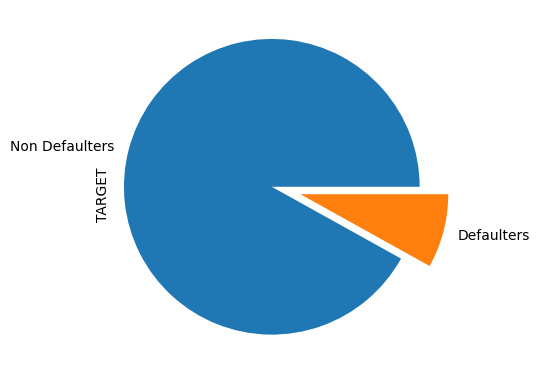

In [13]:
app.TARGET.value_counts().plot.pie(labels=['Non Defaulters','Defaulters'],explode=[0.2,0])

In [14]:
app.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [15]:
tar=app.TARGET.value_counts()
res=tar[1]/tar[0]
print('defaulter to nondefaulter percent',res*100)

#Checking for ratio of Defaulters and Non-Defaulters.

defaulter to nondefaulter percent 8.781828601345662


***** This shows here a Class Imbalance Problem

#### As we can see there is no significant difference between Statistical metrics of Defaulter and Non-Defaulters, so now we will check for other parameters.

### Data Cleaning Process

#### Missing Values Treatment

In [16]:
pd.set_option('display.max_rows',200) # to view all the columns
app.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [17]:
# As we can see there are so many missing values in app data,
# and mostly are regarding applicants residence type and it's attributes.

# let's check them in percentage , if they are more than 40% then , these columns need to be dropped.

(app.isnull().sum()/app.shape[0])*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

Text(0.5, 1.0, 'Quantifying missing data')

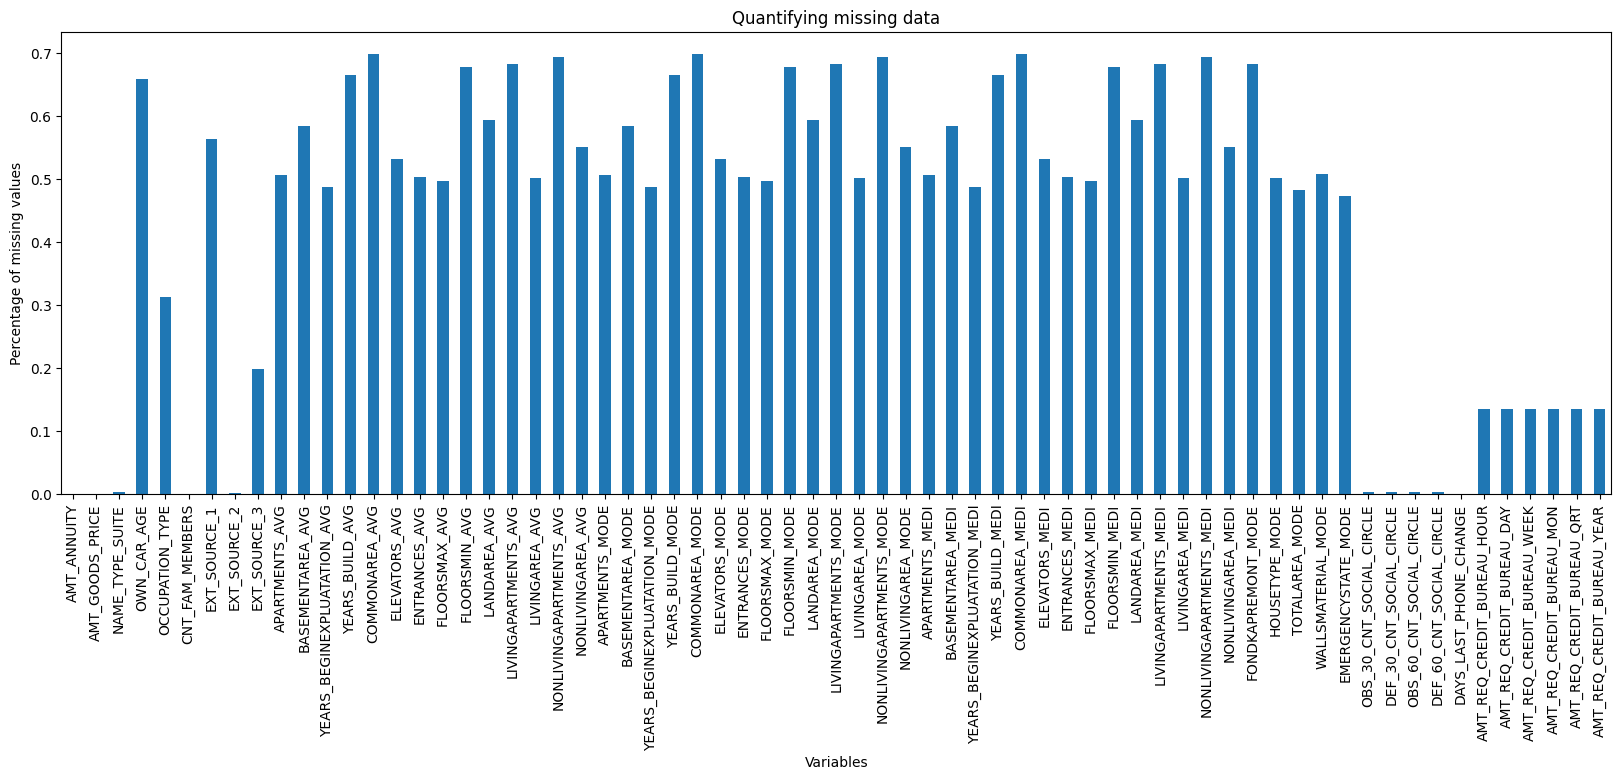

In [18]:
miss_bar=app.isnull().mean()[app.isnull().mean()!=0]
miss_bar.plot.bar(figsize=(20,6))
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')
plt.title('Quantifying missing data')

In [19]:
# Get the number of columns with missing values greater than zero

print(f"Number of columns with missing values greater than zero: {len((app.isnull().sum()[(app.isnull().sum()) > 0]))}")


Number of columns with missing values greater than zero: 67


In [20]:
# Get the number of columns with missing values greater than 10%

print(f"Number of columns with missing values greater than 10 % : {len((app.isnull().sum()[(app.isnull().sum()) > 10]))}")

Number of columns with missing values greater than 10 % : 65


Text(0.5, 1.0, 'Missing Value Examination in Application Data')

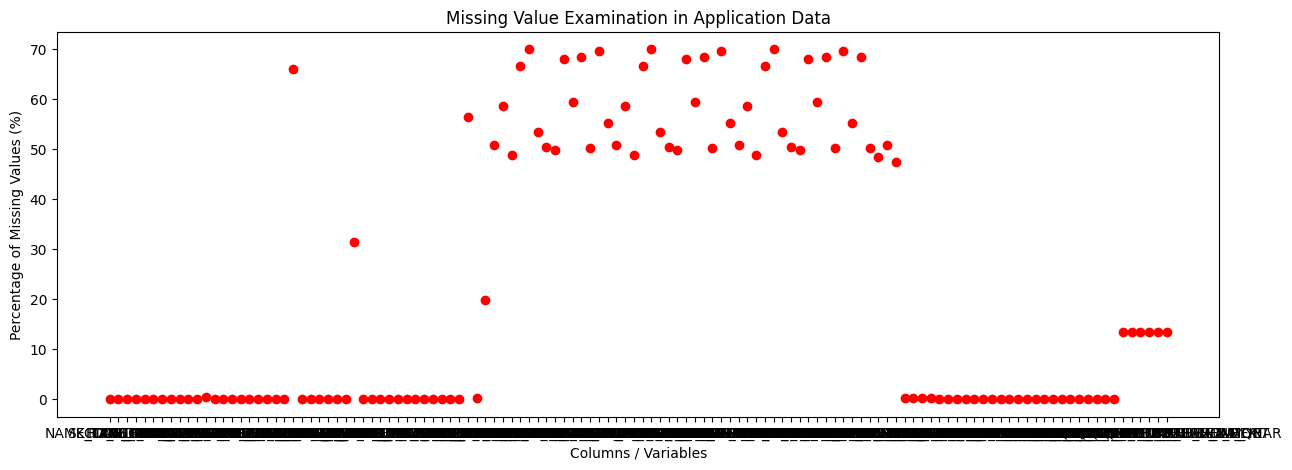

In [21]:
# sns
plt.figure(figsize=(15,5))
# plt.axes().set_facecolor('#2A3990')
plt.scatter(x=app.columns, y=((app.isnull().sum()/app.shape[0])*100).values ,color='red')
plt.ylabel('Percentage of Missing Values (%)')
plt.xlabel('Columns / Variables')
plt.title('Missing Value Examination in Application Data')

So there are a lot of columns having missing values more than 40% , and as it was observed earlier almost all values are related to applicant's residence type and it' attributes.

 But not 'Flag_own_car' has no null values where as 'own_car_age' is having more than 65% missing values, so may be a possibility that these missing values in due to 'Not owning a car' lets check, This anlysis can give us an insight about how many of our applicants own a car.

In [22]:
# Let's check if our assumption is True that 'own_car_age is having for those applicants who don't own car'

app[app.FLAG_OWN_CAR=='N'][['FLAG_OWN_CAR','OWN_CAR_AGE']]

FLAG_OWN_CAR  OWN_CAR_AGE
0                 N          NaN
1                 N          NaN
3                 N          NaN
4                 N          NaN
5                 N          NaN
...             ...          ...
307506            N          NaN
307507            N          NaN
307508            N          NaN
307509            N          NaN
307510            N          NaN

[202924 rows x 2 columns]

It is observed here that app.OWN_CAR_AGE=='Nan' is approximately equal to app.FLAG_OWN_CAR=='N', hence it can be concluded that ***More than 65% of applicants do not own a car***

<Axes: >

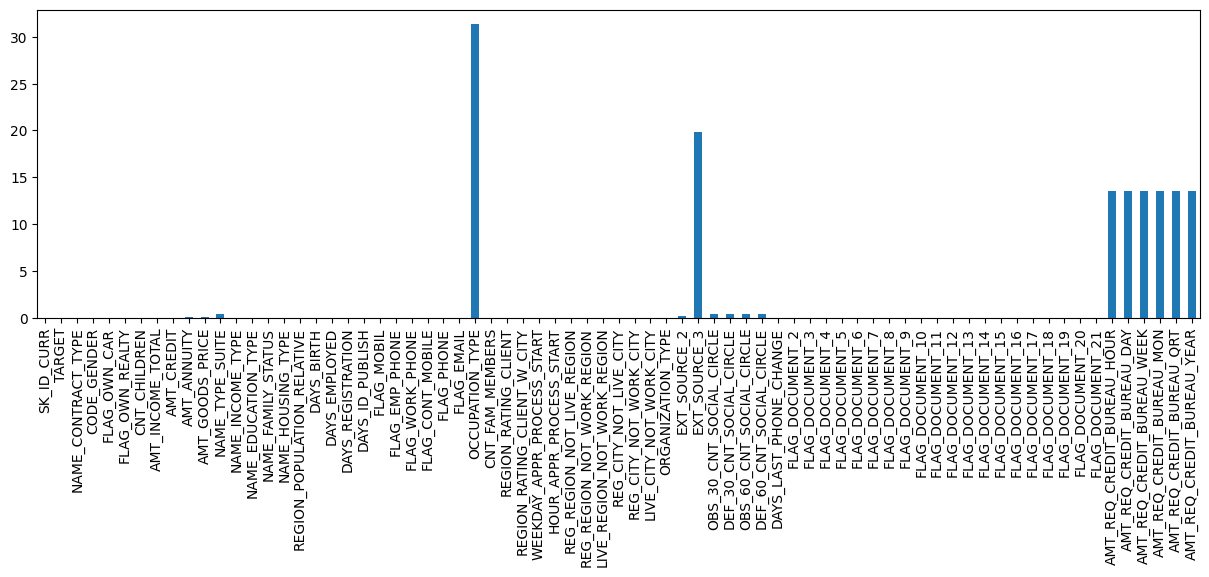

In [23]:
# droping the columns having missing value > 40%.
new_app=app.drop(app.columns[app.isnull().mean()>0.4],axis=1)
plt.figure(figsize=(15,4))
((new_app.isnull().sum()/new_app.shape[0])*100).plot.bar()

Text(0.5, 1.0, 'Quantifying missing data')

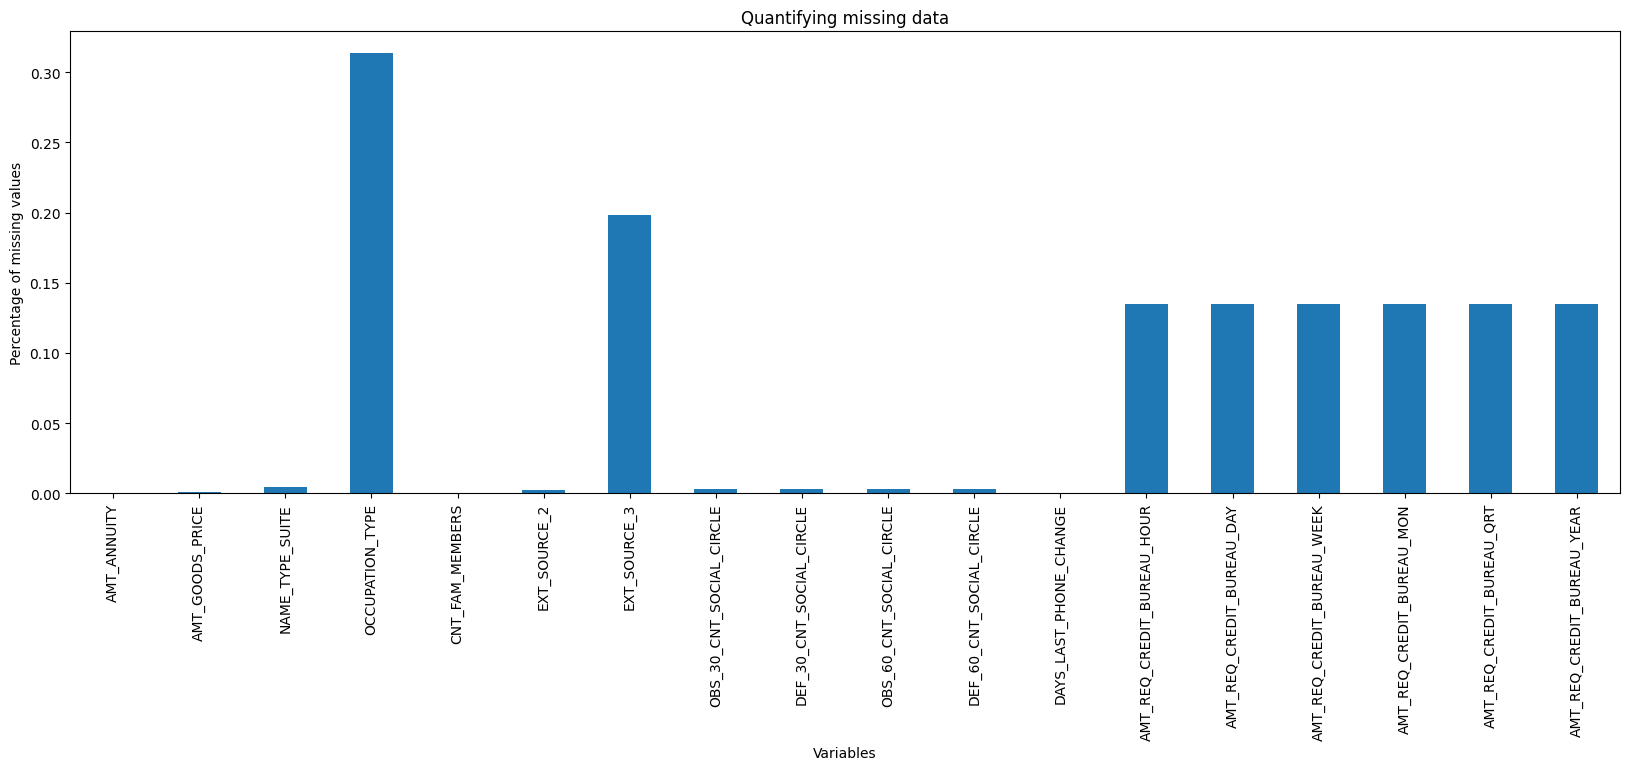

In [24]:
miss_bar1=new_app.isnull().mean()[new_app.isnull().mean()!=0]
miss_bar1.plot.bar(figsize=(20,6))
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')
plt.title('Quantifying missing data')

In [25]:
new_app.shape

(307511, 73)

In [26]:
(new_app.isnull().sum()/new_app.shape[0])*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

#### From here we will check each column one by one: 'AMT_ANNUITY','AMT_GOODS_PRICE','NAME_TYPE_SUITE','DAY_LAST_PHONE_CHANGE','EXT_SOURCE_2','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE'   as the  percentage of missing values is much less .

In [27]:
# checking for 'AMT_ANNUITY'
#AMT_ANNUITY: An annuity loan is a loan with constant repayment installments. In other words, a constant fixed amount is repaid to the lender.
#             This installment is composed of two parts: the interest and the repayment amount. With each installment payment, the residual
#             debt decreases, thus the interest portion.
# Hense by definition AMT_ANNUITY must be dependent on AMT_CREDIT and Intrest rate, as we are not given the intrest rate, we try to fill
# these Nans with ratio of mean of all AMT_ANNUITY and AMT_CREDIT

new_app[app.AMT_ANNUITY.isnull()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
47531       155054       0         Cash loans           M            N   
50035       157917       0         Cash loans           F            N   
51594       159744       0         Cash loans           F            N   
55025       163757       0         Cash loans           F            N   
59934       169487       0         Cash loans           M            Y   
75873       187985       0         Cash loans           M            Y   
89343       203726       0         Cash loans           F            Y   
123872      243648       0         Cash loans           F            N   
207186      340147       0         Cash loans           M            N   
227939      364022       0         Cash loans           F            N   
239329      377174       0         Cash loans           F            N   
241835      379997       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
47531                N             0          180000.0    450000.0   
50035                N             0           94500.0    450000.0   
51594                N             0          202500.0    539100.0   
55025                N             0          162000.0    296280.0   
59934                N             0          202500.0    360000.0   
75873                N             0          144000.0    219249.0   
89343                N             0           90000.0    157500.0   
123872               Y             0          202500.0    929088.0   
207186               N             0          171000.0    486000.0   
227939               Y             0          315000.0    628069.5   
239329               Y             0          157500.0    792000.0   
241835               N             0          315000.0   1483231.5   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
47531           NaN         450000.0   Unaccompanied  Commercial associate   
50035           NaN         450000.0   Unaccompanied               Working   
51594           NaN         450000.0   Unaccompanied               Working   
55025           NaN         225000.0   Unaccompanied         State servant   
59934           NaN         360000.0   Unaccompanied               Working   
75873           NaN         166500.0   Unaccompanied               Working   
89343           NaN         157500.0   Unaccompanied         State servant   
123872          NaN         720000.0   Unaccompanied               Working   
207186          NaN         486000.0   Unaccompanied  Commercial associate   
227939          NaN         499500.0   Unaccompanied  Commercial associate   
239329          NaN         792000.0          Family         State servant   
241835          NaN        1354500.0   Unaccompanied               Working   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
47531               Incomplete higher  Single / not married   
50035                 Lower secondary        Civil marriage   
51594   Secondary / secondary special               Married   
55025                Higher education               Married   
59934   Secondary / secondary special  Single / not married   
75873                Higher education  Single / not married   
89343   Secondary / secondary special               Married   
123872  Secondary / secondary special        Civil marriage   
207186               Higher education               Married   
227939               Higher education               Married   
239329  Secondary / secondary special               Married   
241835               Higher education               Married   

          NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
47531     House / apartment                    0.026392      -10668   
50035     House / apartment                    0.035792       -9027   
51594     House / apartment                    0.046220      -17376   
55025     House

<Axes: >

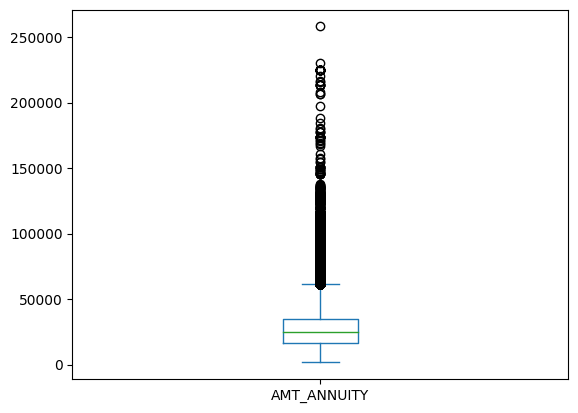

In [28]:
new_app.AMT_ANNUITY.plot.box()

In [29]:
new_app['AMT_ANNUITY'].quantile([0.25,0.5,0.75,0.9,0.99,1.0])

0.25     16524.0
0.50     24903.0
0.75     34596.0
0.90     45954.0
0.99     70006.5
1.00    258025.5
Name: AMT_ANNUITY, dtype: float64

In [30]:
new_app['AMT_ANNUITY'].mean()

27108.573909183444

In [31]:
new_app['AMT_ANNUITY'].median()

24903.0

In [32]:
new_app['AMT_CREDIT'].mean()

599025.9997057016

In [33]:
new_app['AMT_CREDIT'].median()

513531.0

In [34]:
installment=(new_app['AMT_ANNUITY']/new_app['AMT_CREDIT'])*100
installment.mean()

5.369499993498691

AS it can be seen above that the column has outliers. though they seem to be outliers but actualy they are not,
they may be data points of some rich customers which is approximately above 49000.
So taking mean() and imputing here may not work out here. therefore we go with the median() of AMT_ANNUITY
i am leaving them for now and impute later. since they are very less number of rows, so we can consider deleting them if required.



#### Checking fo 'AMT_GOODS_PRICE'

<Axes: >

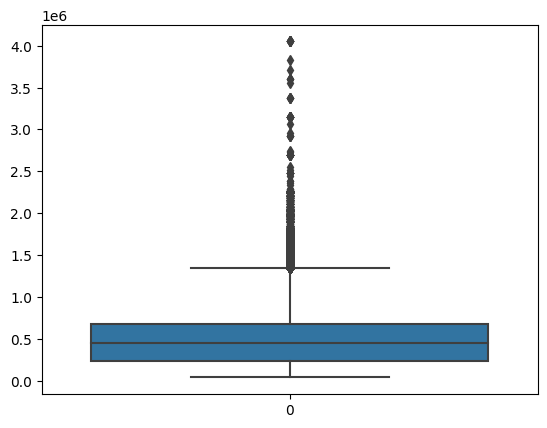

In [35]:
# Checking fo 'AMT_GOODS_PRICE'

sns.boxplot(new_app['AMT_GOODS_PRICE'])

A very similar type of boxplot as it was for "AMT_ANNUITY'

In [36]:
new_app['AMT_GOODS_PRICE'].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [37]:
new_app[new_app.AMT_GOODS_PRICE.isnull()]


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
724         100837       0    Revolving loans           F            N   
5937        106955       0    Revolving loans           F            N   
6425        107494       0    Revolving loans           F            N   
6703        107822       0    Revolving loans           F            N   
7647        108913       0    Revolving loans           M            N   
...            ...     ...                ...         ...          ...   
304678      452992       0    Revolving loans           F            N   
304784      453120       0    Revolving loans           M            N   
305833      454341       0    Revolving loans           F            N   
306126      454683       0    Revolving loans           M            N   
306273      454852       0    Revolving loans           M            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
724                  Y             2           45000.0    135000.0   
5937                 N             0          157500.0    450000.0   
6425                 N             0           67500.0    202500.0   
6703                 N             1          121500.0    180000.0   
7647                 Y             0          180000.0    450000.0   
...                ...           ...               ...         ...   
304678               Y             2           67500.0    202500.0   
304784               Y             1          112500.0    270000.0   
305833               Y             0          126000.0    270000.0   
306126               Y             0          135000.0    270000.0   
306273               Y             2           67500.0    202500.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
724          6750.0              NaN             NaN  Commercial associate   
5937        22500.0              NaN             NaN               Working   
6425        10125.0              NaN             NaN               Working   
6703         9000.0              NaN             NaN               Working   
7647        22500.0              NaN             NaN               Working   
...             ...              ...             ...                   ...   
304678      10125.0              NaN             NaN               Working   
304784      13500.0              NaN             NaN               Working   
305833      13500.0              NaN             NaN               Working   
306126      13500.0              NaN             NaN  Commercial associate   
306273      10125.0              NaN             NaN               Working   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
724     Secondary / secondary special               Married   
5937    Secondary / secondary special               Married   
6425                 Higher education               Married   
6703    Secondary / secondary special        Civil marriage   
7647                 Higher education  Single / not married   
...                               ...                   ...   
304678               Higher education               Married   
304784  Secondary / secondary special               Married   
305833              Incomplete higher  Single / not married   
306126  Secondary / secondary special               Married   
306273               Higher education               Married   

          NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
724       House / apartment                    0.024610      -10072   
5937      House / apartment                    0.010006      -11993   
6425      House / apartment                    0.008474       -9727   
6703      House / apartment                    0.011657      -11079   
7647      House / apartment                    0.032561       -9986   
...                     ...                         ...         ...   
304678    House / apartment                    0.025164      -11313   
304784    House 

As it can be seen above that AMT_GOODS_PRICE == 'NaN' for 'NAME_CONTRACT_TYPE'=="Revolving Loans'

Revolving_loans: Revolving credit allows you to borrow money up to a set credit limit, repay it and borrow again as needed. By contrast, installment credit lets you borrow one lump sum, which you pay back in scheduled payments until the loan is paid in full. Ex. Credit cards, home equity, etc.

This implies that in revolving loans no new product is sold/bought. There is a credit line established between financial institution and client, in which client take loan for some time, repay it and again he is eligible to borrow.

Therefore we can easily put AMT_GOODS_PRICE = 0 for here.

In [38]:
#  new_app['AMT_GOODS_PRICE'].fillna(value=0, inplace=True)

# Not imputing values now, reason same as above for 'AMT_ANNUITY'

####checking  for 'NAME_TYPE_SUITE' column

In [39]:
#checking  for 'NAME_TYPE_SUITE' column

new_app['NAME_TYPE_SUITE'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 307511 entries, 0 to 307510
Series name: NAME_TYPE_SUITE
Non-Null Count   Dtype 
--------------   ----- 
306219 non-null  object
dtypes: object(1)
memory usage: 2.3+ MB


In [40]:
new_app['NAME_TYPE_SUITE'].isnull().sum()

1292

In [41]:
new_app['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [42]:
new_app['NAME_TYPE_SUITE'].shape

(307511,)

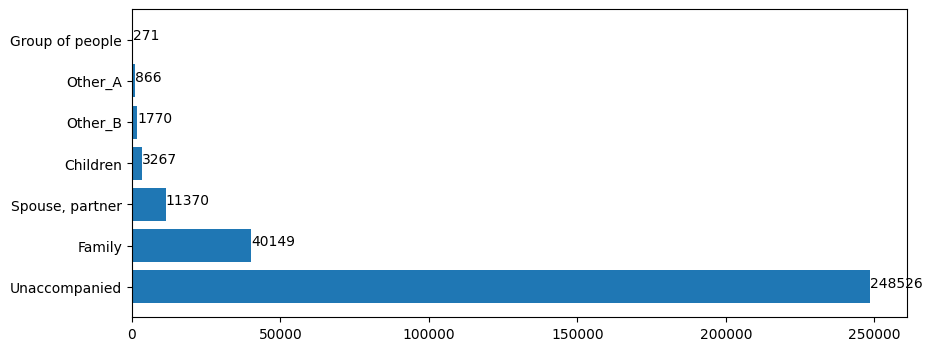

In [43]:
a=new_app['NAME_TYPE_SUITE'].value_counts()
akeys=list(a.keys())
avals=list(a.values)
plt.figure(figsize=(10,4))
plt.barh(akeys,avals)
for i ,v in enumerate(avals):
  plt.text(v,i,str(v))
plt.show()

As it can be seen in above graph that majority of the applicants was not accompanied by any client when applying for loan.

Since it is a categorical variable therefore we cannot use mean() or median() here, instead we will use mode() here.

To impute values we can use:

- app['NAME_TYPE_SUITE'].fillna(value=(app['NAME_TYPE_SUITE'].mode()[0]), inplace=True)

*** we used index[0] because ,otherwise it will not write value.

- app['NAME_TYPE_SUITE'].value_counts()

#### Checking For 'OCCUPATION_TYPE'

<Axes: >

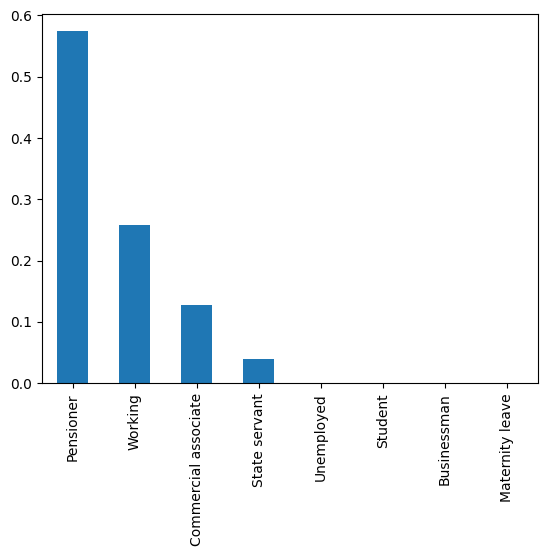

In [44]:
# # Checking For 'OCCUPATION_TYPE'

new_app[new_app.OCCUPATION_TYPE.isnull()]['NAME_INCOME_TYPE'].value_counts(normalize=True).plot.bar()

As a person's income is directly related it's occupation type, so i am looking for values in "NAME_INCOME_TYPE" where 'OCCUPATION_TYPE' == NaN .

In [45]:
new_app[new_app.OCCUPATION_TYPE.isnull()].shape

(96391, 73)

In [46]:
new_app[new_app.OCCUPATION_TYPE.isnull()]['NAME_INCOME_TYPE'].value_counts()


Pensioner               55357
Working                 24920
Commercial associate    12297
State servant            3787
Unemployed                 22
Student                     5
Businessman                 2
Maternity leave             1
Name: NAME_INCOME_TYPE, dtype: int64

AS it can be understood from above values that , only 22 applicants are actually unemployed, but null is 96391. where highest share is of pensioners.

let's check 'OCCUPATION_TYPE' where 'INCOME_TYPE' is 'Pensioner'

In [47]:
new_app[new_app['NAME_INCOME_TYPE']=='Pensioner']['OCCUPATION_TYPE'].value_counts()

Cleaning staff    2
Laborers          1
Medicine staff    1
Sales staff       1
Name: OCCUPATION_TYPE, dtype: int64

In [48]:
# checking the unique values in 'OCCUPATION_TYPE' along NaNs.

new_app['OCCUPATION_TYPE'].value_counts(dropna=False)

NaN                      96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

So as we can see out of 55357 Pensioners only Five of them mentioned about their 'OCCUPATION_TYPE' , wheras on the other hand we have seen that "NAME_INCOME_TYPE" column do not have any NUll Values, Therefor from here it can be concluded that ''May be this column is not mendatory to apply for loan'', instead 'NAME_INCOME_TYPE' is.

SO I can Drop this column. BUt not dropping for now. leaving it as it is.

#### Checking for 'EXT_SOURCE_2' and 'EXT_SOURCE_3'
- Normalized score from external data source

we have already droped EXT_SOURCE_1 as it was having NaNs more than 40%(threshold).

In [49]:
# For EXT_SOURCE_2

new_app['EXT_SOURCE_2'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 307511 entries, 0 to 307510
Series name: EXT_SOURCE_2
Non-Null Count   Dtype  
--------------   -----  
306851 non-null  float64
dtypes: float64(1)
memory usage: 2.3 MB


In [50]:
new_app['EXT_SOURCE_2'].isnull().sum()

660

In [51]:
new_app['EXT_SOURCE_2'].describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

In [52]:
np.round(new_app['EXT_SOURCE_2'].describe(),4)

count    306851.0000
mean          0.5144
std           0.1911
min           0.0000
25%           0.3925
50%           0.5660
75%           0.6636
max           0.8550
Name: EXT_SOURCE_2, dtype: float64

In [53]:
# For EXT_SOURCE_3

new_app['EXT_SOURCE_3'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 307511 entries, 0 to 307510
Series name: EXT_SOURCE_3
Non-Null Count   Dtype  
--------------   -----  
246546 non-null  float64
dtypes: float64(1)
memory usage: 2.3 MB


In [54]:
new_app['EXT_SOURCE_3'].isnull().sum()

60965

In [55]:
np.round(new_app['EXT_SOURCE_3'].describe(),4)

count    246546.0000
mean          0.5109
std           0.1948
min           0.0005
25%           0.3706
50%           0.5353
75%           0.6691
max           0.8960
Name: EXT_SOURCE_3, dtype: float64

As per anlysis , it can be easily seen above that , there is no significant difference between statistical Metrics of EXT_SOURCE_2 and EXT_SOURCE_3 , So there is no harm if we consider them replicates of each other, Since these are Normalized scores from various external sources as described in meta_data , there may be high chances that those external sources may have utilised the same parameters to obtain these scores.

So we will keep only EXT_SOURCE_2 and discard EXT_SOURCE_3 as it have a high amount of missing values.

we will apply:
- new_app.drop(columns=['EXT_SOURCE_3'], inplace = True)

In [56]:
new_app.drop(columns=['EXT_SOURCE_3'],inplace=True)

In [57]:
new_app.shape

(307511, 72)

#### Checking for 'AMT_REQ_CREDIT_BUREAU_HOUR' to "AMT_REQ_CREDIT_BUREAU_YEAR"

In [58]:
new_app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE

- AMT_REQ_CREDIT_BUREAU_HOUR	Number of enquiries to Credit Bureau about the client one hour before application
- AMT_REQ_CREDIT_BUREAU_DAY	Number of enquiries to Credit Bureau about the client one day before application (excluding one hour before application)
- AMT_REQ_CREDIT_BUREAU_WEEK	Number of enquiries to Credit Bureau about the client one week before application (excluding one day before application)
- AMT_REQ_CREDIT_BUREAU_MON	Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application)
- AMT_REQ_CREDIT_BUREAU_QRT	Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before application)
- AMT_REQ_CREDIT_BUREAU_YEAR	Number of enquiries to Credit Bureau about the client one day year (excluding last 3 months before application)

In [59]:
new_app

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           24700.5         351000.0   Unaccompanied               Working   
1           35698.5        1129500.0          Family         State servant   
2            6750.0         135000.0   Unaccompanied               Working   
3           29686.5         297000.0   Unaccompanied               Working   
4           21865.5         513000.0   Unaccompanied               Working   
...             ...              ...             ...                   ...   
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       House / apartment                    0.018801       -9461   
1       House / apartment                    0.003541      -16765   
2       House / apartment                    0.010032      -19046   
3       House / apartment                    0.008019      -19005   
4       House / apartment                    0.028663      -19932   
...                   ...                         ...         ...   
307506       With parents                    0.032561       -9327   
307507  House / apartment       

**Definition:** A credit inquiry is a request for credit report information from a credit bureau. Credit inquiries are typically made by financial institutions to help them determine whether to approve you for credit.

In [60]:
new_app['AMT_REQ_CREDIT_BUREAU_HOUR'].describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

<Axes: >

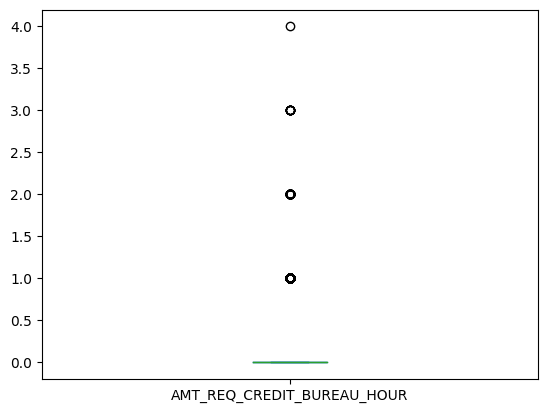

In [61]:
new_app['AMT_REQ_CREDIT_BUREAU_HOUR'].plot.box()

In [62]:
new_app.columns.get_loc('AMT_REQ_CREDIT_BUREAU_HOUR')

66

In [63]:
for i in new_app.columns:
  if i.startswith('AMT_REQ_CREDIT_BUREAU'):
    print(new_app[i].value_counts())
    print("________________________________")

0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64
________________________________
0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64
________________________________
0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64
________________________________
0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
23.0         1
27.0         1
22.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64
________________________________


In [64]:
for i in new_app.columns:
  if i.startswith('AMT_REQ_CREDIT_BUREAU'):
    print(new_app[i].describe())
    print("________________________________")

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64
________________________________
count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64
________________________________
count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64
________________________________
count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDI

In [65]:
for i in new_app.columns:

  if i.startswith("AMT_REQ"):

    print(new_app[i].mean())

0.006402448193930645
0.0070002105326475985
0.0343619356973142
0.26739526000781977
0.26547414959848414
1.899974435321363


In [66]:
for i in new_app.columns:

  if i.startswith("AMT_REQ"):

    print(new_app[i].mode())

0    0.0
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64
0    0.0
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64
0    0.0
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64
0    0.0
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64
0    0.0
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64
0    0.0
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64


SO by definition it is clearly understood that 'AMT_REQ_CREDIT_BUREAU_['HOUR','DAY','WEEK','MONTH','YEAR'] are the inquiries made by this finance institution about the credit score of the applicant to analyse the risk associated with lending money to him/her.

NaN here may signify that information was not available or the applicant has'nt availed any loan yet.

These NaNs can be replaced with mode() values (i.e 0) of respective columns not mean() values because means of these columns are approximately 0 but not 0. it may cause wrong analysis.

## UNIVARIATE ANALYSIS

### Nominal-Categorical Variables.

### TARGET VARIABLE

In [67]:
new_app.TARGET.info()

<class 'pandas.core.series.Series'>
RangeIndex: 307511 entries, 0 to 307510
Series name: TARGET
Non-Null Count   Dtype
--------------   -----
307511 non-null  int64
dtypes: int64(1)
memory usage: 2.3 MB


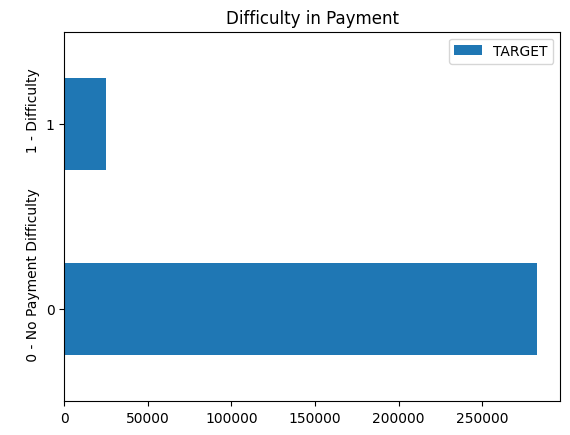

In [68]:
new_app.TARGET.value_counts().plot.barh()
plt.title("Difficulty in Payment")
plt.xticks(rotation =0)
plt.ylabel("\n 0 - No Payment Difficulty        1 - Difficulty")
plt.legend()
plt.show()

SO there is a Class Imbalance Problem, as we have identified it earliear also in this notebook.

we have also calculated the ratio of NO_difficulty_applicant to Difficulty_applicant.
which is shown below.

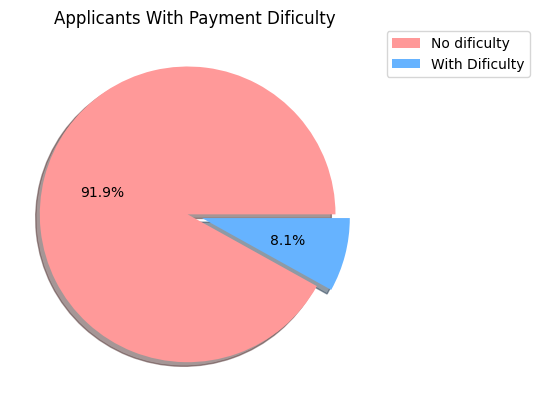

In [69]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
data = new_app.TARGET.value_counts()
ax = data.plot(kind="pie", autopct='%1.1f%%', shadow=True, explode=[0.05, 0.05], colors=colors, legend=True, title='Applicants With Payment Dificulty', ylabel='', labeldistance=None)
ax.legend(['No dificulty','With Dificulty'],bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

*In plain words, bbox_to_anchor accepts a list of four values: (x0, y0, width, height) . It will create a bounding box on the axes, inside which the actual legend will be placed. The lower left coordinate of the bounding box is (x0, y0) . Its width and height are given by width and height , respectively.*

In [70]:
target=new_app.TARGET.value_counts()
res=target[0]/target[1]
print('Non-defaulter to defaulter Ratio',res)

#Checking for ratio of Defaulters and Non-Defaulters.

Non-defaulter to defaulter Ratio 11.387150050352467


**This implies that 1 in every 11 applicant or Approximately 9% of applicants having difficulty in payment.**

### Seperating All Columns of Object Datatypes

In [71]:
# Etracting columns with Object Datatype

app_obj=list(new_app.columns[new_app.dtypes=="object"])
app_obj

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

Cash loans         0.904787
Revolving loans    0.095213
Name: NAME_CONTRACT_TYPE, dtype: float64


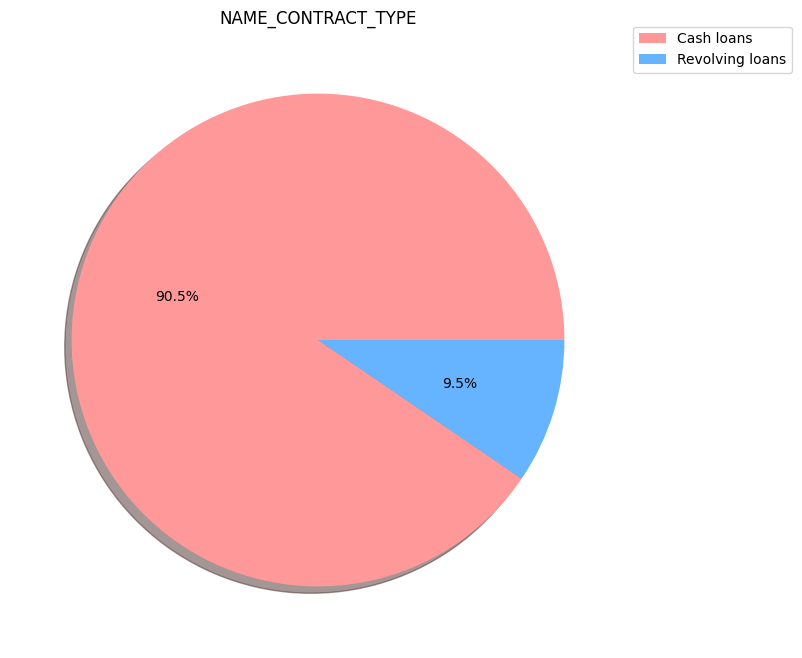



F      0.658344
M      0.341643
XNA    0.000013
Name: CODE_GENDER, dtype: float64


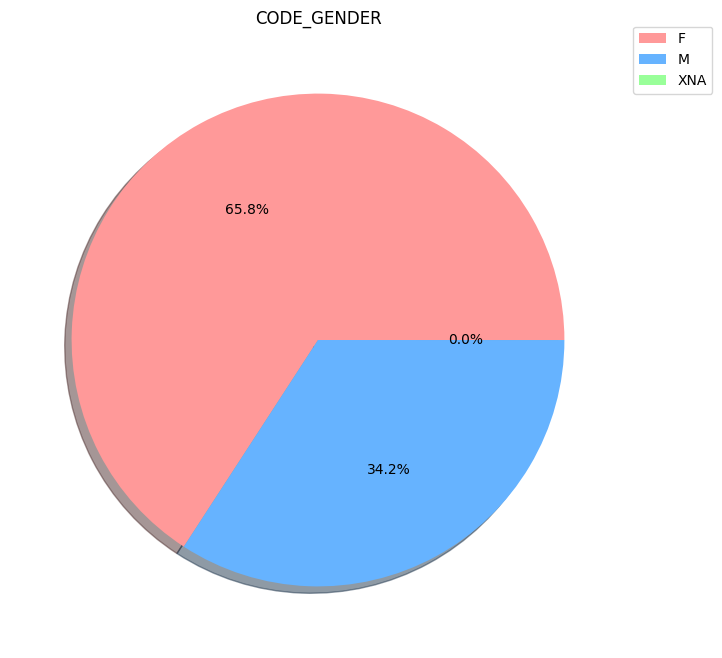



N    0.659892
Y    0.340108
Name: FLAG_OWN_CAR, dtype: float64


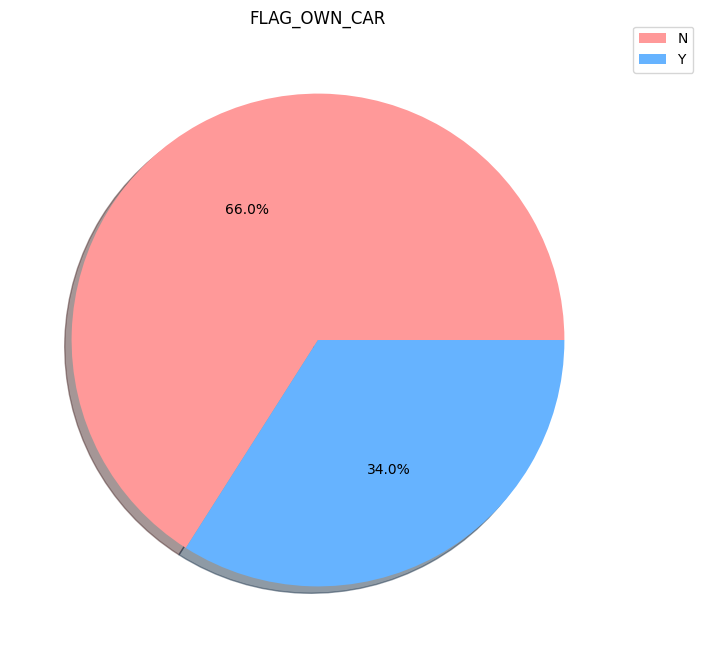



Y    0.693673
N    0.306327
Name: FLAG_OWN_REALTY, dtype: float64


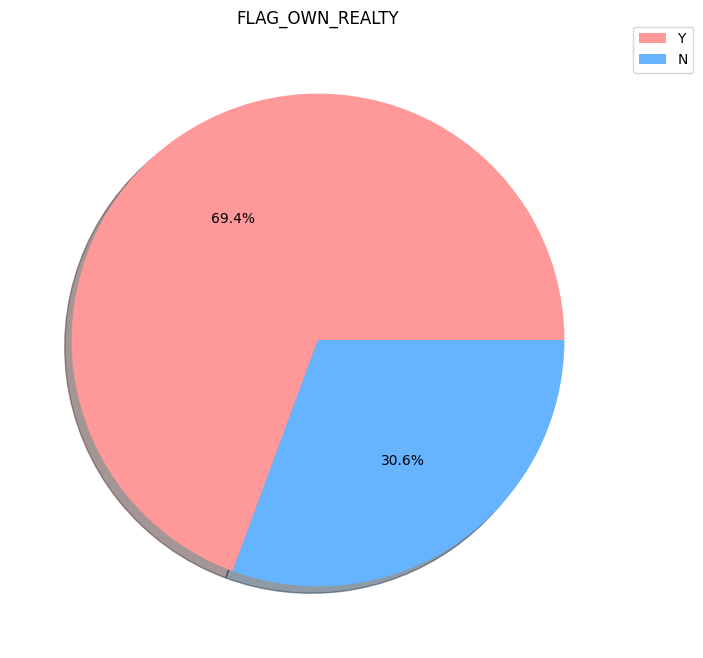



Unaccompanied      0.808186
Family             0.130561
Spouse, partner    0.036974
Children           0.010624
Other_B            0.005756
NaN                0.004201
Other_A            0.002816
Group of people    0.000881
Name: NAME_TYPE_SUITE, dtype: float64


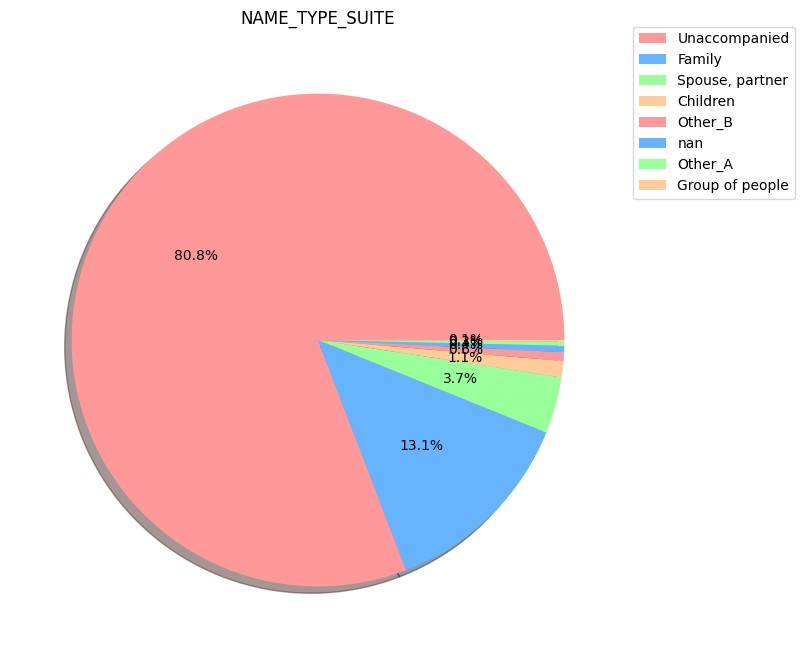



Working                 0.516320
Commercial associate    0.232892
Pensioner               0.180033
State servant           0.070576
Unemployed              0.000072
Student                 0.000059
Businessman             0.000033
Maternity leave         0.000016
Name: NAME_INCOME_TYPE, dtype: float64


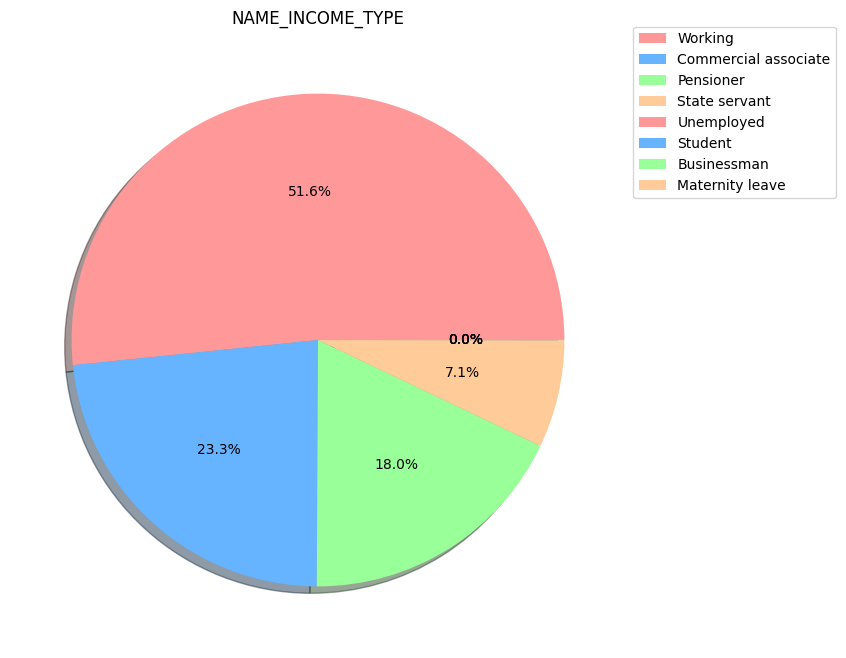



Secondary / secondary special    0.710189
Higher education                 0.243448
Incomplete higher                0.033420
Lower secondary                  0.012409
Academic degree                  0.000533
Name: NAME_EDUCATION_TYPE, dtype: float64


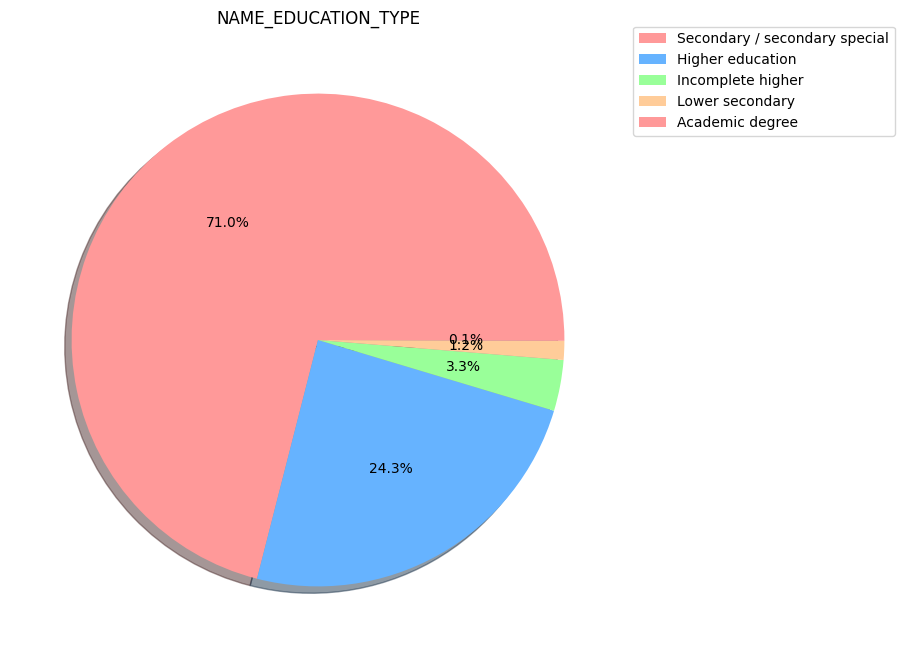



Married                 0.638780
Single / not married    0.147780
Civil marriage          0.096826
Separated               0.064290
Widow                   0.052317
Unknown                 0.000007
Name: NAME_FAMILY_STATUS, dtype: float64


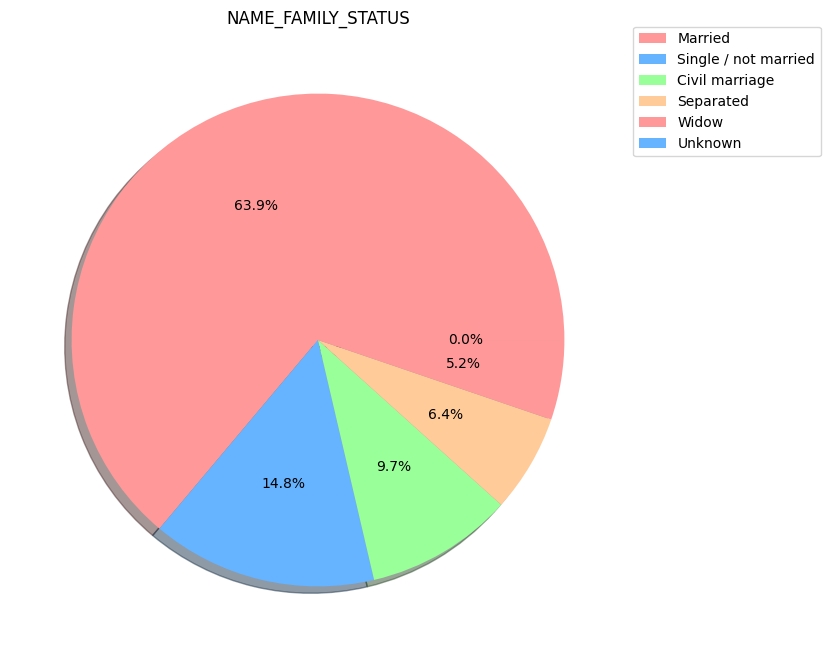



House / apartment      0.887344
With parents           0.048258
Municipal apartment    0.036366
Rented apartment       0.015873
Office apartment       0.008510
Co-op apartment        0.003649
Name: NAME_HOUSING_TYPE, dtype: float64


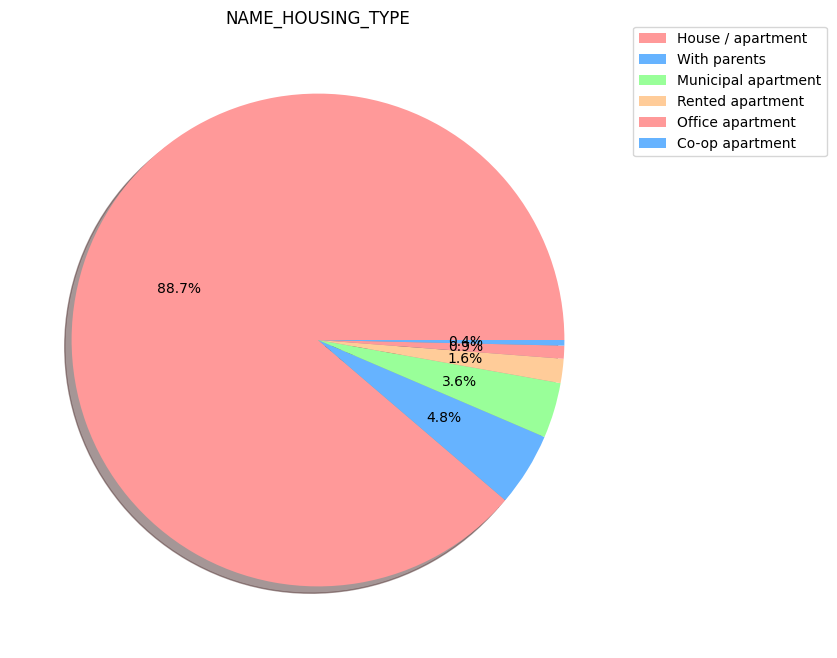



NaN                      0.313455
Laborers                 0.179460
Sales staff              0.104393
Core staff               0.089655
Managers                 0.069497
Drivers                  0.060495
High skill tech staff    0.037007
Accountants              0.031911
Medicine staff           0.027762
Security staff           0.021856
Cooking staff            0.019336
Cleaning staff           0.015131
Private service staff    0.008624
Low-skill Laborers       0.006806
Waiters/barmen staff     0.004384
Secretaries              0.004244
Realty agents            0.002442
HR staff                 0.001831
IT staff                 0.001711
Name: OCCUPATION_TYPE, dtype: float64


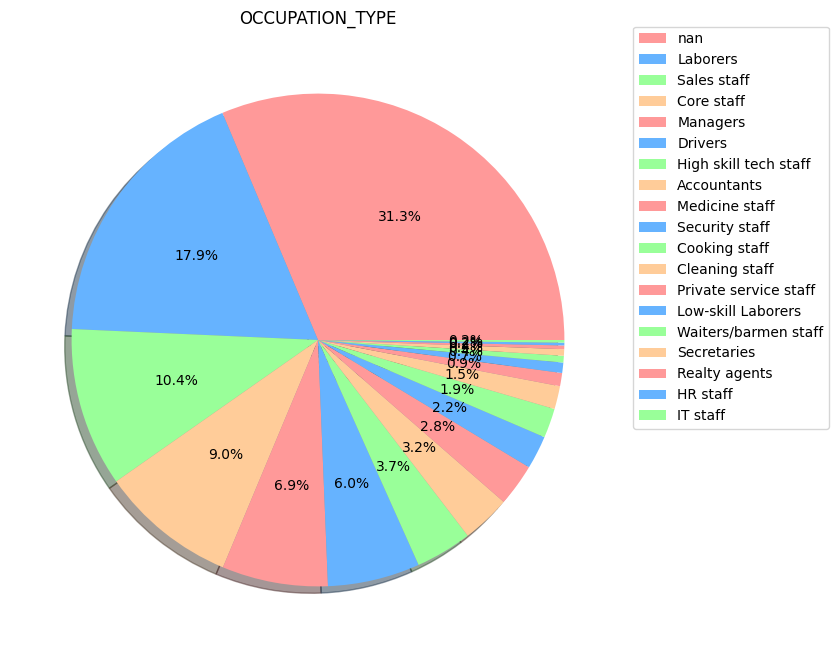



TUESDAY      0.175282
WEDNESDAY    0.168885
MONDAY       0.164918
THURSDAY     0.164518
FRIDAY       0.163695
SATURDAY     0.110084
SUNDAY       0.052619
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64


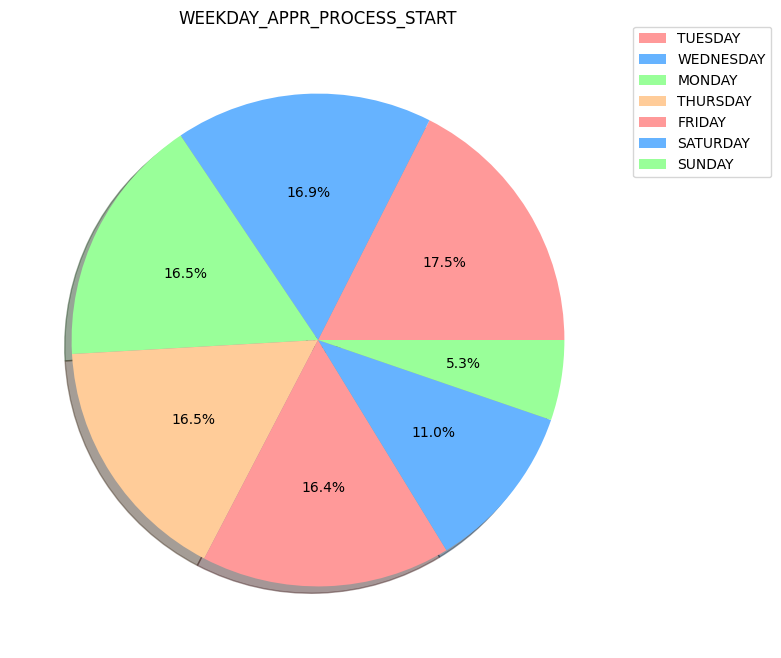



Business Entity Type 3    0.221104
XNA                       0.180072
Self-employed             0.124913
Other                     0.054252
Medicine                  0.036399
Business Entity Type 2    0.034317
Government                0.033833
School                    0.028919
Trade: type 7             0.025466
Kindergarten              0.022373
Construction              0.021856
Business Entity Type 1    0.019459
Transport: type 4         0.017554
Trade: type 3             0.011356
Industry: type 9          0.010952
Industry: type 3          0.010660
Security                  0.010559
Housing                   0.009619
Industry: type 11         0.008793
Military                  0.008566
Bank                      0.008153
Agriculture               0.007980
Police                    0.007613
Transport: type 2         0.007167
Postal                    0.007014
Security Ministries       0.006419
Trade: type 2             0.006179
Restaurant                0.005889
Services          

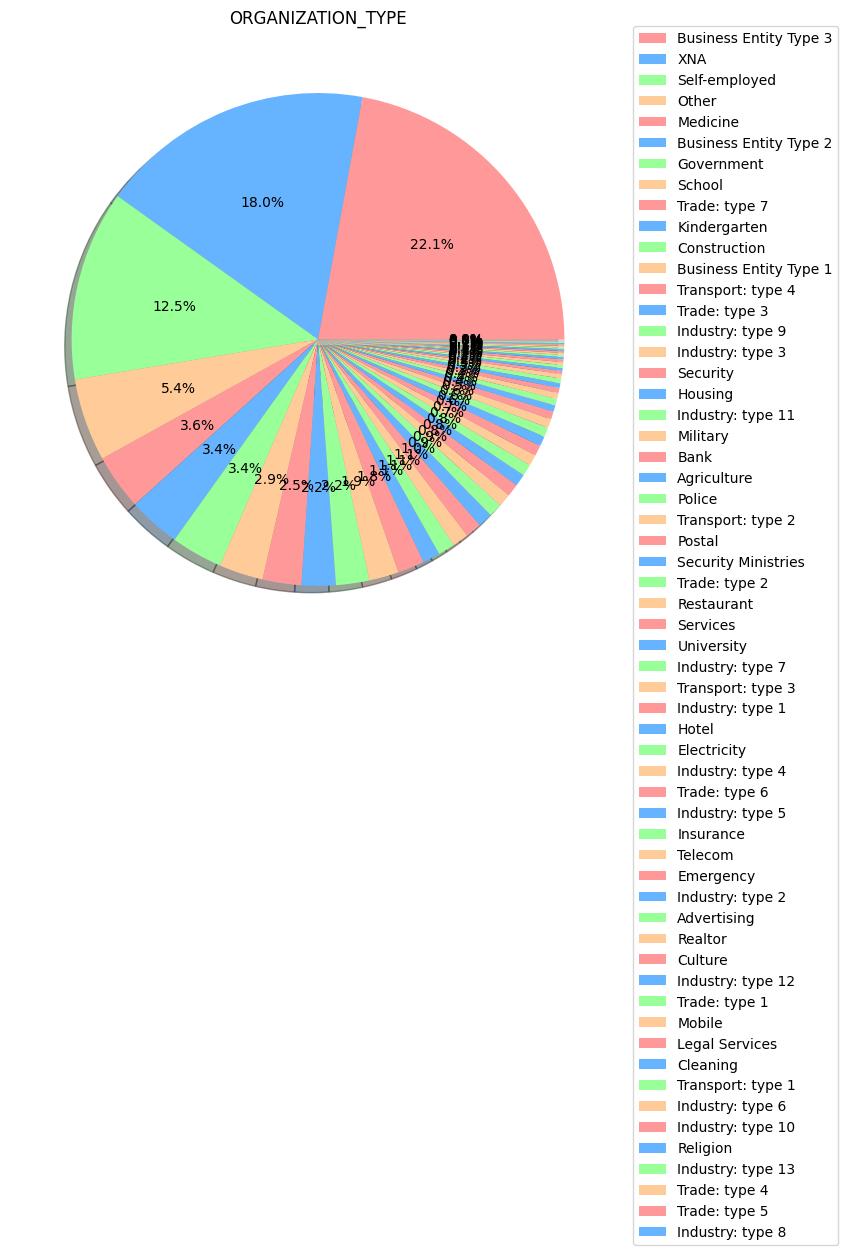

In [72]:
# data = new_app.TARGET.value_counts()
# Applying for loop to find value_counts() of all columns

for i in app_obj:
  plt.figure(figsize=(8,8))
  print(new_app[i].value_counts(normalize=True,dropna=False))
  ax = new_app[i].value_counts(normalize=True,dropna=False).plot(kind="pie", autopct='%1.1f%%', shadow=True,colors=colors, legend=True, title=i, ylabel='', labeldistance=None)
  ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
  plt.show()
  print('\n')


In [73]:
# #  Object Data
# a = 4  # number of rows
# b = 3  # number of columns
# c = 1  # initialize plot counter

# fig = plt.figure(figsize=(20,12))

# for i in app_df.columns:
#     if app_df[i].dtypes=="object":

#         plt.subplot(a, b, c)
#         plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
#         plt.xlabel(i)
#         sns.countplot(app_df[i],palette="Blues_d")
#         c = c + 1

# fig.tight_layout()
# plt.show()

# INFERENCE FROM ABOVE CHARTS:


1. Cash loans holds greater share( >90% ) than Revolving Loans( < 10% )
2. Females have shown more interest towards taking loans which is >65% of total share , whereas men are at only 34.2%.
3. Approximately 66 % of applicants do not own cars.
4. Arround 69 % of applicants do own a Property.
5. Approx 81 % of applicants were not accompanied by anyone at the time of application.
6. Half of the share ( arround 51.6 %) is of working class, 23% for Commercial Associates and 18% for pensioners.
7. Arround 71% of applicants holds Secondary Education.
8. Approx 64% of Applicants are Married
9. 88 % of applicant live in their own property/House
10. 31 % of applicats have'nt mentioned their OCCUpation type
11. No significant difference found in Application_process_start in any weekday






### Handeling Numerical Variables

Now we will perform Variable Selection.

As we our target is to find it the Cause of an applicant being defaulter, Therefor BY virtue of my subject matter Knowledge and belief that, some of the columns are of no use for our Analysis.



In [74]:
# Identification of those columns.

new_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

No use Columns =['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','CNT_FAM_MEMBERS','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

In [75]:
# Changing the Datatype and name of FLAG_OWN_CAR and FLAG_OWN_REALITY
new_app['FLAG_OWN_CAR'].value_counts()

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

In [76]:
#FLAG_OWN_CAR' & 'FLAG_OWN_REALTY' needs to be changed to Binary from yes/no

new_app['OWN_CAR']=np.where(new_app.FLAG_OWN_CAR =="Y",1,0)
new_app['OWN_REALTY']= np.where(new_app.FLAG_OWN_REALTY =="Y",1,0)

In [77]:
new_app['OWN_CAR'].value_counts()

0    202924
1    104587
Name: OWN_CAR, dtype: int64

In [78]:
new_app['OWN_REALTY'].value_counts()

1    213312
0     94199
Name: OWN_REALTY, dtype: int64

In [79]:
new_app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE

In [80]:
# Deleting All Columns with FLAG_ prefix.

No_use_Columns =['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','CNT_FAM_MEMBERS','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
for i in No_use_Columns:
  new_app.drop(i,axis=1,inplace=True)

new_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [81]:
new_app.drop(labels=['FLAG_OWN_CAR','FLAG_OWN_REALTY'],axis=1,inplace=True)
new_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   CNT_CHILDREN                 307511 non-null  int64  
 5   AMT_INCOME_TOTAL             307511 non-null  float64
 6   AMT_CREDIT                   307511 non-null  float64
 7   AMT_ANNUITY                  307499 non-null  float64
 8   AMT_GOODS_PRICE              307233 non-null  float64
 9   NAME_TYPE_SUITE              306219 non-null  object 
 10  NAME_INCOME_TYPE             307511 non-null  object 
 11  NAME_EDUCATION_TYPE          307511 non-null  object 
 12  NAME_FAMILY_STATUS           307511 non-null  object 
 13 

###Standardization Process:

In [82]:
# There are some columns DAYS_EMPLOYED, DAYS_BIRTH, DAYS_ID_PUBLISH, DAYS_REGISTRATION, are in days and some of them are represented negative. Converting to absolute values

# Changing DAYS_BIRTH to AGE_IN_YEARS and Removing negative sign.
new_app.DAYS_BIRTH=new_app.DAYS_BIRTH.apply(lambda x: abs(x//365.25))
new_app.rename({'DAYS_BIRTH':'AGE_IN_YEARS'}, axis=1, inplace=True)
new_app['AGE_IN_YEARS']


0         26.0
1         46.0
2         53.0
3         53.0
4         55.0
          ... 
307506    26.0
307507    57.0
307508    41.0
307509    33.0
307510    47.0
Name: AGE_IN_YEARS, Length: 307511, dtype: float64

In [83]:
new_app.DAYS_EMPLOYED=new_app.DAYS_EMPLOYED.apply(lambda x:abs(x//365.25))
new_app.rename({'DAYS_EMPLOYED':'YEARS_OF_EMPLOYMENT'},axis=1,inplace=True)

new_app.DAYS_ID_PUBLISH=new_app.DAYS_ID_PUBLISH.apply(lambda x:abs(x//365.25))
new_app.rename({'DAYS_ID_PUBLISH':'AGE_OF_ID_IN_YEARS'},axis=1,inplace=True)

new_app.DAYS_REGISTRATION=new_app.DAYS_REGISTRATION.apply(lambda x:abs(x//365.25))
new_app.rename({'DAYS_REGISTRATION':'YEARS_OF_REGISTRATION'},axis=1,inplace=True)

print(new_app.YEARS_OF_EMPLOYMENT,new_app.AGE_OF_ID_IN_YEARS,new_app.YEARS_OF_REGISTRATION)

0           2.0
1           4.0
2           1.0
3           9.0
4           9.0
          ...  
307506      1.0
307507    999.0
307508     22.0
307509     14.0
307510      4.0
Name: YEARS_OF_EMPLOYMENT, Length: 307511, dtype: float64 0          6.0
1          1.0
2          7.0
3          7.0
4         10.0
          ... 
307506     6.0
307507    12.0
307508    15.0
307509     3.0
307510     2.0
Name: AGE_OF_ID_IN_YEARS, Length: 307511, dtype: float64 0         10.0
1          4.0
2         12.0
3         27.0
4         12.0
          ... 
307506    24.0
307507    13.0
307508    19.0
307509     8.0
307510    15.0
Name: YEARS_OF_REGISTRATION, Length: 307511, dtype: float64


In [84]:
# Checking for CNT_CHILDREN

new_app.CNT_CHILDREN.value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64

In [85]:
new_app['CNT_CHILDREN'].describe()

count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

**Coclusion:**

42 Rows have children greater than 5, which may be one of the cause of being defaulter due to inability of bearing Family Expenses.

Now we will perform Binning of Data to deduce some insight out of The columns 'AGE_IN_YEARS' and 'AMT_INCOME_TOTAL'

In [86]:
new_app.AGE_IN_YEARS.describe()

count    307511.000000
mean         44.404607
std          11.945771
min          21.000000
25%          34.000000
50%          44.000000
75%          54.000000
max          70.000000
Name: AGE_IN_YEARS, dtype: float64

<Axes: >

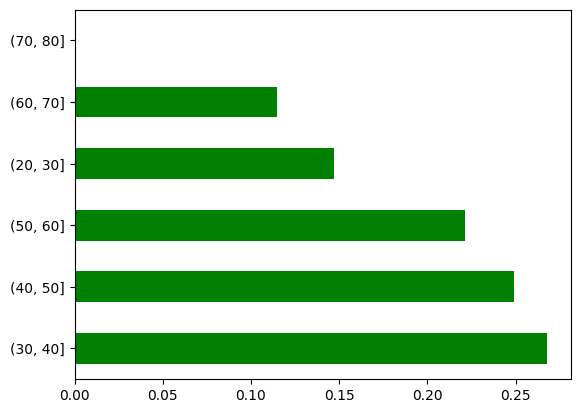

In [87]:
# Creating BINS for Age group

new_app['AGE_GROUP']= pd.cut(new_app.AGE_IN_YEARS,bins=[20,30,40,50,60,70,80])

new_app['AGE_GROUP'].value_counts(normalize=True).plot.barh(color='green')


**Conclusion:**

As per the above Graph it can be concluded that people of AGE_GROUP 30-40 are holding greater share of loan applicants. This may de Due to the fact that people of this age group are more  attracted towards goods and services that are beyond necessary for survival or for traditional displays of status

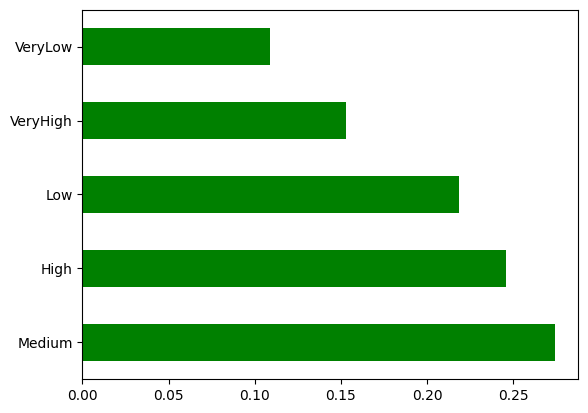

In [88]:
# Creating Bins for "INCOME_GROUP"

new_app['INCOME_GROUP']= pd.qcut(new_app['AMT_INCOME_TOTAL'], q=[0,0.1,0.3,0.6,0.8,1],
                                 labels=['VeryLow','Low','Medium','High','VeryHigh'])

new_app['INCOME_GROUP'].value_counts(normalize=True).plot.barh(color='green')
plt.show()

As per the above Graph it can be concluded that people of Medium INCOME_GROUP 30%ile-60%ile are holding greater share of loan applicants. This may de Due to the fact that people of this INCOME_GROUP more attractive towards asset building(like car , jwellery etc) or Luxury. and we have also seen earlier that Majority of applicants do not owm car, and are females.

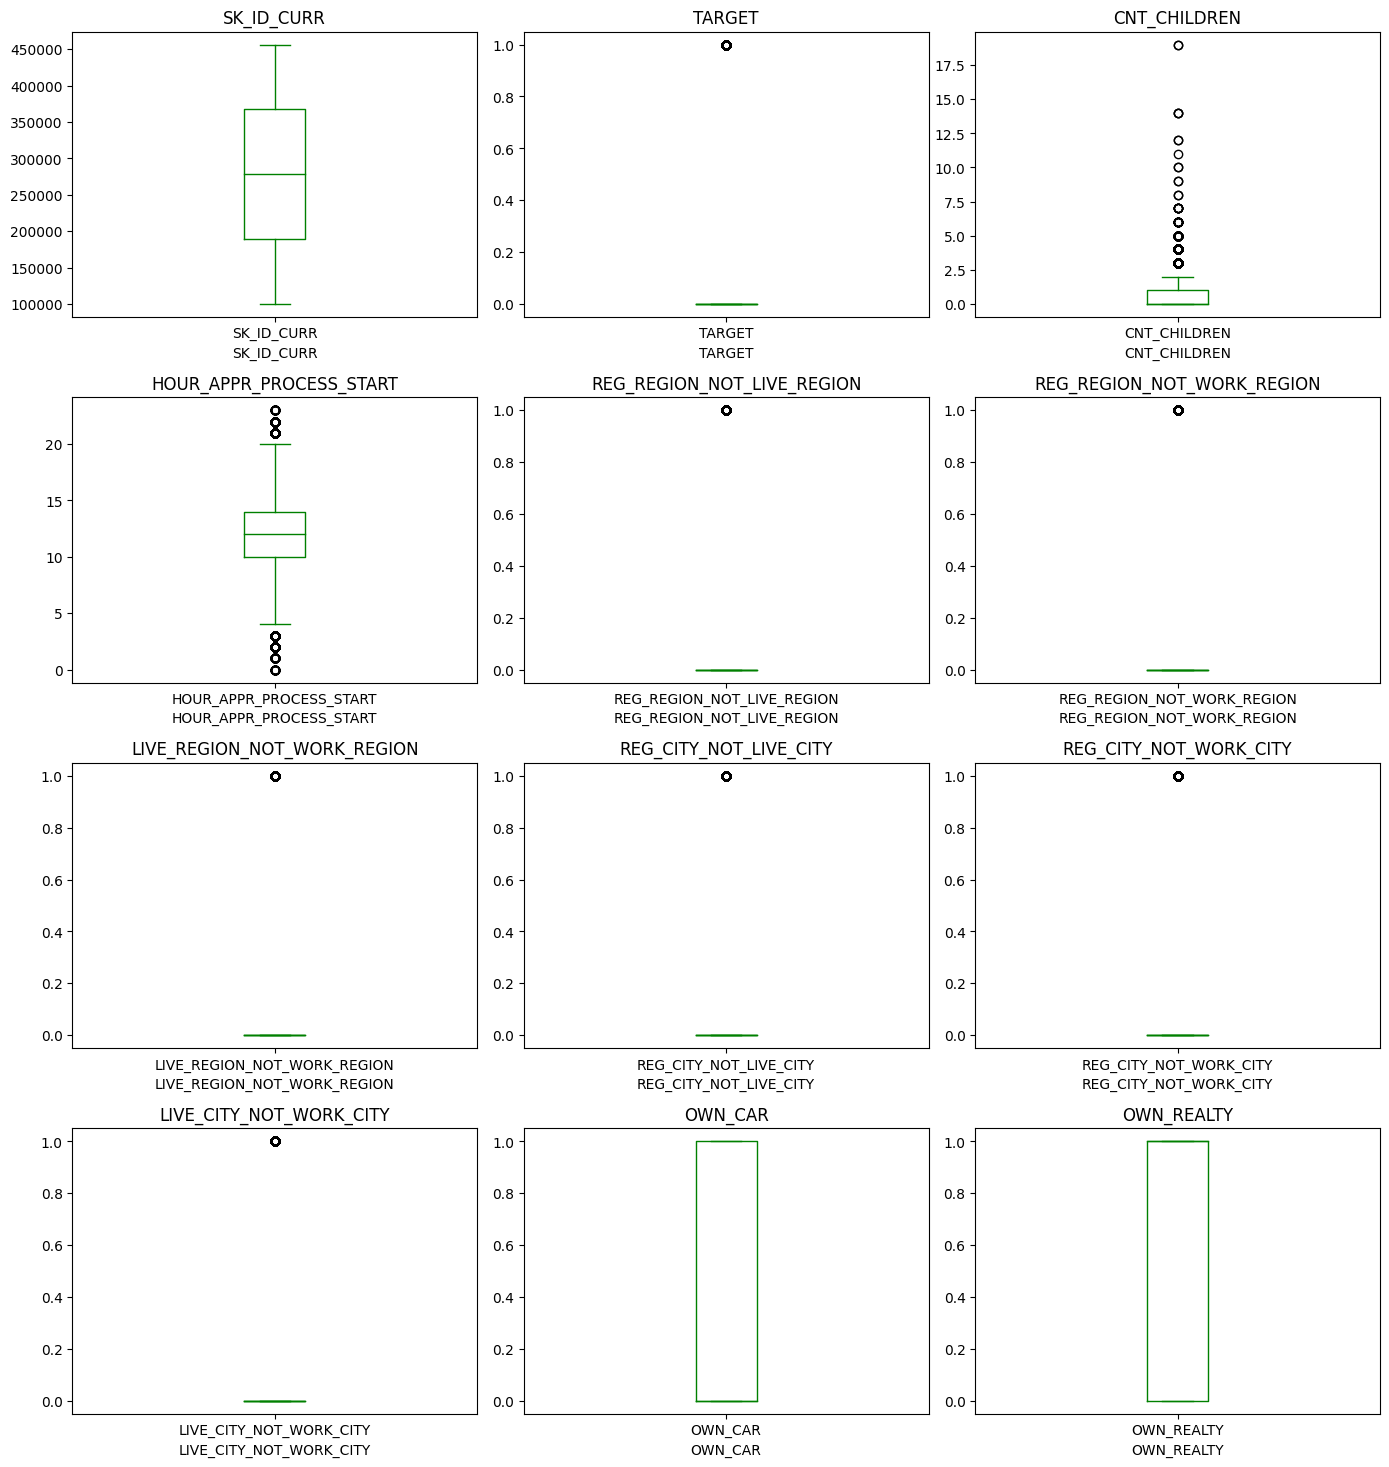

In [89]:
# Creating BOX plots for Numerical Datatypes (INT)
r = 5  # rows
c = 3  # columns
i = 1  # plot counter start

fig = plt.figure(figsize=(14,18))

for item in new_app.columns:
    if new_app[item].dtypes=="int64" or new_app[item].dtypes=="int32" :
        plt.subplot(r,c,i)
        plt.title('{}'.format(item))
        plt.xlabel(item)
        new_app[item].plot.box(color='Green')
        i = i + 1

fig.tight_layout()
plt.show()


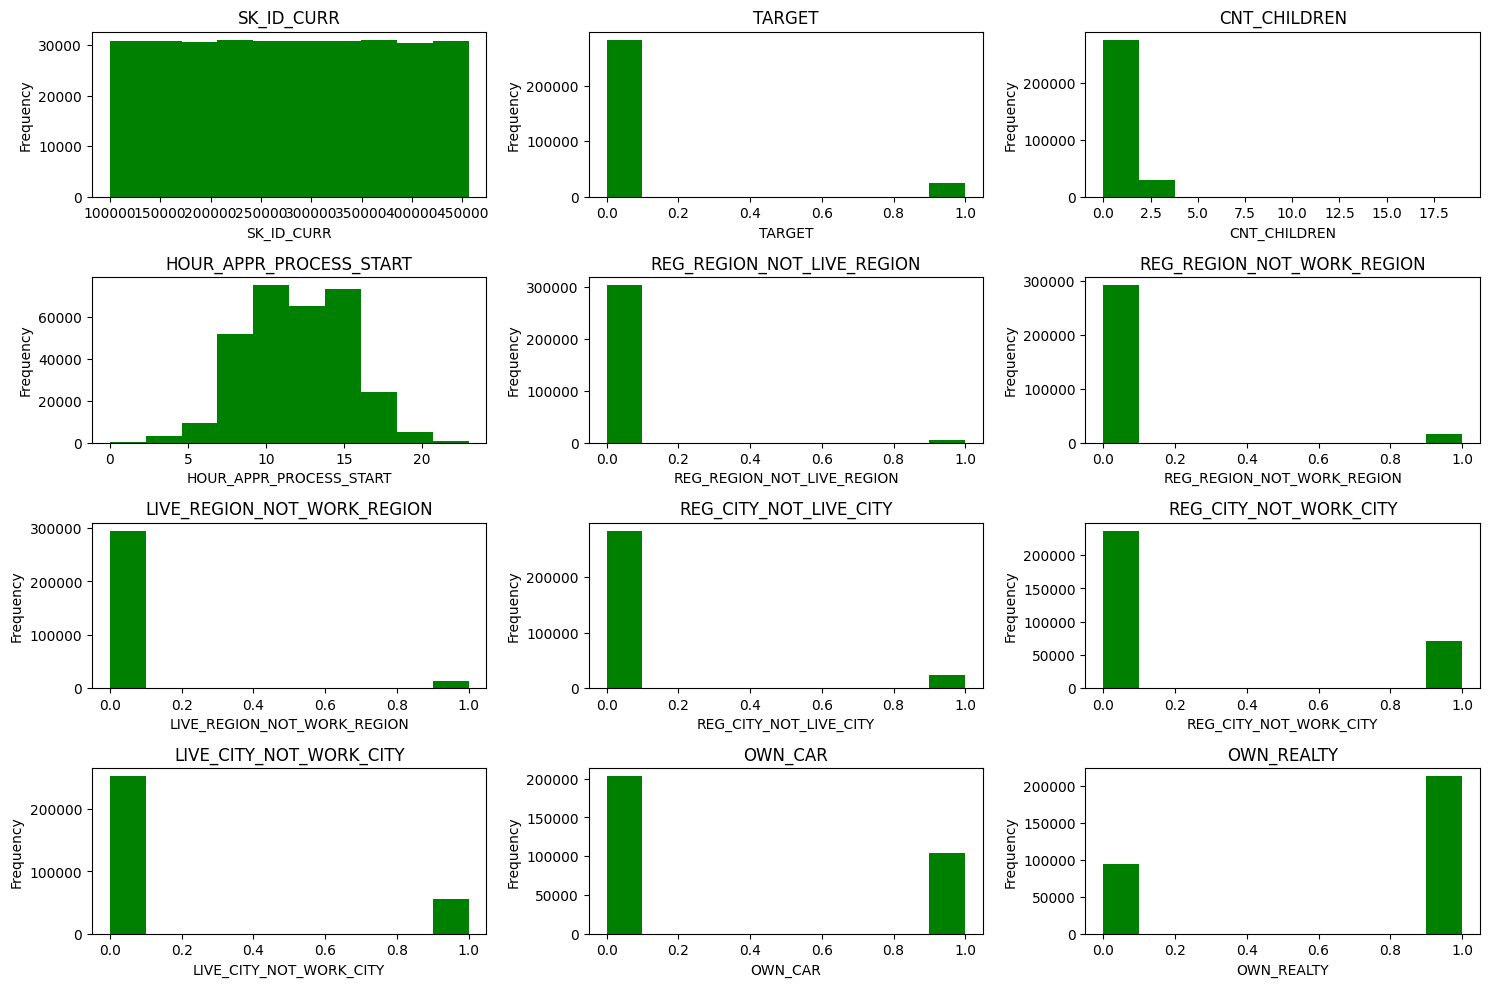

In [90]:
# Creating hist plots for Numerical Datatypes (INT)
r = 5  # rows
c = 3  # columns
i = 1  # plot counter start

fig = plt.figure(figsize=(15,12))

for item in new_app.columns:
    if new_app[item].dtypes=="int64" or new_app[item].dtypes=="int32" :
        plt.subplot(r,c,i)
        plt.title('{}'.format(item))
        plt.xlabel(item)
        new_app[item].plot.hist(color='green')
        i = i + 1

fig.tight_layout()
plt.show()

**Conclusion:**

As per above analysis we can say that Majority of plots here are representing Flags(True/False)
ex. TARGET,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION NOT_WORK_REGION,REG_CITY_ NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OWN CAR,OWN REALTY
, we have kept them as int datatype for the sake of calculation.


###Analysing Columns of Float datatypes.

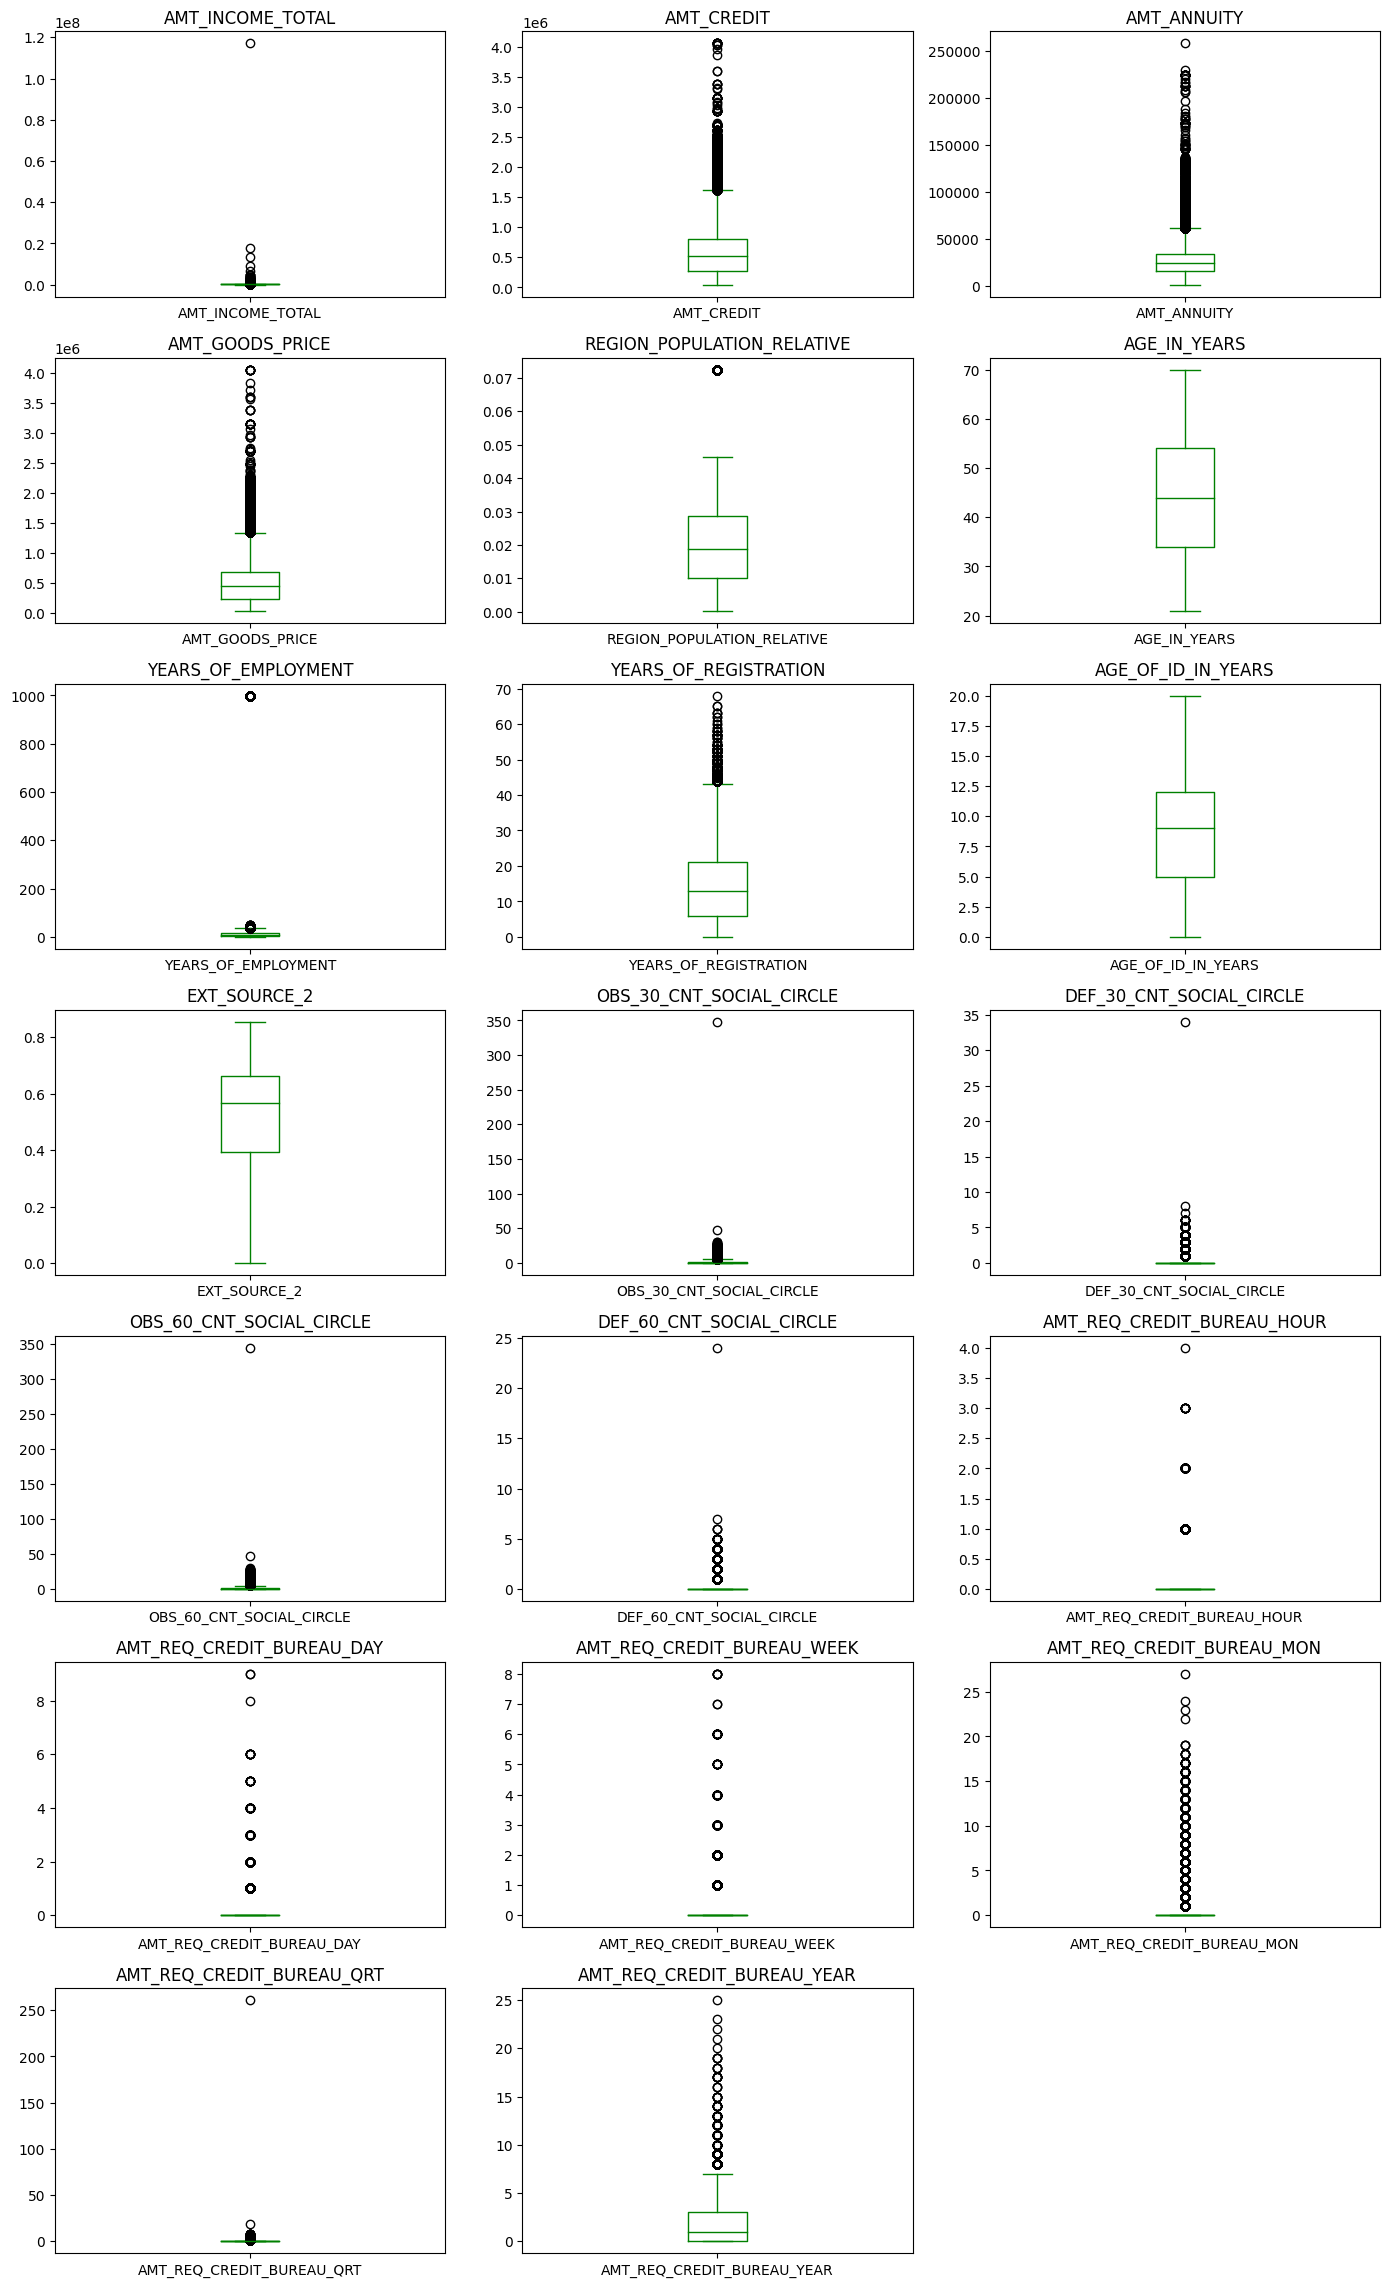

In [91]:
# Boxplots for columns with Float Datatypes
r = 8
c = 3
i = 1

fig = plt.figure(figsize=(14,26))

for item in new_app.columns:
    if new_app[item].dtypes=="float64" or new_app[item].dtypes=="float32" :
        plt.subplot(r, c, i)
        plt.title('{}'.format(item))
        new_app[item].plot.box(color='Green')
        i = i + 1

fig.tight_layout()
plt.show()

We have observed There are many columns having Outliers.Need to be traeted.

### Outlier Analysis and Traetment

As it has been discussed earlier as well some of these columns looks like they have outliers , but do they realy be considered as ouliers.
- for ex. ['AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','Year_OF_REGISTRATION'] and all columns related to CREDIT_BUREAU Ratings

In [92]:
import scipy.stats as stat

In [93]:
Out_col=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE',
         'YEARS_OF_EMPLOYMENT','YEARS_OF_REGISTRATION','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',
         'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_HOUR',
         'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
         'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']

for item in Out_col:
  print(stat.zscore(new_app[item]), end='  |  ')

0         0.142129
1         0.426792
2        -0.427196
3        -0.142533
4        -0.199466
            ...   
307506   -0.047646
307507   -0.408219
307508   -0.066623
307509    0.009287
307510   -0.047646
Name: AMT_INCOME_TOTAL, Length: 307511, dtype: float64  |  0        -0.478095
1         1.725450
2        -1.152888
3        -0.711430
4        -0.213734
            ...   
307506   -0.855489
307507   -0.818594
307508    0.195379
307509   -0.568757
307510    0.188760
Name: AMT_CREDIT, Length: 307511, dtype: float64  |  0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
307506   NaN
307507   NaN
307508   NaN
307509   NaN
307510   NaN
Name: AMT_ANNUITY, Length: 307511, dtype: float64  |  0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
307506   NaN
307507   NaN
307508   NaN
307509   NaN
307510   NaN
Name: AMT_GOODS_PRICE, Length: 307511, dtype: float64  |  0        -0.149452
1        -1.252750
2        -0.783451
3        -0.928

In [94]:
# Analysis using zscore

Out_col=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE',
         'REGION_POPULATION_RELATIVE','YEARS_OF_EMPLOYMENT','YEARS_OF_REGISTRATION',
         'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE',
         'DEF_60_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
         'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT',
         'AMT_REQ_CREDIT_BUREAU_YEAR']

for item in Out_col:
    print( item, ":", end= " ")
    print(new_app.iloc[np.where(np.abs(stat.zscore(new_app[item])>3))].shape)


AMT_INCOME_TOTAL : (454, 44)
AMT_CREDIT : (3255, 44)
AMT_ANNUITY : (0, 44)
AMT_GOODS_PRICE : (0, 44)
REGION_POPULATION_RELATIVE : (8412, 44)
YEARS_OF_EMPLOYMENT : (0, 44)
YEARS_OF_REGISTRATION : (645, 44)
OBS_30_CNT_SOCIAL_CIRCLE : (0, 44)
DEF_30_CNT_SOCIAL_CIRCLE : (0, 44)
OBS_60_CNT_SOCIAL_CIRCLE : (0, 44)
DEF_60_CNT_SOCIAL_CIRCLE : (0, 44)
AMT_REQ_CREDIT_BUREAU_HOUR : (0, 44)
AMT_REQ_CREDIT_BUREAU_DAY : (0, 44)
AMT_REQ_CREDIT_BUREAU_WEEK : (0, 44)
AMT_REQ_CREDIT_BUREAU_MON : (0, 44)
AMT_REQ_CREDIT_BUREAU_QRT : (0, 44)
AMT_REQ_CREDIT_BUREAU_YEAR : (0, 44)


We have taken zscore limit as 3 because , as it can be seen in the boxplot the datapoints seems as an oulier but very close to eachother,Though they have gap in between them but was not as significant as it can be considered as outlier. So we are considering 99.7% data ppoints, and will be substituted using Median values.

- Why Median not mean , because many of them are Flag columns, and Distribution of almost all columns is skwed, and in such case median is less sensitive to outliers as compared to mean.

- But leaving them as it is for now.



### Segmentation of Positive Class and Negative Class

- Target==0 , NO Difficulty in Payment
- Target==1 , Difficulty in Payment.

In [95]:
no_dif=new_app[new_app['TARGET']==0]
dif=new_app[new_app['TARGET']==1]

In [96]:
no_dif.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  CNT_CHILDREN  \
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             0   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   
5      100008       0         Cash loans           M             0   

   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
1          270000.0   1293502.5      35698.5        1129500.0   
2           67500.0    135000.0       6750.0         135000.0   
3          135000.0    312682.5      29686.5         297000.0   
4          121500.0    513000.0      21865.5         513000.0   
5           99000.0    490495.5      27517.5         454500.0   

   NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
1           Family    State servant               Higher education   
2    Unaccompanied          Working  Secondary / secondary special   
3    Unaccompanied          Working  Secondary / secondary special   
4    Unaccompanied          Working  Secondary / secondary special   
5  Spouse, partner    State servant  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   
5               Married  House / apartment                    0.035792   

   AGE_IN_YEARS  YEARS_OF_EMPLOYMENT  YEARS_OF_REGISTRATION  \
1          46.0                  4.0                    4.0   
2          53.0                  1.0                   12.0   
3          53.0                  9.0                   27.0   
4          55.0                  9.0                   12.0   
5          47.0                  5.0                   14.0   

   AGE_OF_ID_IN_YEARS OCCUPATION_TYPE WEEKDAY_APPR_PROCESS_START  \
1                 1.0      Core staff                     MONDAY   
2                 7.0        Laborers                     MONDAY   
3                 7.0        Laborers                  WEDNESDAY   
4                10.0      Core staff                   THURSDAY   
5                 2.0        Laborers                  WEDNESDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   
5                       16                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   
5                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   
5                       0                       0                        0   

        ORGANIZATION_TYPE  EXT_SOURCE_2  OBS_30_CNT_SOCIAL_CIRCLE  \
1                  School      0.622246                       1.0   
2              Government      0.555912                       0.0   
3  Business Entity Type 3      0.650442                       2.0   
4                Religion      0.322738                       0.0   
5

In [97]:
no_dif.shape

(282686, 44)

In [98]:
dif.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  CNT_CHILDREN  \
0       100002       1         Cash loans           M             0   
26      100031       1         Cash loans           F             0   
40      100047       1         Cash loans           M             0   
42      100049       1         Cash loans           F             0   
81      100096       1         Cash loans           F             0   

    AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0           202500.0    406597.5      24700.5         351000.0   
26          112500.0    979992.0      27076.5         702000.0   
40          202500.0   1193580.0      35028.0         855000.0   
42          135000.0    288873.0      16258.5         238500.0   
81           81000.0    252000.0      14593.5         252000.0   

   NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0    Unaccompanied               Working  Secondary / secondary special   
26   Unaccompanied               Working  Secondary / secondary special   
40   Unaccompanied  Commercial associate  Secondary / secondary special   
42   Unaccompanied               Working  Secondary / secondary special   
81   Unaccompanied             Pensioner  Secondary / secondary special   

      NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0   Single / not married  House / apartment                    0.018801   
26                 Widow  House / apartment                    0.018029   
40               Married  House / apartment                    0.025164   
42        Civil marriage  House / apartment                    0.007305   
81               Married  House / apartment                    0.028663   

    AGE_IN_YEARS  YEARS_OF_EMPLOYMENT  YEARS_OF_REGISTRATION  \
0           26.0                  2.0                   10.0   
26          52.0                  8.0                   18.0   
40          48.0                  4.0                    4.0   
42          37.0                 10.0                    1.0   
81          68.0                999.0                   15.0   

    AGE_OF_ID_IN_YEARS OCCUPATION_TYPE WEEKDAY_APPR_PROCESS_START  \
0                  6.0        Laborers                  WEDNESDAY   
26                 6.0   Cooking staff                     MONDAY   
40                 3.0        Laborers                    TUESDAY   
42                13.0     Sales staff                   THURSDAY   
81                12.0             NaN                   THURSDAY   

    HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                        10                           0   
26                        9                           0   
40                        9                           0   
42                       11                           0   
81                       10                           0   

    REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                            0                            0   
26                           0                            0   
40                           0                            0   
42                           0                            0   
81                           0                            0   

    REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                        0                       0                        0   
26                       0                       0                        0   
40                       0                       0                        0   
42                       0                       0                        0   
81                       0                       0                        0   

         ORGANIZATION_TYPE  EXT_SOURCE_2  OBS_30_CNT_SOCIAL_CIRCLE  \
0   Business Entity Type 3      0.262949                       2.0   
26  Business Entity Type 3      0.548477                      10.0   
40  Business Entity Type 3      0.306841                   

In [99]:
dif.shape

(24825, 44)

#### Segmentation of variables in Numerical, Object, categorical Datatypes

In [100]:
# segmenting Variables
new_app_obj=[]
new_app_num=[]
for item in new_app.columns:
    if new_app[item].dtypes=="object":
        new_app_obj.append(item)
    else:
        new_app_num.append(item)

new_app_cat=[]
for item in new_app_num:
    if len(new_app[item].unique())<4:
        new_app[item].astype("category")
        new_app_cat.append(item)

for item in new_app_cat:
    new_app_num.remove(item)


In [101]:
print('Numeric Variables: ',new_app_num )

Numeric Variables:  ['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'AGE_IN_YEARS', 'YEARS_OF_EMPLOYMENT', 'YEARS_OF_REGISTRATION', 'AGE_OF_ID_IN_YEARS', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AGE_GROUP', 'INCOME_GROUP']


In [102]:
print('Object type Variables: ',new_app_obj )

Object type Variables:  ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']


In [103]:
print('categorical Variables: ',new_app_cat )

categorical Variables:  ['TARGET', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'OWN_CAR', 'OWN_REALTY']


In [104]:
# Our Numerical variable list has AGE_GROUP and INCOME_GROUP which are Range Data and we aso our TARGET Variable in categorical variable list, which is to be removed.
new_app_num.remove('INCOME_GROUP')
new_app_num.remove('AGE_GROUP')
new_app_num.remove('SK_ID_CURR')
new_app_obj.remove('CODE_GENDER')

new_app_cat.append('CODE_GENDER')

new_app_cat.remove('TARGET')

print('Numeric Variables: ',new_app_num )
print("\n")

print('Object type Variables: ',new_app_obj)
print("\n")

print('categorical Variables: ',new_app_cat)

Numeric Variables:  ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'AGE_IN_YEARS', 'YEARS_OF_EMPLOYMENT', 'YEARS_OF_REGISTRATION', 'AGE_OF_ID_IN_YEARS', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


Object type Variables:  ['NAME_CONTRACT_TYPE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']


categorical Variables:  ['REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'OWN_CAR', 'OWN_REALTY', '

#### UNIVARIATE ANALYSIS WITH BOTH NEGATIVE CLASS AND POSITIVE CLASS

Plot for :  NAME_CONTRACT_TYPE


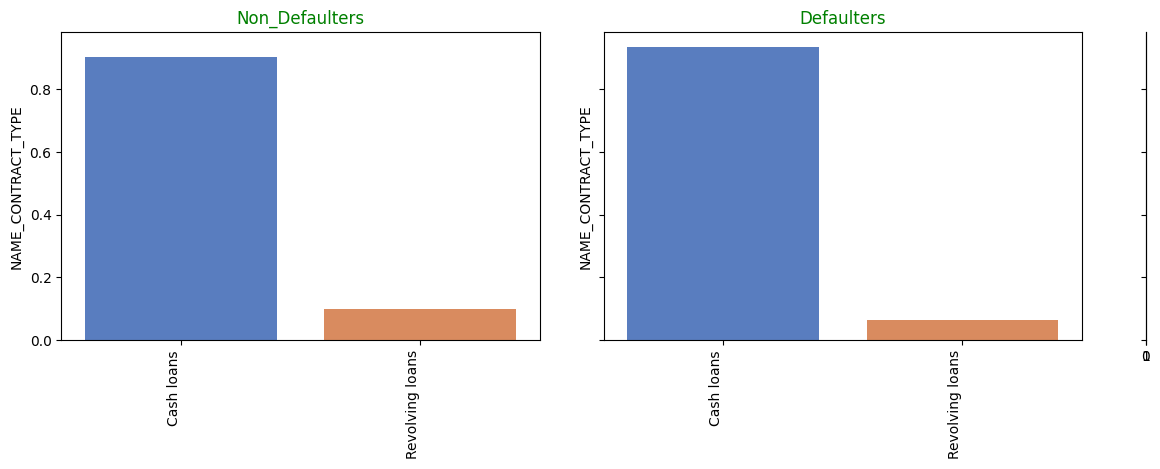

Plot for :  NAME_TYPE_SUITE


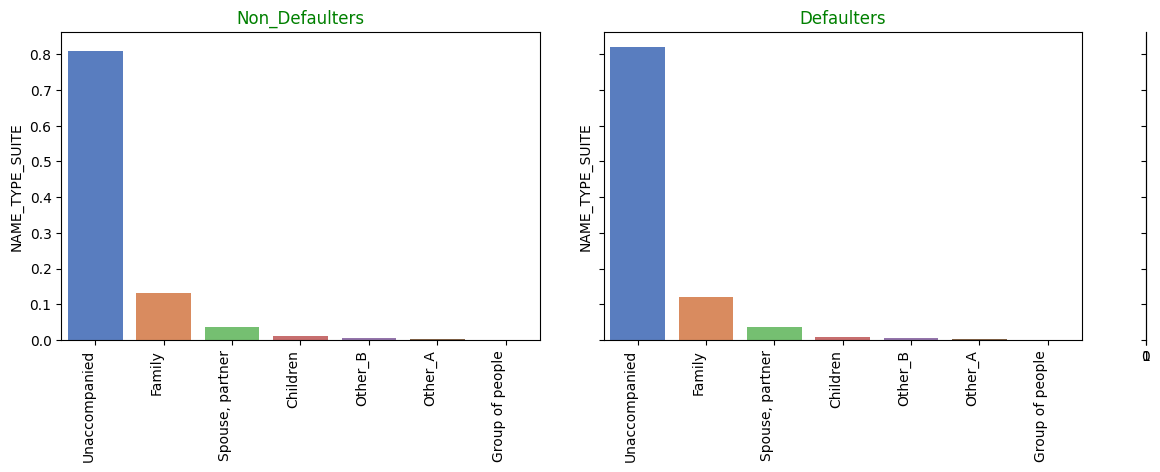

Plot for :  NAME_INCOME_TYPE


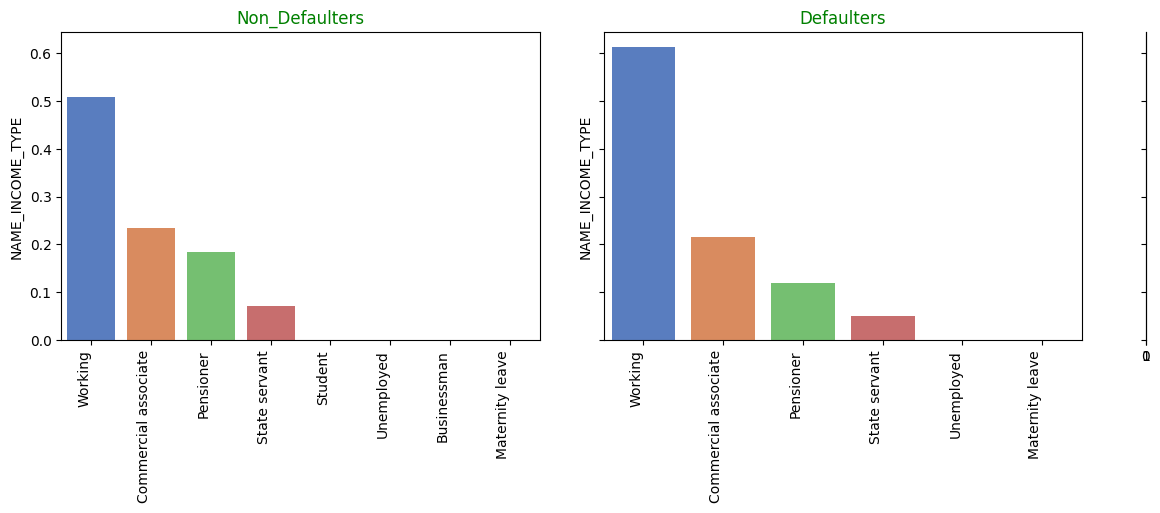

Plot for :  NAME_EDUCATION_TYPE


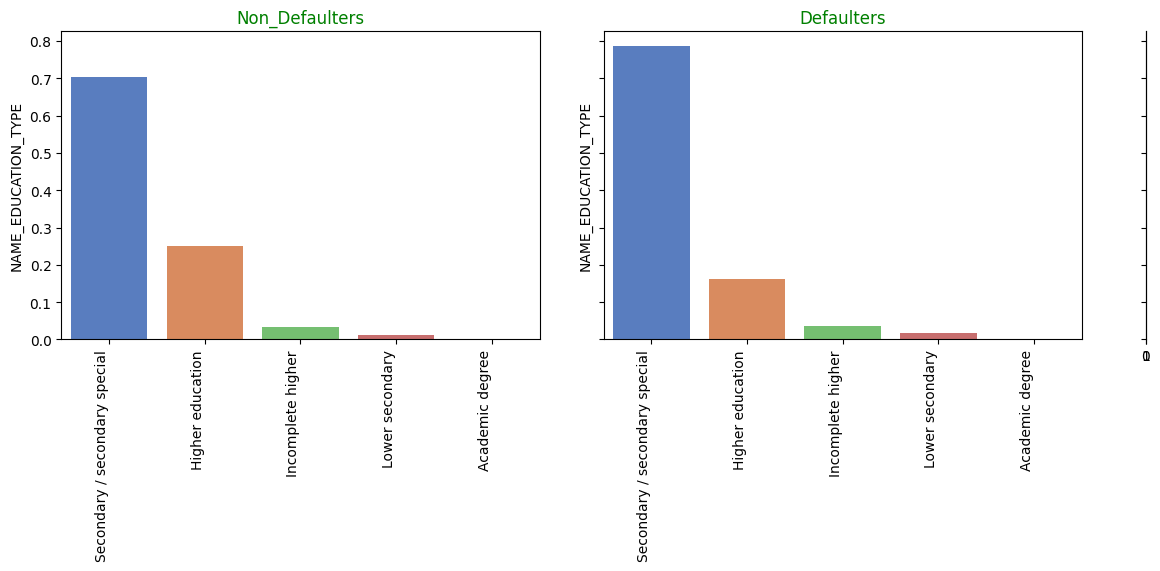

Plot for :  NAME_FAMILY_STATUS


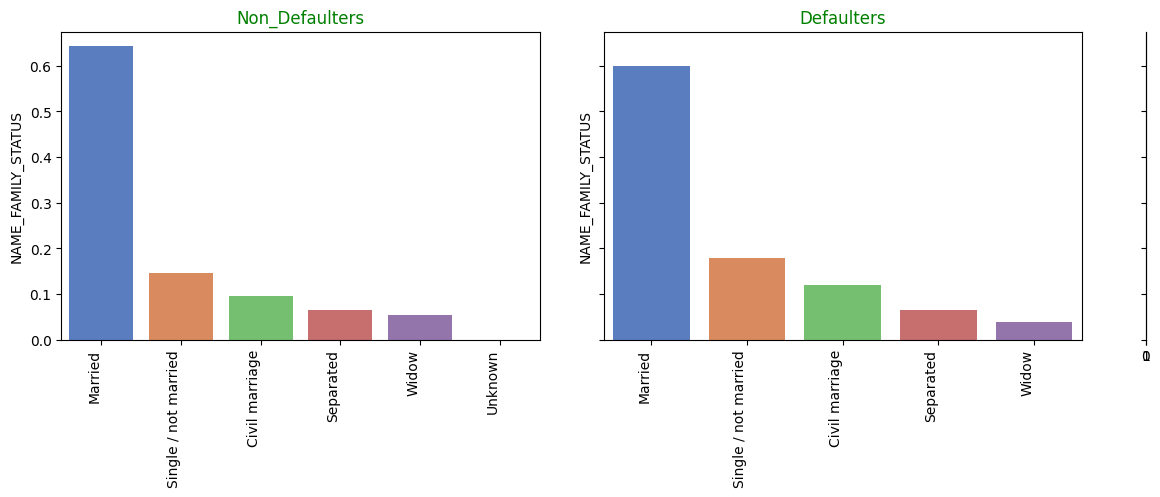

Plot for :  NAME_HOUSING_TYPE


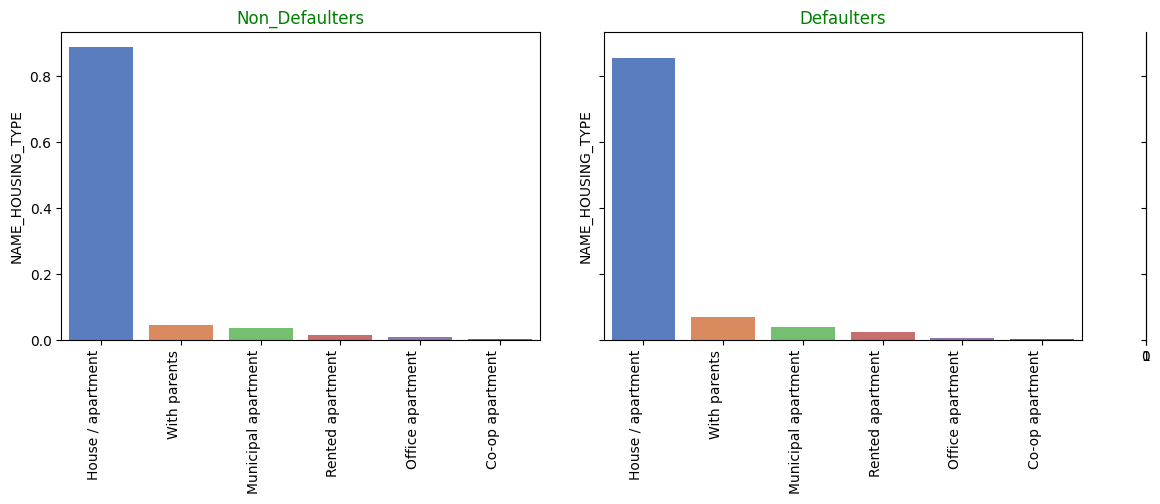

Plot for :  OCCUPATION_TYPE


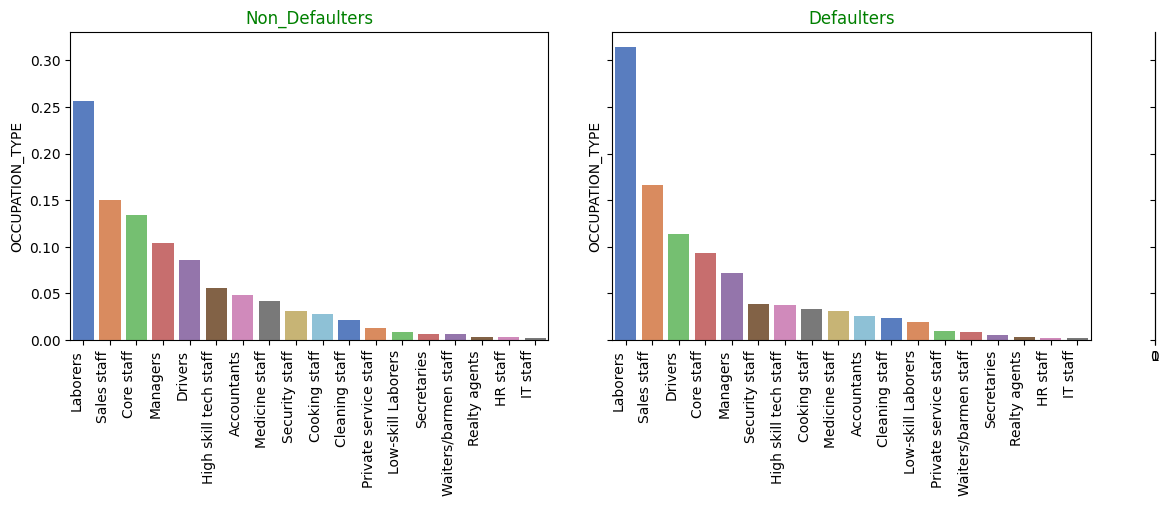

Plot for :  WEEKDAY_APPR_PROCESS_START


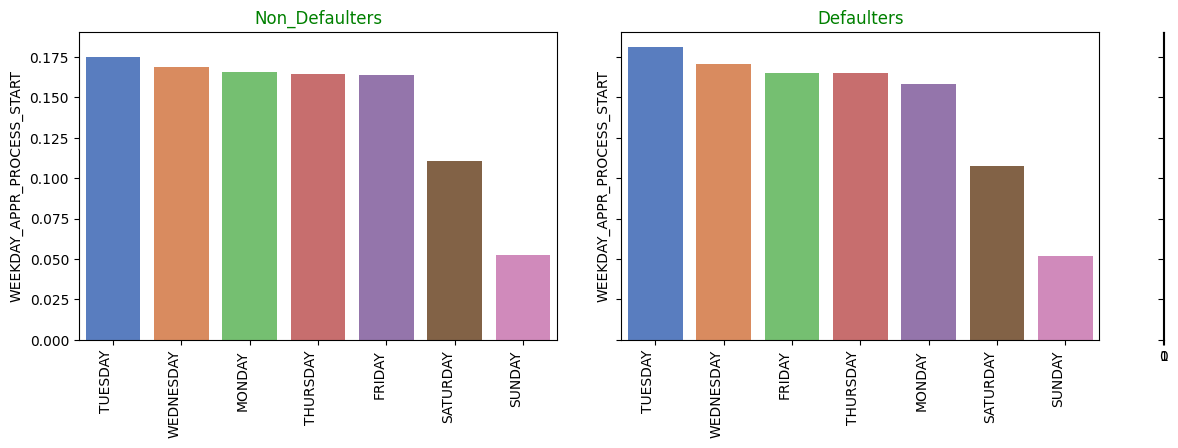

Plot for :  ORGANIZATION_TYPE


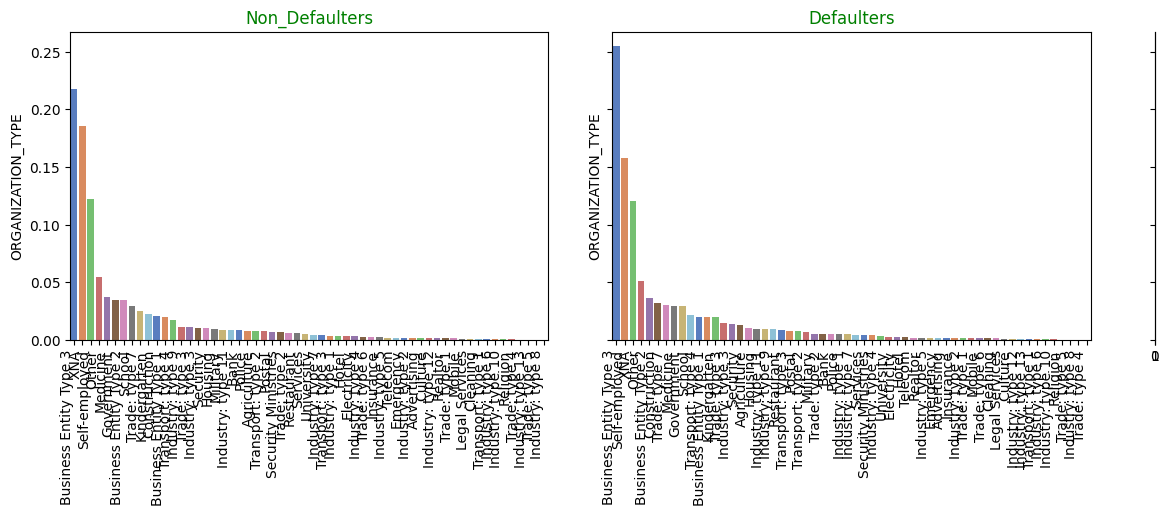

In [105]:
# Checking for Object Datatypes

for item in new_app_obj:
  Tar_0=no_dif[item].value_counts(normalize=True)
  f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,gridspec_kw={'width_ratios':[1,1, 0.001]},figsize=(14,4))
  print("Plot for : ",item)
  chart1=sns.barplot(x=Tar_0.index, y=Tar_0, ax=ax1, palette="muted")
  chart1.set_xticklabels(chart1.get_xticklabels(minor=False), rotation=90, horizontalalignment='right')
  chart1.axes.set_title('Non_Defaulters',fontsize= 12,fontweight= 7,color='Green')
  Tar_1=dif[item].value_counts(normalize=True)
  chart2=sns.barplot(x=Tar_1.index, y=Tar_1,ax=ax2, palette="muted")
  chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90, horizontalalignment='right')
  chart2.axes.set_title('Defaulters',fontsize= 12,fontweight= 7,color='Green')
  plt.show()

#### Conclusion:
1. CAsh Loans a very large share For Non_defaulters ( approx 85 % ) and for Defaulters (approx 95%) in column NAME_CONTRACT_TYPE.
2. Approx 80% of Non_Defaulters and above 80% of Defaulters have applied for loan unaccompanied as per column NAME_TYPE_SUIT.
3.  As per column NAME_INCOME_TYPE 50% of Non_Defaulters and 60% of Defaulters are working applicants.
4. Approx 70% of Non_Defaulters and 79% of Defaulters are Secondary Educated as per column NAME_EDUCATION_TYPE. Here difference between Positive class and Negative class is not significant to conclude anything.
5. Approximatelt 60% Defaulter Applicants are Married in column NAME_FAMILY_STATUS.
6. Housing Type data shows approx 85% of Defaulters own a Residential Property. So owning property can not guaranty that applicant will not have any dificulty in repayment of loan.
7. Appproximately 60% of Defaulters having OCCUPATION_TYPE as ['Laborers,
Sales staff,Drivers,Core staff]
8. Week days does'nt show any relevance with applicant being a defaulter.
9. From ORGAIZATION_TYPE chart is observed that above 25% of Defaulters are BUSINESS_ENTITY_TYPE_3 , approx 16% are XNA and arround 12% are SELF_EMPLOYED.They constitute arround 53% of Defaulters. Whereas in Non_Defaulters they constitute 52% , So from here also we cannot conclude anything as it is a chance of almost 50:50 .


#### Univariate analysis with Categorical Variable.

Plot for :  REG_REGION_NOT_LIVE_REGION


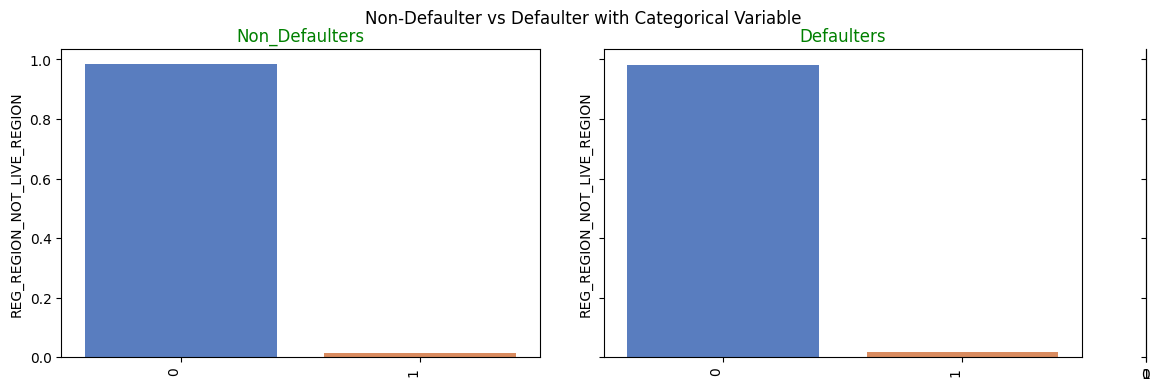

Plot for :  REG_REGION_NOT_WORK_REGION


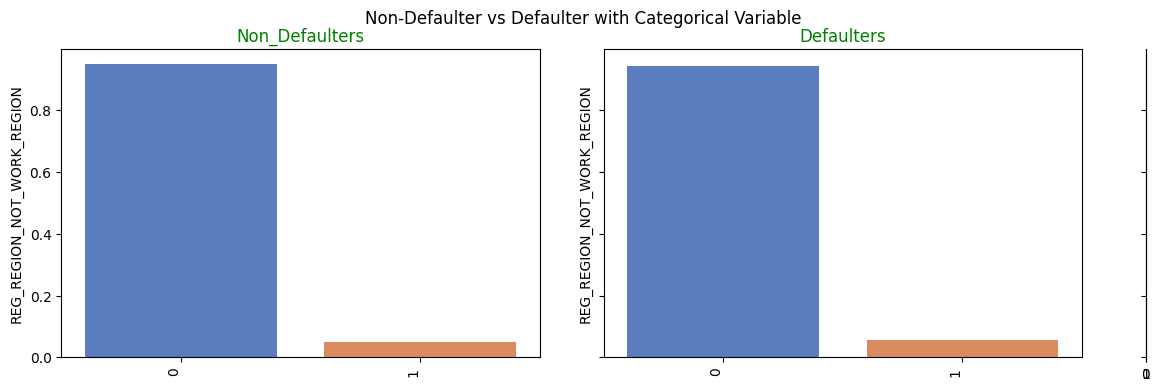

Plot for :  LIVE_REGION_NOT_WORK_REGION


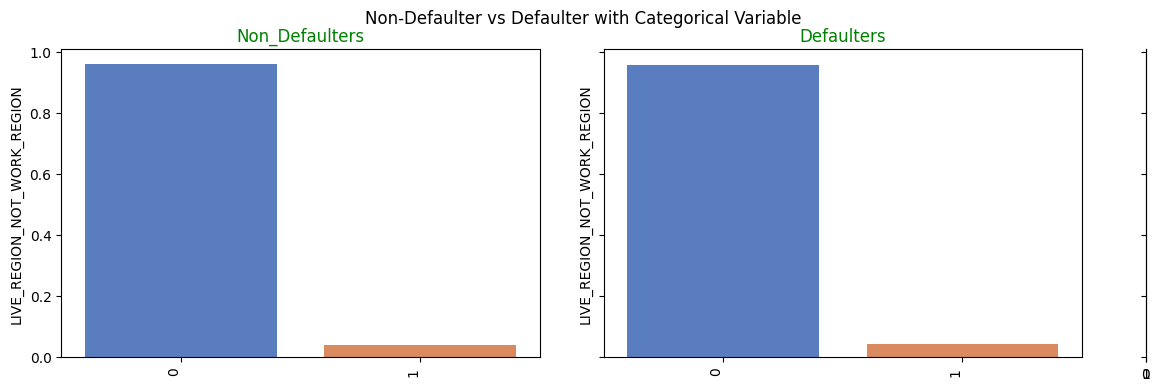

Plot for :  REG_CITY_NOT_LIVE_CITY


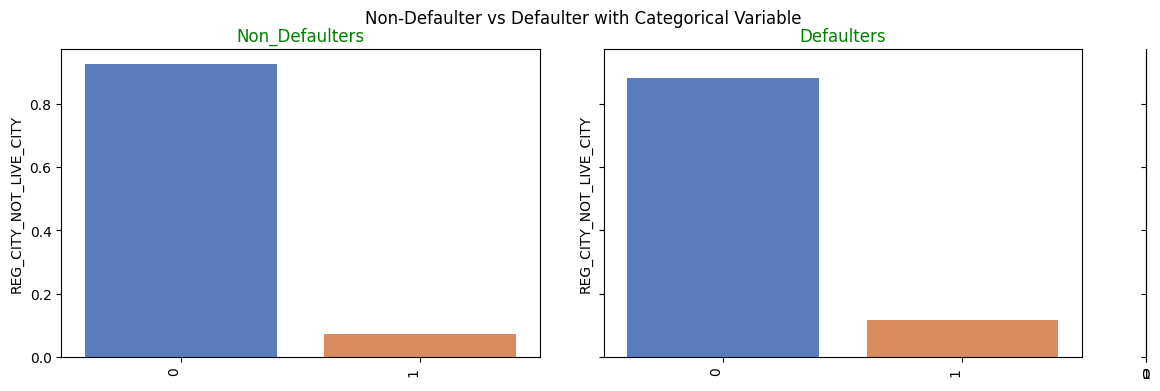

Plot for :  REG_CITY_NOT_WORK_CITY


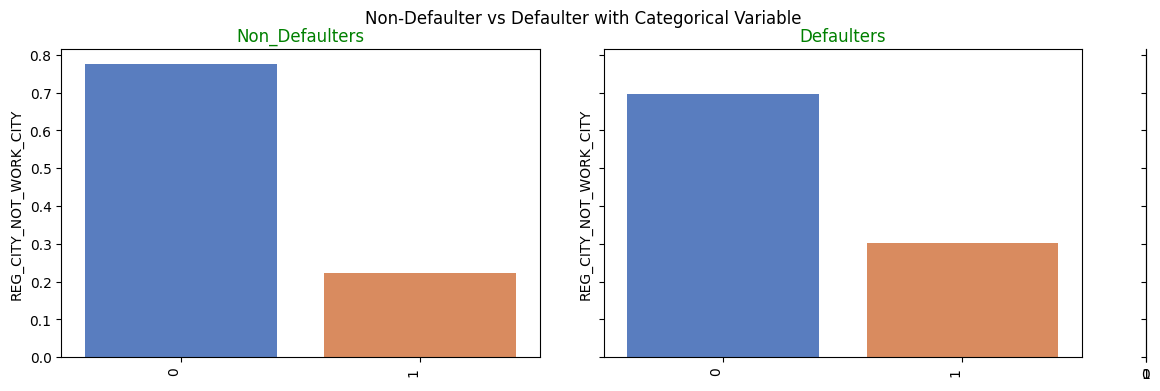

Plot for :  LIVE_CITY_NOT_WORK_CITY


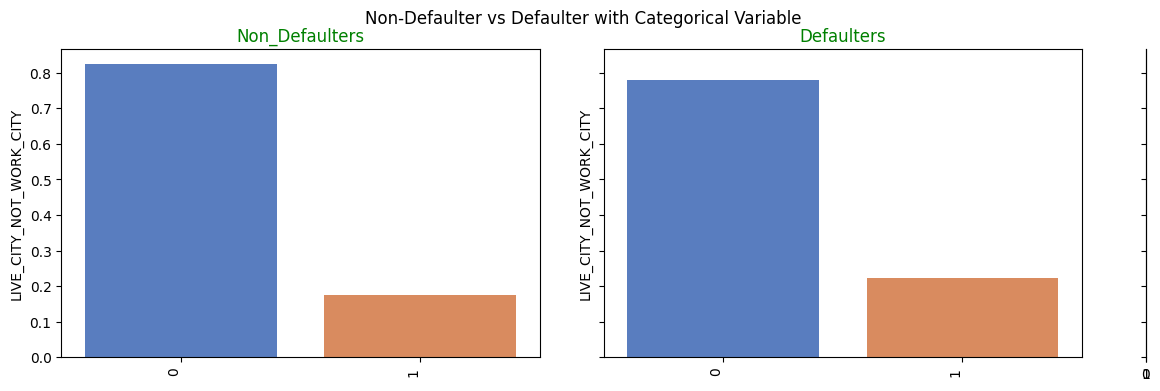

Plot for :  OWN_CAR


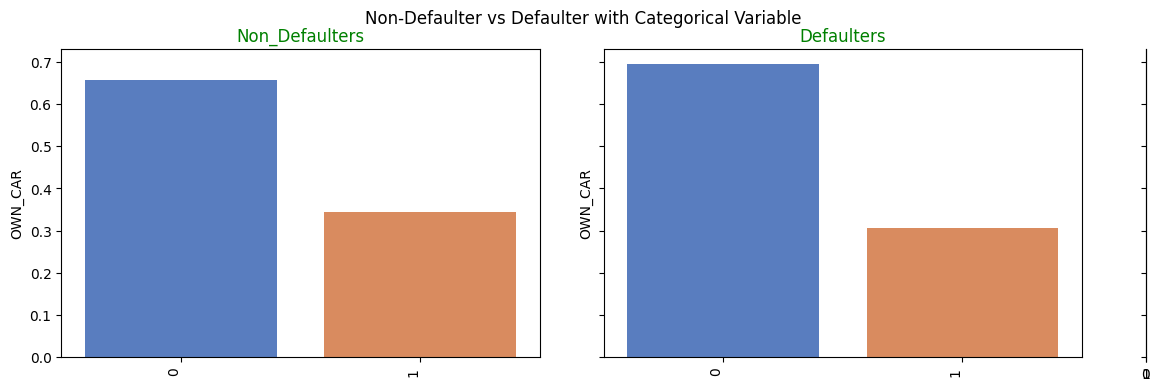

Plot for :  OWN_REALTY


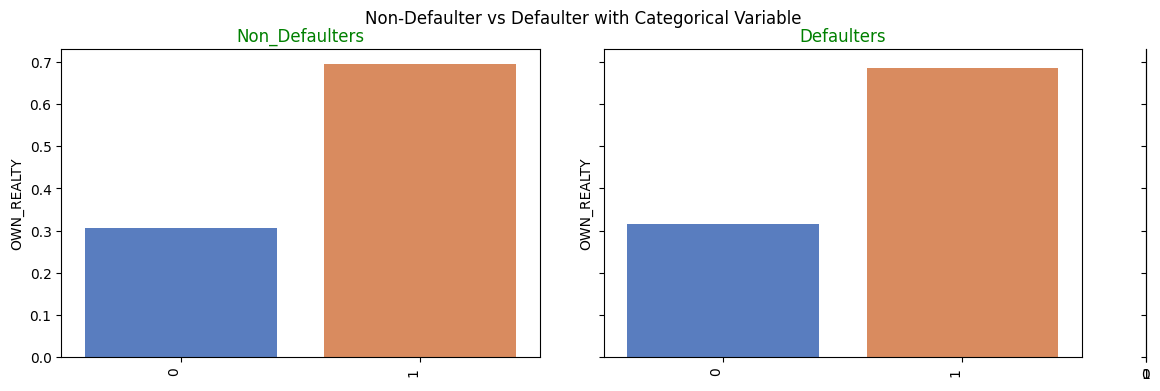

Plot for :  CODE_GENDER


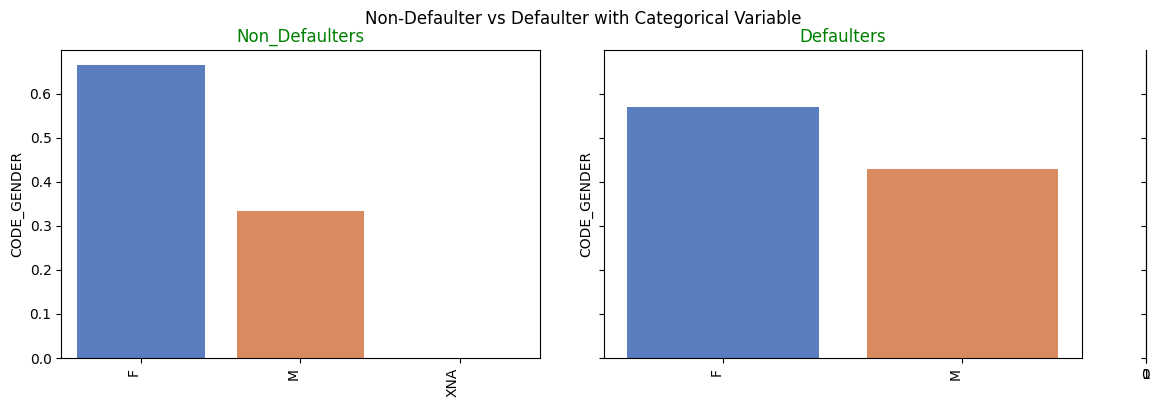

In [106]:
for item in new_app_cat:
  Tar_0=no_dif[item].value_counts(normalize=True)
  f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,gridspec_kw={'width_ratios':[1,1, 0.001]},figsize=(14,4))
  f.suptitle("Non-Defaulter vs Defaulter with Categorical Variable ")
  print("Plot for : ",item)
  chart1=sns.barplot(x=Tar_0.index, y=Tar_0, ax=ax1, palette="muted")
  chart1.set_xticklabels(chart1.get_xticklabels(minor=False), rotation=90, horizontalalignment='right')
  chart1.axes.set_title('Non_Defaulters',fontsize= 12,fontweight= 7,color='Green')
  Tar_1=dif[item].value_counts(normalize=True)
  chart2=sns.barplot(x=Tar_1.index, y=Tar_1,ax=ax2, palette="muted")
  chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90, horizontalalignment='right')
  chart2.axes.set_title('Defaulters',fontsize= 12,fontweight= 7,color='Green')
  plt.show()


Coclusion:

- No conclusion can be made based upon above analysis except that Females cover larger share in Both Non_Defaulter and Defaulter Class. ie. above 65% in Non_Defaulter and approx 58%  in Defaulters.
- Similary Reality Owners cover Approximately equal share in both Non_Defaulter and Defulter Class.

#### UNivariate analysis with Numerical type Variables.


Graph for :  CNT_CHILDREN


<ipython-input-107-b4ca51c9d38d>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot1=sns.distplot(no_dif[i], ax=ax1,hist = False)
<ipython-input-107-b4ca51c9d38d>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot2=sns.distplot(dif[i],ax=ax2,hist = False)


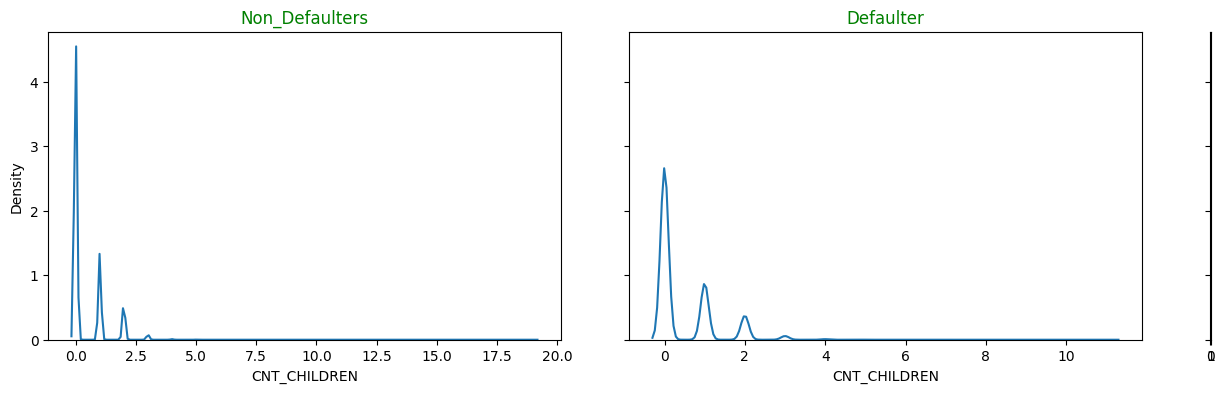

Graph for :  AMT_INCOME_TOTAL


<ipython-input-107-b4ca51c9d38d>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot1=sns.distplot(no_dif[i], ax=ax1,hist = False)
<ipython-input-107-b4ca51c9d38d>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot2=sns.distplot(dif[i],ax=ax2,hist = False)


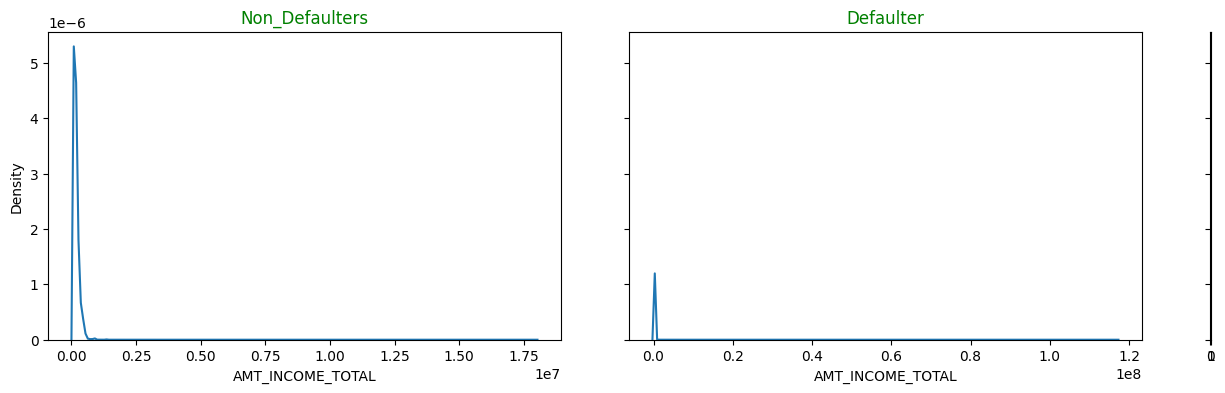

Graph for :  AMT_CREDIT


<ipython-input-107-b4ca51c9d38d>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot1=sns.distplot(no_dif[i], ax=ax1,hist = False)
<ipython-input-107-b4ca51c9d38d>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot2=sns.distplot(dif[i],ax=ax2,hist = False)


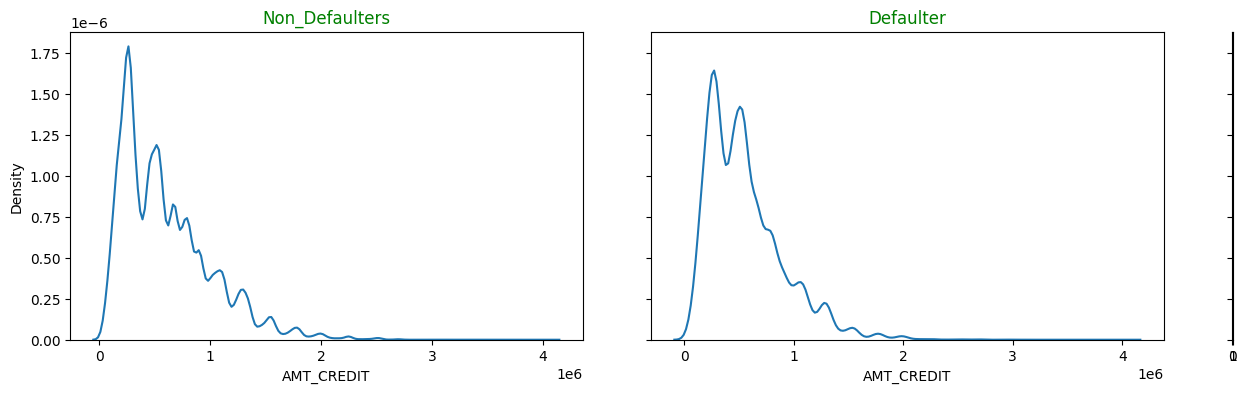

Graph for :  AMT_ANNUITY


<ipython-input-107-b4ca51c9d38d>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot1=sns.distplot(no_dif[i], ax=ax1,hist = False)
<ipython-input-107-b4ca51c9d38d>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot2=sns.distplot(dif[i],ax=ax2,hist = False)


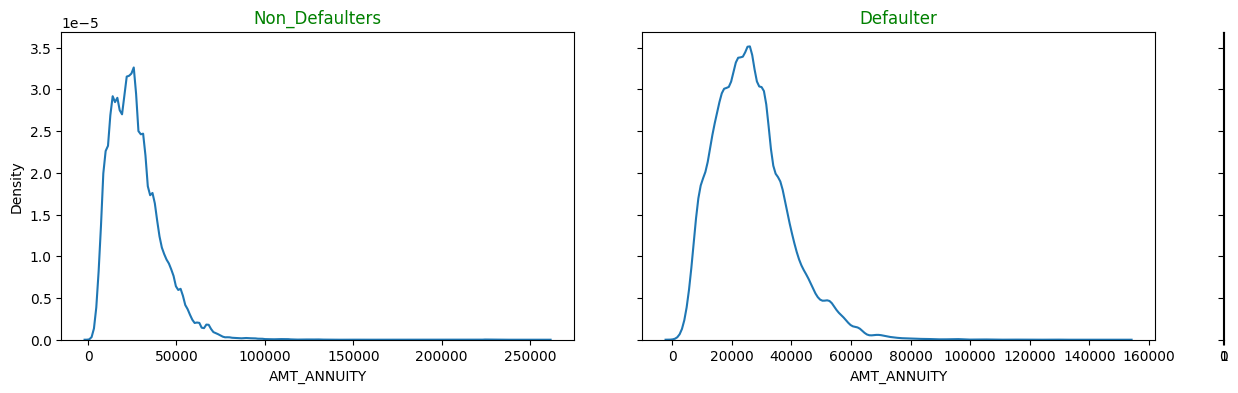

Graph for :  AMT_GOODS_PRICE


<ipython-input-107-b4ca51c9d38d>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot1=sns.distplot(no_dif[i], ax=ax1,hist = False)
<ipython-input-107-b4ca51c9d38d>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot2=sns.distplot(dif[i],ax=ax2,hist = False)


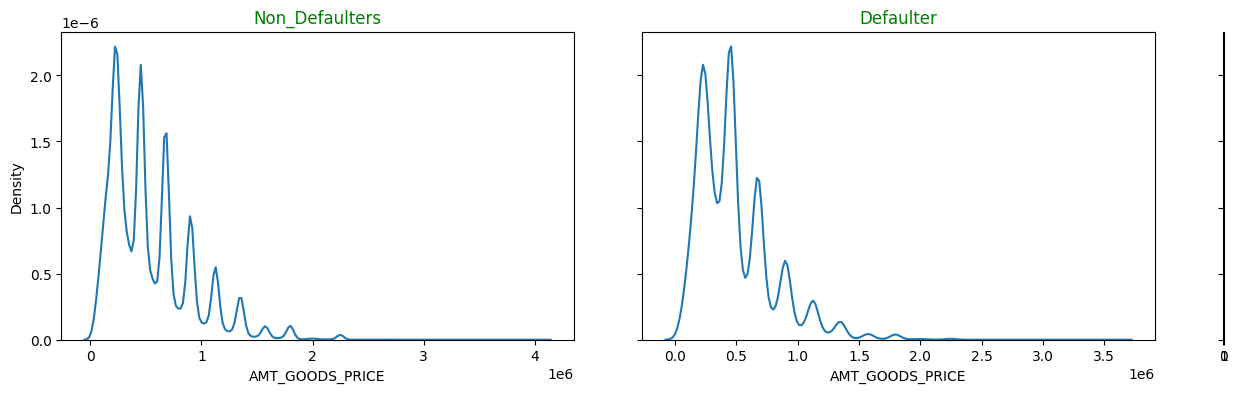

Graph for :  REGION_POPULATION_RELATIVE


<ipython-input-107-b4ca51c9d38d>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot1=sns.distplot(no_dif[i], ax=ax1,hist = False)
<ipython-input-107-b4ca51c9d38d>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot2=sns.distplot(dif[i],ax=ax2,hist = False)


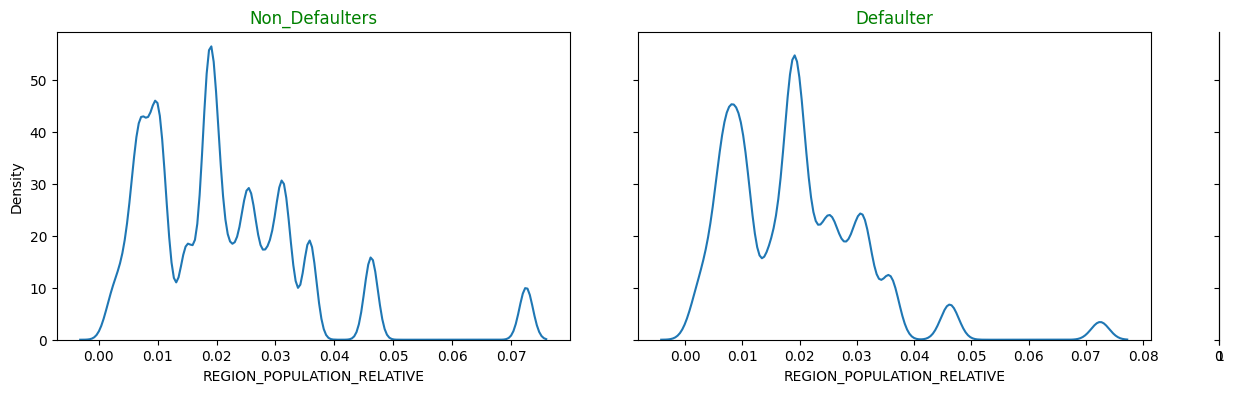

Graph for :  AGE_IN_YEARS


<ipython-input-107-b4ca51c9d38d>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot1=sns.distplot(no_dif[i], ax=ax1,hist = False)
<ipython-input-107-b4ca51c9d38d>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot2=sns.distplot(dif[i],ax=ax2,hist = False)


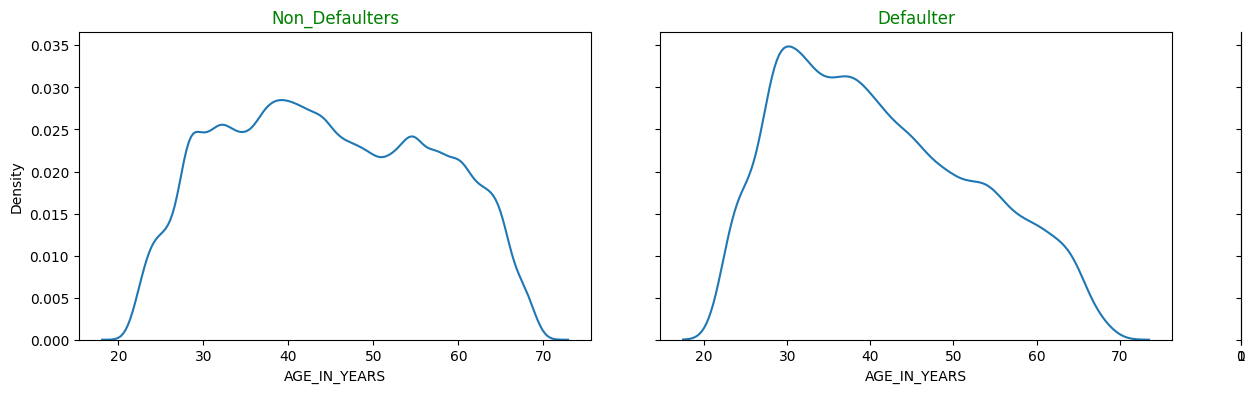

Graph for :  YEARS_OF_EMPLOYMENT


<ipython-input-107-b4ca51c9d38d>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot1=sns.distplot(no_dif[i], ax=ax1,hist = False)
<ipython-input-107-b4ca51c9d38d>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot2=sns.distplot(dif[i],ax=ax2,hist = False)


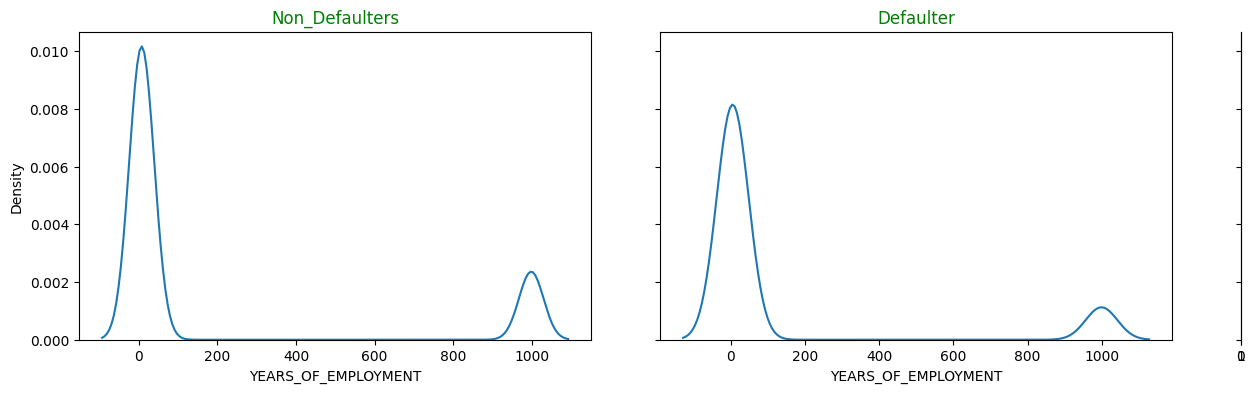

Graph for :  YEARS_OF_REGISTRATION


<ipython-input-107-b4ca51c9d38d>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot1=sns.distplot(no_dif[i], ax=ax1,hist = False)
<ipython-input-107-b4ca51c9d38d>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot2=sns.distplot(dif[i],ax=ax2,hist = False)


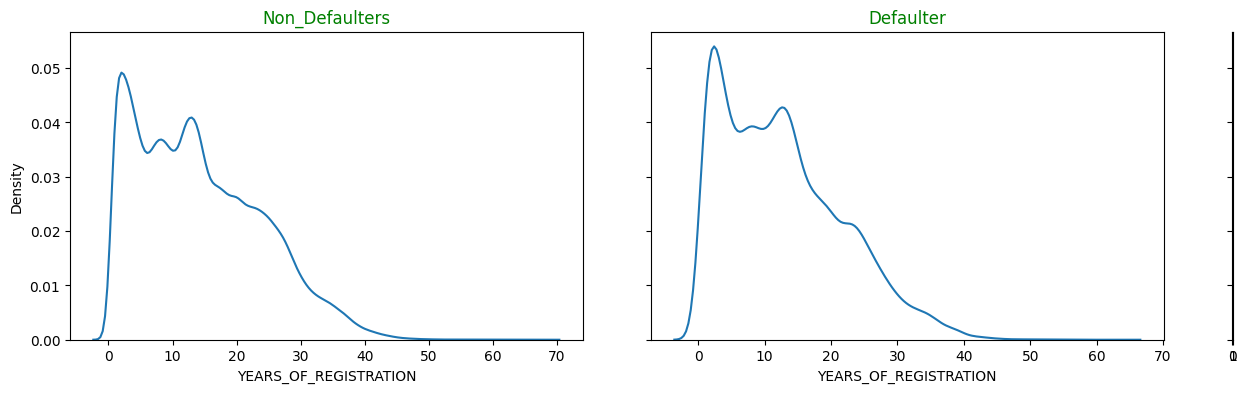

Graph for :  AGE_OF_ID_IN_YEARS


<ipython-input-107-b4ca51c9d38d>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot1=sns.distplot(no_dif[i], ax=ax1,hist = False)
<ipython-input-107-b4ca51c9d38d>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot2=sns.distplot(dif[i],ax=ax2,hist = False)


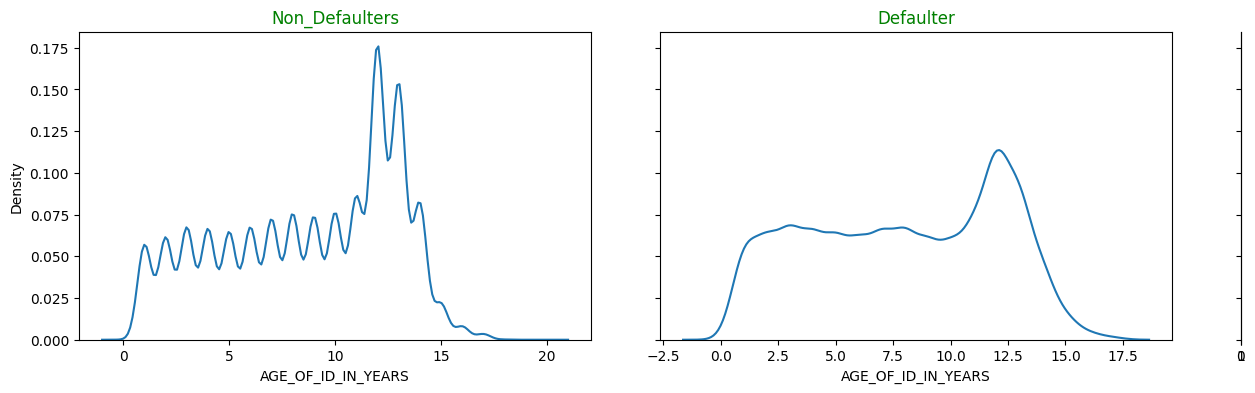

Graph for :  HOUR_APPR_PROCESS_START


<ipython-input-107-b4ca51c9d38d>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot1=sns.distplot(no_dif[i], ax=ax1,hist = False)
<ipython-input-107-b4ca51c9d38d>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot2=sns.distplot(dif[i],ax=ax2,hist = False)


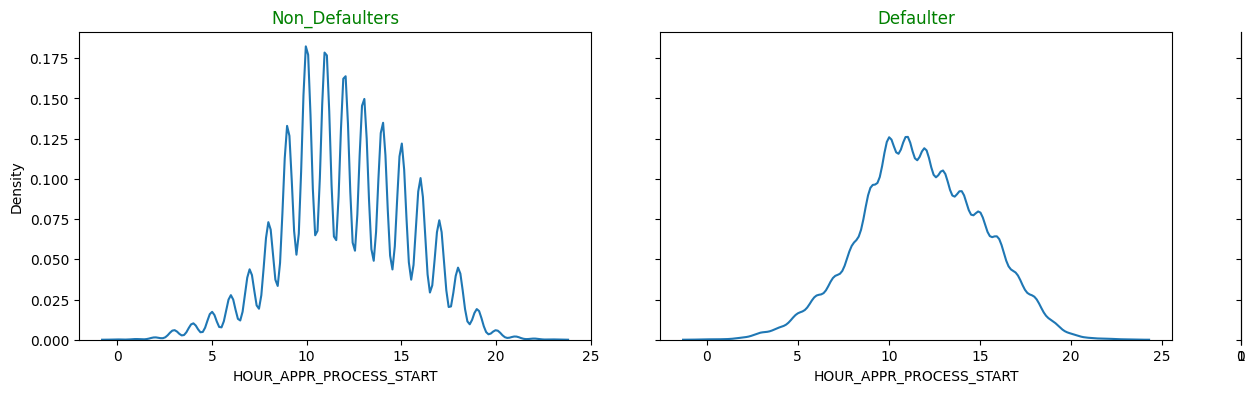

Graph for :  EXT_SOURCE_2


<ipython-input-107-b4ca51c9d38d>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot1=sns.distplot(no_dif[i], ax=ax1,hist = False)
<ipython-input-107-b4ca51c9d38d>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot2=sns.distplot(dif[i],ax=ax2,hist = False)


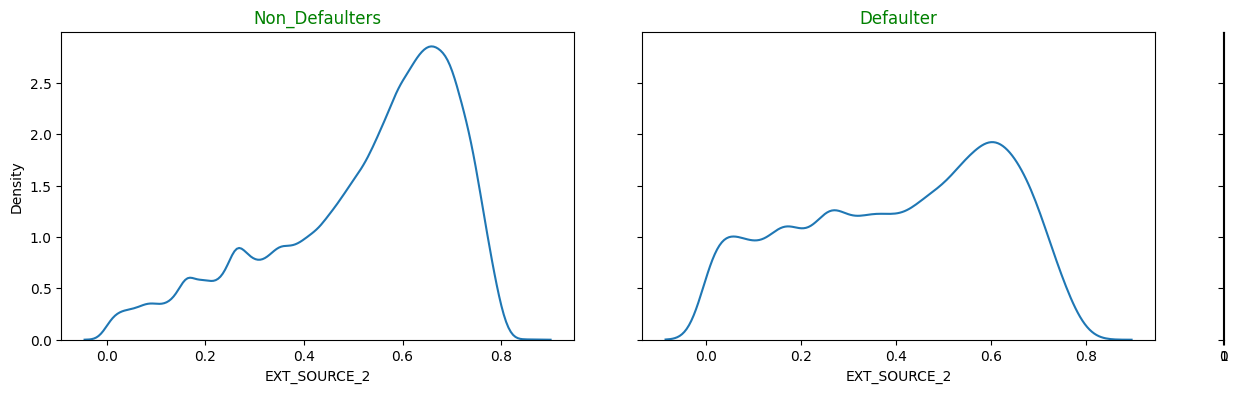

Graph for :  OBS_30_CNT_SOCIAL_CIRCLE


<ipython-input-107-b4ca51c9d38d>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot1=sns.distplot(no_dif[i], ax=ax1,hist = False)
<ipython-input-107-b4ca51c9d38d>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot2=sns.distplot(dif[i],ax=ax2,hist = False)


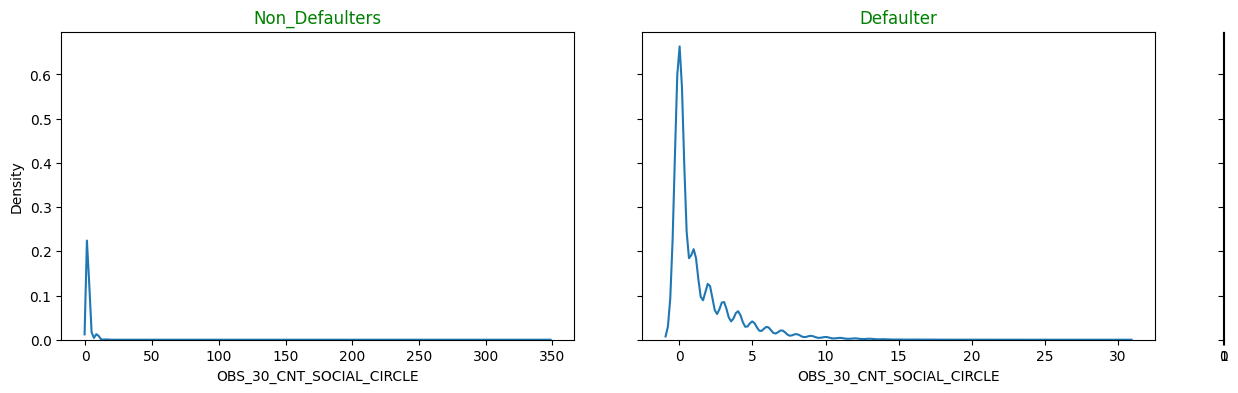

Graph for :  DEF_30_CNT_SOCIAL_CIRCLE


<ipython-input-107-b4ca51c9d38d>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot1=sns.distplot(no_dif[i], ax=ax1,hist = False)
<ipython-input-107-b4ca51c9d38d>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot2=sns.distplot(dif[i],ax=ax2,hist = False)


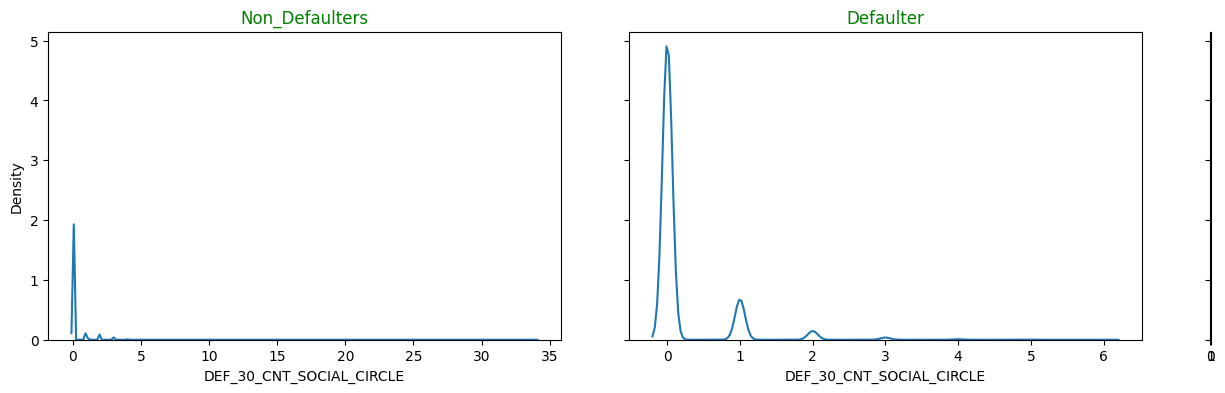

Graph for :  OBS_60_CNT_SOCIAL_CIRCLE


<ipython-input-107-b4ca51c9d38d>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot1=sns.distplot(no_dif[i], ax=ax1,hist = False)
<ipython-input-107-b4ca51c9d38d>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot2=sns.distplot(dif[i],ax=ax2,hist = False)


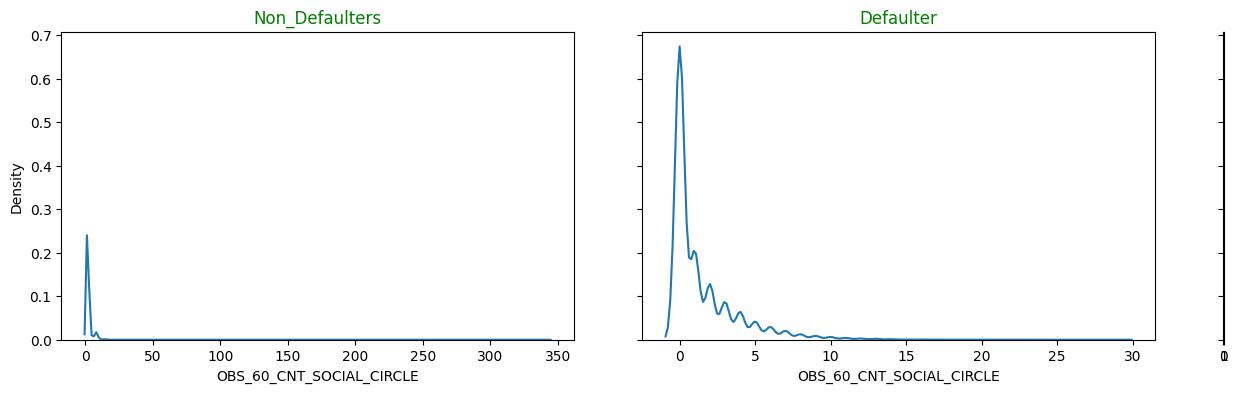

Graph for :  DEF_60_CNT_SOCIAL_CIRCLE


<ipython-input-107-b4ca51c9d38d>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot1=sns.distplot(no_dif[i], ax=ax1,hist = False)
<ipython-input-107-b4ca51c9d38d>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot2=sns.distplot(dif[i],ax=ax2,hist = False)


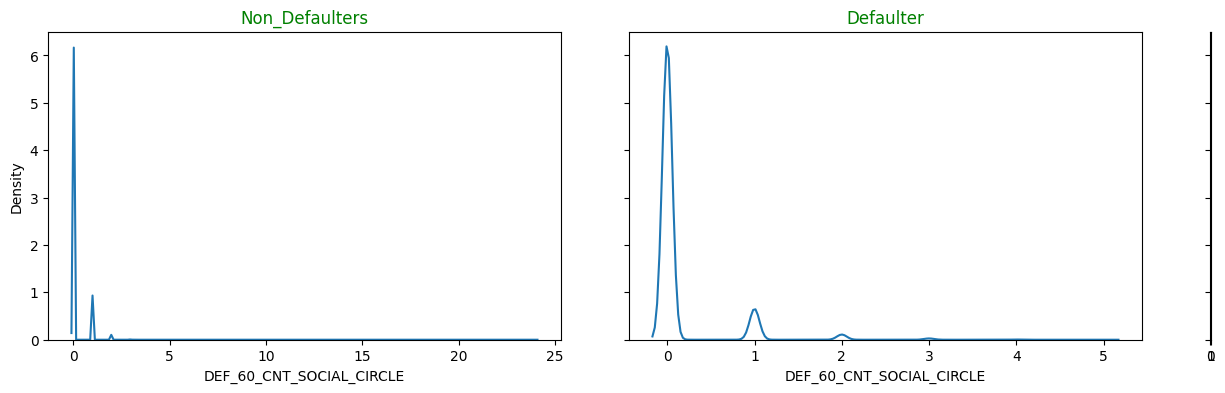

Graph for :  AMT_REQ_CREDIT_BUREAU_HOUR


<ipython-input-107-b4ca51c9d38d>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot1=sns.distplot(no_dif[i], ax=ax1,hist = False)
<ipython-input-107-b4ca51c9d38d>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot2=sns.distplot(dif[i],ax=ax2,hist = False)


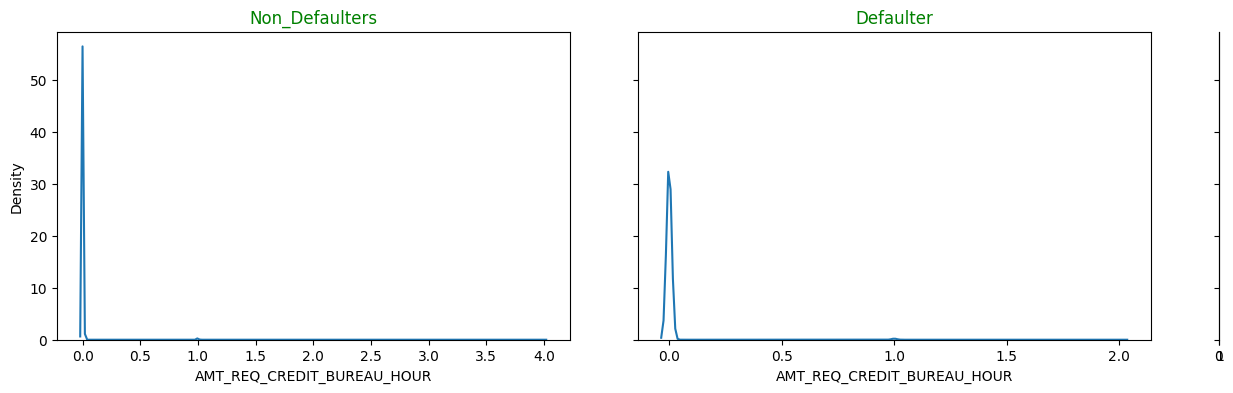

Graph for :  AMT_REQ_CREDIT_BUREAU_DAY


<ipython-input-107-b4ca51c9d38d>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot1=sns.distplot(no_dif[i], ax=ax1,hist = False)
<ipython-input-107-b4ca51c9d38d>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot2=sns.distplot(dif[i],ax=ax2,hist = False)


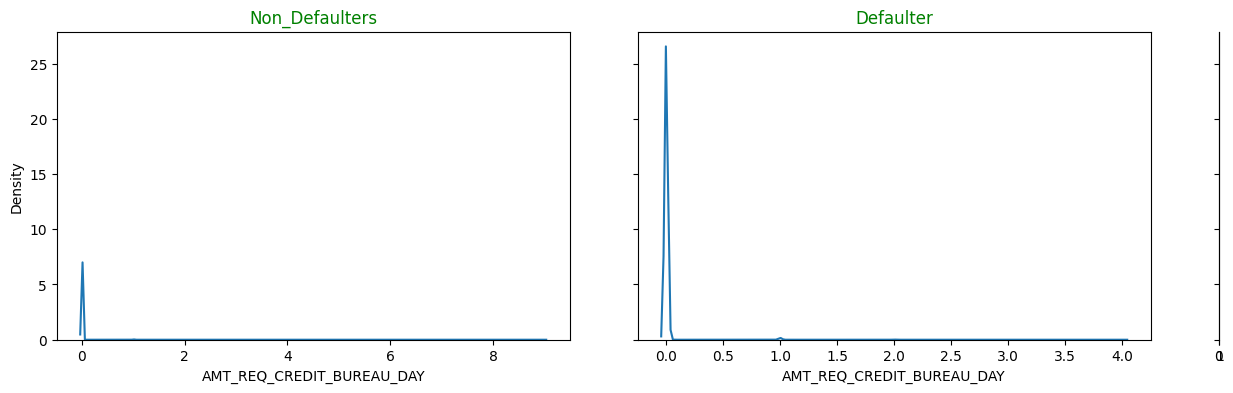

Graph for :  AMT_REQ_CREDIT_BUREAU_WEEK


<ipython-input-107-b4ca51c9d38d>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot1=sns.distplot(no_dif[i], ax=ax1,hist = False)
<ipython-input-107-b4ca51c9d38d>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot2=sns.distplot(dif[i],ax=ax2,hist = False)


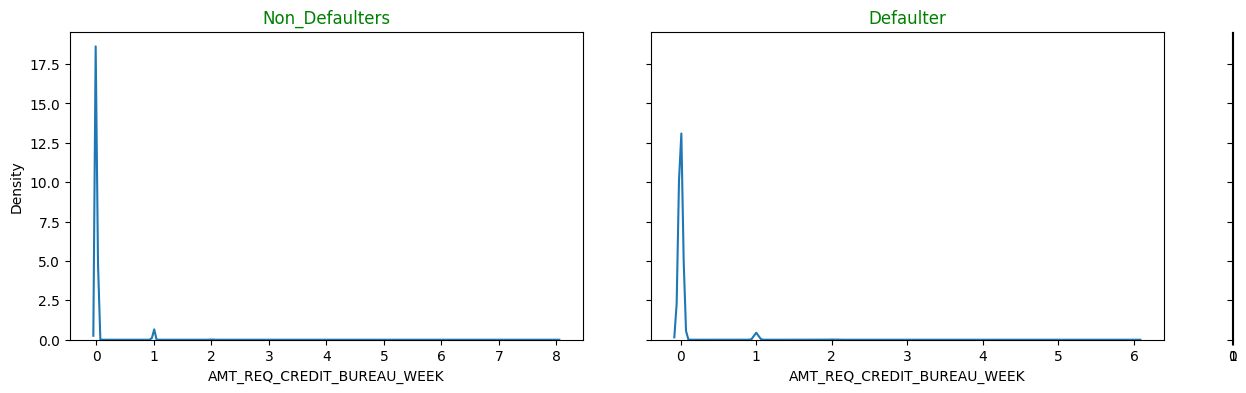

Graph for :  AMT_REQ_CREDIT_BUREAU_MON


<ipython-input-107-b4ca51c9d38d>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot1=sns.distplot(no_dif[i], ax=ax1,hist = False)
<ipython-input-107-b4ca51c9d38d>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot2=sns.distplot(dif[i],ax=ax2,hist = False)


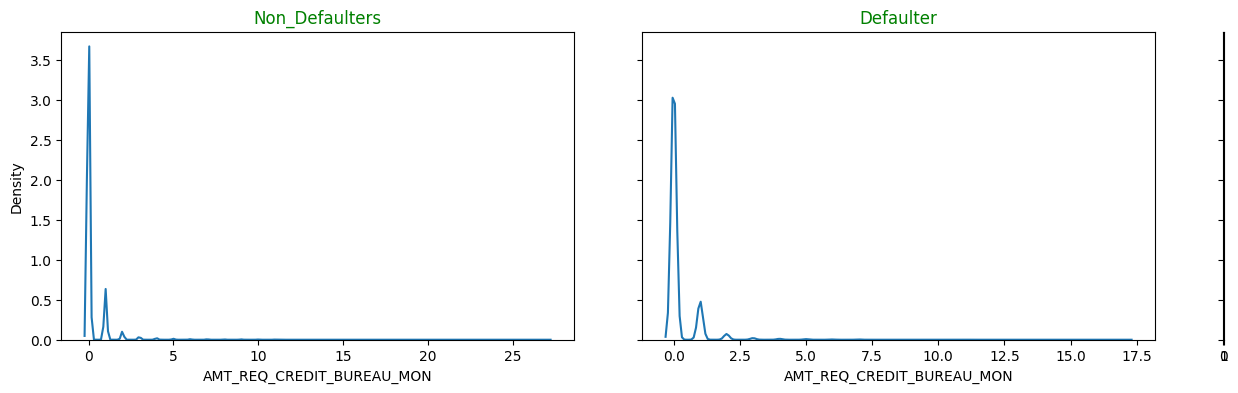

Graph for :  AMT_REQ_CREDIT_BUREAU_QRT


<ipython-input-107-b4ca51c9d38d>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot1=sns.distplot(no_dif[i], ax=ax1,hist = False)
<ipython-input-107-b4ca51c9d38d>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot2=sns.distplot(dif[i],ax=ax2,hist = False)


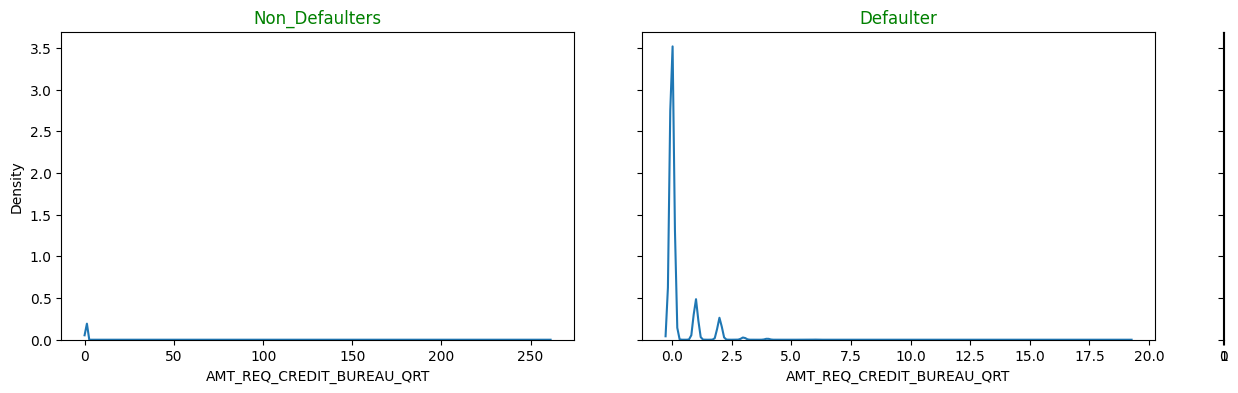

Graph for :  AMT_REQ_CREDIT_BUREAU_YEAR


<ipython-input-107-b4ca51c9d38d>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot1=sns.distplot(no_dif[i], ax=ax1,hist = False)
<ipython-input-107-b4ca51c9d38d>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot2=sns.distplot(dif[i],ax=ax2,hist = False)


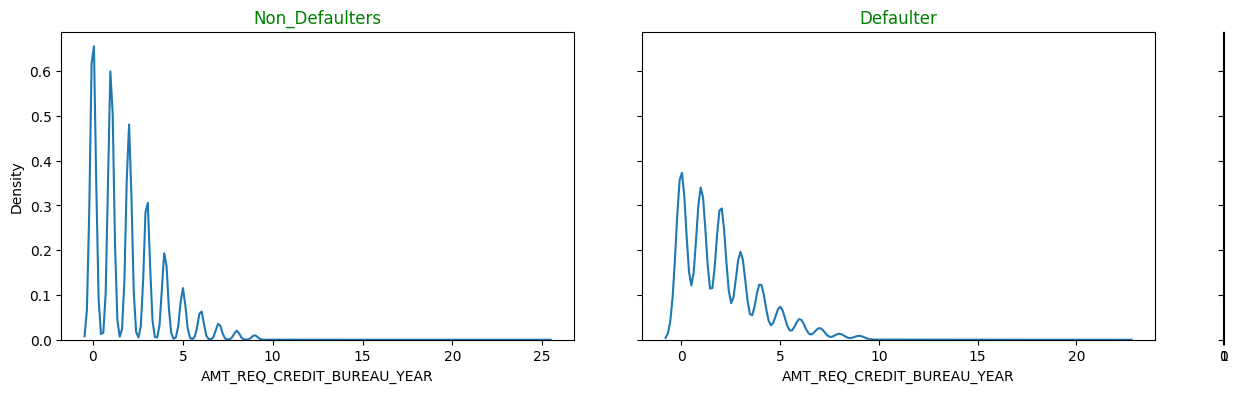

In [107]:

#Numeric Variables:  ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'AGE_IN_YEARS', 'YEARS_OF_EMPLOYMENT', 'YEARS_OF_REGISTRATION', 'AGE_OF_ID_IN_YEARS', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


for i in new_app_num:
    Tar_0=no_dif[i].value_counts()
    f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,gridspec_kw={'width_ratios':[1,1, 0.001]},figsize=(15,4))
    print("Graph for : ",i)
    plot1=sns.distplot(no_dif[i], ax=ax1,hist = False)


    plot1.axes.set_title('Non_Defaulters',fontsize= 12,fontweight= 7,color='Green')
    Tar_1=dif[i].value_counts()
    plot2=sns.distplot(dif[i],ax=ax2,hist = False)

    plot2.axes.set_title('Defaulter',fontsize= 12,fontweight= 7,color='Green')
    plt.show()

**Conclusion:**

1. CNT_CHILDREN seems , it has no correlation of a person being defaulter. as heigher share is of people havaing 0 children/No children.
2. AMT_CREDIT is lower for Defaulter , which shows lesser amount was lended to defaulters.
3. AMT_ANNUITY is heigher for Defaulters, which may be a sign that means , heigher Annuity/Installment amound lead person to be a defaulter.
4. AMT_GOODS_PRICE looks similar in distribution, so we cannot conclude anything from it.
5. Nothing can be inferred from REGION POPULATION RELATIVE as well.
6. AGE_IN_YEARS shows that maximum population of defaulter applicant lie in age bracket of 25-40 years.
7. Though their is not much difference in year of employment of Non_defaulters and defaulters, but as we can see Defaulters are more rcenetly employed.(Years of employed has incorrect data also)
8. The Credit score obtained from EXT_SOURCE_2 is significantly lower for Defaulters in comparison to Non_Defaulters
9. OBS_30_CNT_SOCIAL_CIRCLE clearly shows that client's social surroundings observable 30 DPD is heigher for Defaulters.
10. OBS_60_CNT_SOCIAL_CIRCLE clearly shows that client's social surroundings observable 60 DPD is heigher for Defaulters.
11. similarly for DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE  defaulted on 30 DPD and 60DPD are heigher foe Defaulters.
12. Credit Bureau ratings are also lesser for defaulters, this implies they are parallely looking for loan from other companies.

Graph for :  AGE_GROUP


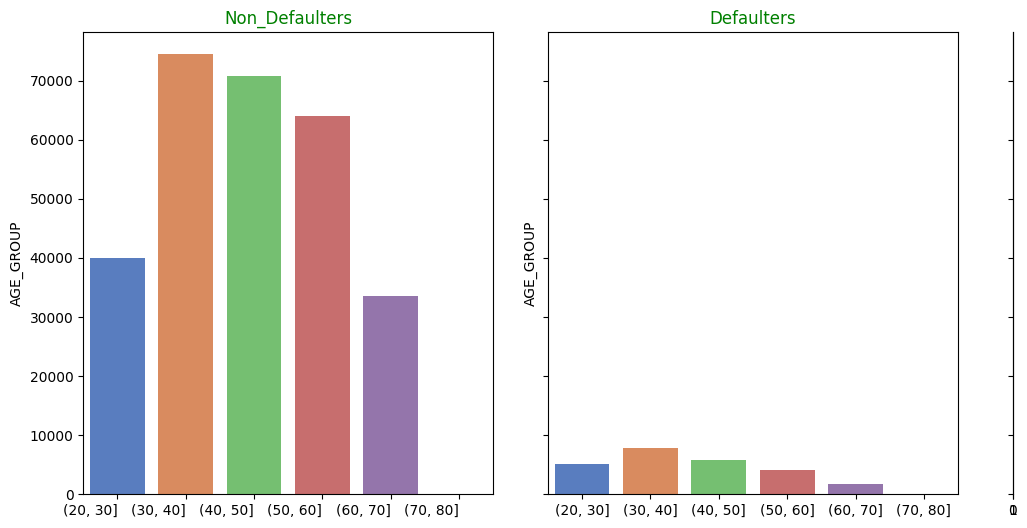

Graph for :  INCOME_GROUP


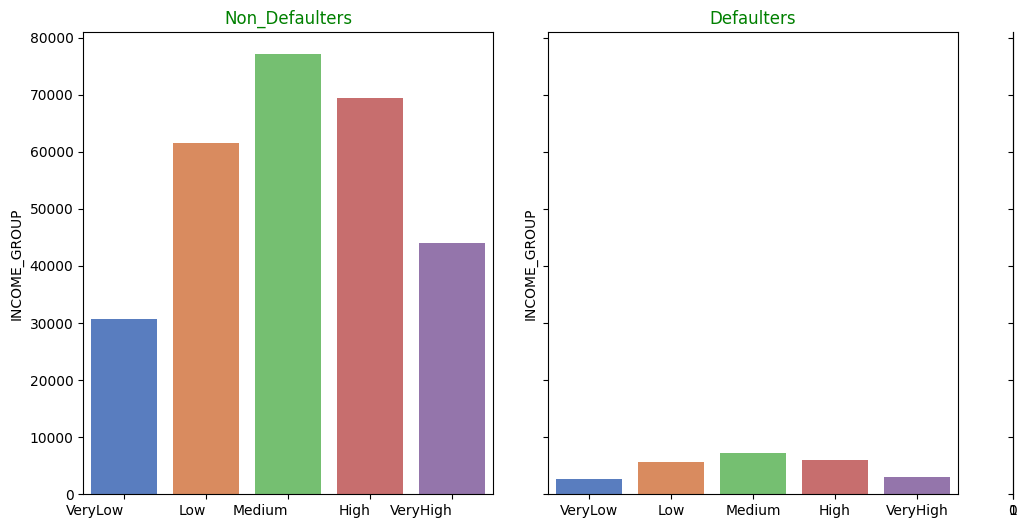

In [108]:
# Checking with Binned Data of Age_group and income_group

bin_col=["AGE_GROUP", "INCOME_GROUP"]
for i in bin_col:

    Tar_0=no_dif[i].value_counts()
    f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,gridspec_kw={'width_ratios':[1,1, 0.001]},figsize=(12,6))
    print("Graph for : ",i)
    plot1=sns.barplot(x=Tar_0.index, y=Tar_0, ax=ax1, palette="muted")
    plot1.set_xticklabels(plot1.get_xticklabels(), horizontalalignment='right')
    plot1.axes.set_title('Non_Defaulters',fontsize= 12,fontweight= 7,color='Green')
    Tar_1=dif[i].value_counts()
    plot2=sns.barplot(x=Tar_1.index, y=Tar_1,ax=ax2, palette="muted")
    plot2.set_xticklabels(plot2.get_xticklabels(), horizontalalignment='center')
    plot2.axes.set_title('Defaulters',fontsize= 12,fontweight= 7,color='Green')
    plt.show()

**Conclusion:**

1. Here also we can see Age group 30-40 years is heigher in defaulting payments.
2. A Large share of Defaulters is hold by Low-High Income Grade People.

### Bivariate Analysis


<Axes: title={'center': 'INCOME_GROUP vs AMT_CREDITED for Defaulters'}, xlabel='INCOME_GROUP', ylabel='AMT_CREDIT'>

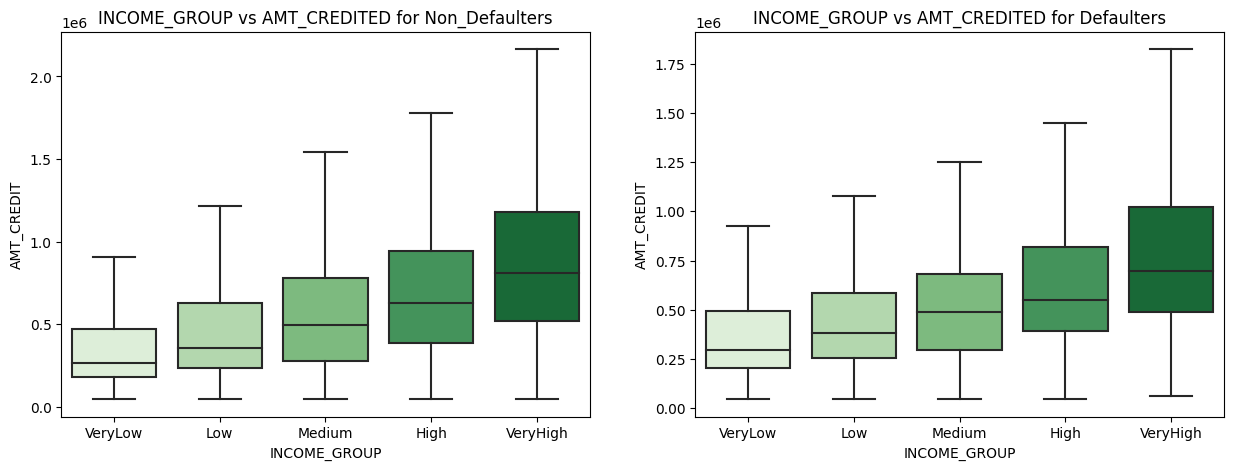

In [109]:
# Checking with INCOME_GROUP , AMT_CREDIT vs Target

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("INCOME_GROUP vs AMT_CREDITED for Non_Defaulters")
sns.boxplot(x='INCOME_GROUP',y='AMT_CREDIT',data=no_dif,showfliers=False,palette='Greens')

plt.subplot(1,2,2)
plt.title("INCOME_GROUP vs AMT_CREDITED for Defaulters")
sns.boxplot(x='INCOME_GROUP',y='AMT_CREDIT',data=dif,showfliers=False,palette='Greens')

we can see a large amount is credited to very_high Income Group in both graphs, let's check it's impact on Target variable.

<Axes: title={'center': 'INCOME vs Target'}, xlabel='INCOME_GROUP', ylabel='count'>

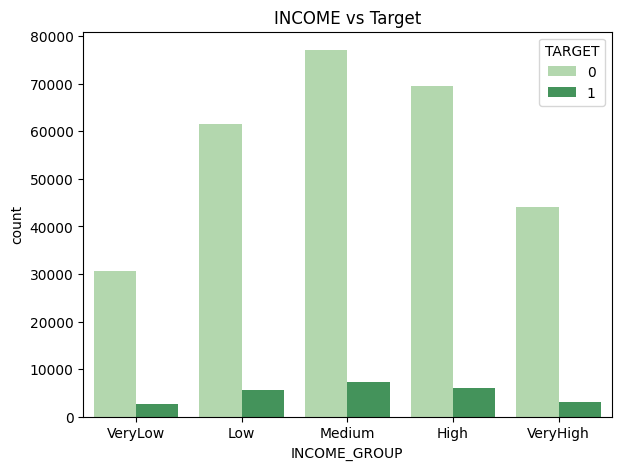

In [110]:
# checking very_high income group with Target variable as whole.

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("INCOME vs Target")
sns.countplot(x='INCOME_GROUP',hue='TARGET',palette='Greens',data=new_app)

In [111]:
# checking using Pivot Table

result=pd.pivot_table(data=new_app, index='INCOME_GROUP',columns='TARGET',values='AMT_CREDIT', aggfunc="mean")
round(result,2)

TARGET                0          1
INCOME_GROUP                      
VeryLow       347868.46  373460.40
Low           456525.23  451343.70
Medium        568861.72  542580.16
High          699628.82  643297.93
VeryHigh      890186.33  786021.83

<Axes: xlabel='TARGET', ylabel='INCOME_GROUP'>

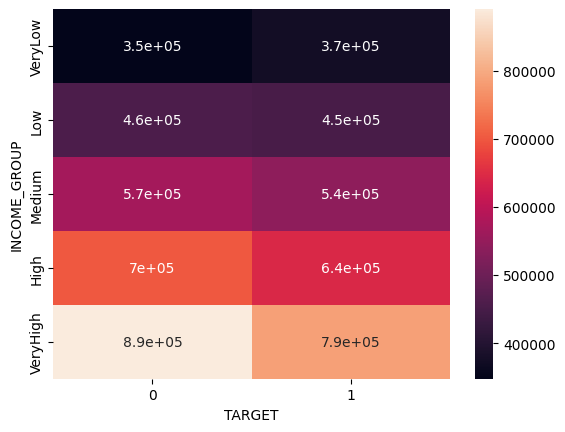

In [112]:
sns.heatmap(result,annot=True)

**Conclusion:**

1. As it is observed from above two graphs that highest number of loans were given to Middle Income Group but the defaulters are larger in Very_high Income Group, and as a very high amout was lended to this group, so Defaulting by this group will lead to higher losses.


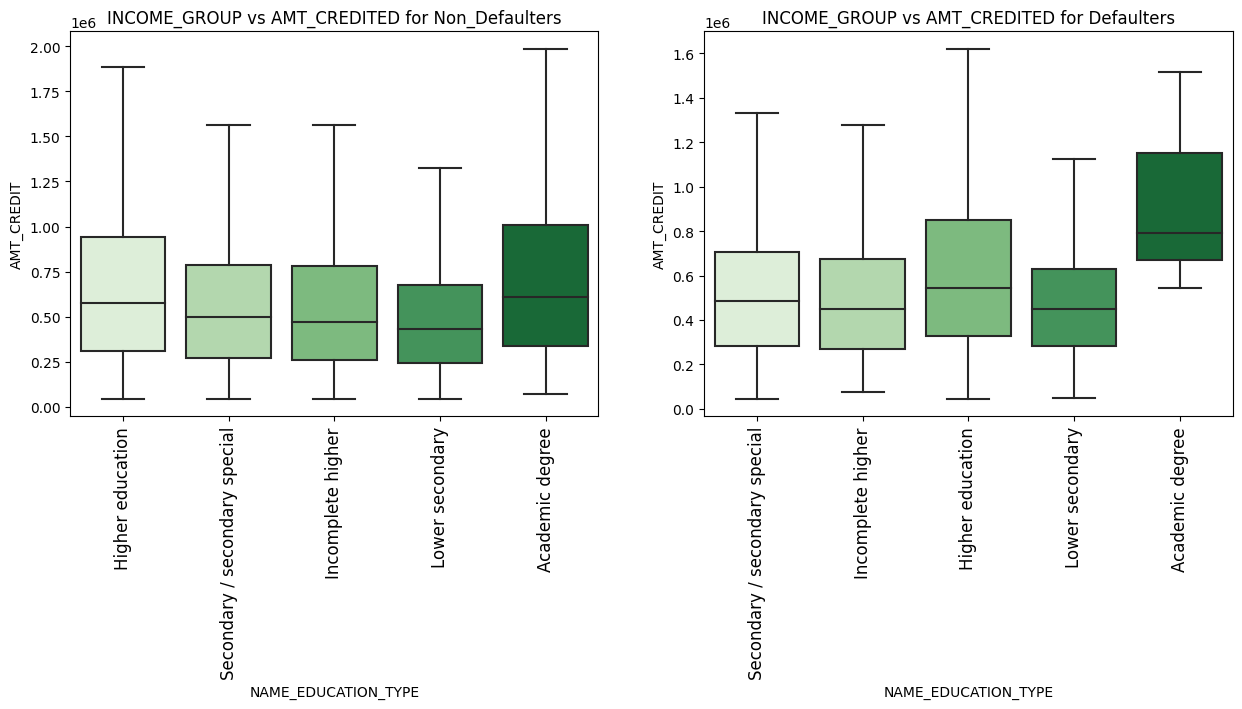

In [113]:
# Checking with EDUCATION_TYPE , AMT_CREDIT vs Target

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("INCOME_GROUP vs AMT_CREDITED for Non_Defaulters")
sns.boxplot(x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',data=no_dif,showfliers=False,palette='Greens')
plt.xticks(fontsize=12,fontweight=3,rotation=90)

plt.subplot(1,2,2)
plt.title("INCOME_GROUP vs AMT_CREDITED for Defaulters")
sns.boxplot(x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',data=dif,showfliers=False,palette='Greens')
plt.xticks(fontsize=12,fontweight=3,rotation=90)
plt.show()

In [114]:
# checking using Pivot Table

result=pd.pivot_table(data=new_app, index='NAME_EDUCATION_TYPE',columns='TARGET',values='AMT_CREDIT', aggfunc="mean")
round(result,2)

TARGET                                 0          1
NAME_EDUCATION_TYPE                                
Academic degree                719290.84  950245.50
Higher education               692438.30  645981.01
Incomplete higher              569696.52  534740.99
Lower secondary                490749.54  481589.53
Secondary / secondary special  574033.65  542263.18

In [115]:
print('ADEMIC DEGREE',new_app[new_app['NAME_EDUCATION_TYPE']=='Academic degree'].value_counts().sum())
print('HIGHER EDUCATION',new_app[new_app['NAME_EDUCATION_TYPE']=='Higher education'].value_counts().sum())
print('INCOMPLETE HIGHER',new_app[new_app['NAME_EDUCATION_TYPE']=='Incomplete higher'].value_counts().sum())
print('LOWER SECONDARY',new_app[new_app['NAME_EDUCATION_TYPE']=='Lower secondary'].value_counts().sum())
print('SECONADARY / Secondary Special',new_app[new_app['NAME_EDUCATION_TYPE']=='Secondary / secondary special'].value_counts().sum())

ADEMIC DEGREE 95
HIGHER EDUCATION 47514
INCOMPLETE HIGHER 6553
LOWER SECONDARY 1584
SECONADARY / Secondary Special 125333


**CONCLUSION:**

Though Highest defaulters are applicants holding ACADEMIC DEGREE but since their share in dataset is negligible in comparison to others, therefore their Impact is considered negligible.


In [116]:
# Realtion between AMT_CREDIT ,GENDER_CODE, and INCOME_TYPE for Non_Defaulters and Defaulters
print(' INCOME_TYPE, CODE_GENDER, AMT_CREDIT for NON_DEFAULTERS')
print('\n')
result1=pd.pivot_table(data=no_dif, index='NAME_INCOME_TYPE',columns='CODE_GENDER',values='AMT_CREDIT', aggfunc="mean")
print(round(result1,2))
print('\n\n')

print(' INCOME_TYPE, CODE_GENDER, AMT_CREDIT for DEFAULTERS')
print('\n')
result2=pd.pivot_table(data=dif, index='NAME_INCOME_TYPE',columns='CODE_GENDER',values='AMT_CREDIT', aggfunc="mean")
print(round(result2,2))

 INCOME_TYPE, CODE_GENDER, AMT_CREDIT for NON_DEFAULTERS


CODE_GENDER                    F           M       XNA
NAME_INCOME_TYPE                                      
Businessman           1125000.00  1272857.14       NaN
Commercial associate   668843.57   685304.42  540000.0
Maternity leave        562500.00   765000.00       NaN
Pensioner              535162.15   571540.01       NaN
State servant          665131.93   695356.72       NaN
Student                372556.29   598752.82       NaN
Unemployed             787909.09  1045500.00       NaN
Working                577845.62   587183.08  352500.0



 INCOME_TYPE, CODE_GENDER, AMT_CREDIT for DEFAULTERS


CODE_GENDER                   F          M
NAME_INCOME_TYPE                          
Commercial associate  613418.01  599681.60
Maternity leave       929250.00        NaN
Pensioner             558498.13  556644.76
State servant         614061.72  616406.75
Unemployed            653250.00  546750.00
Working               537034.98 

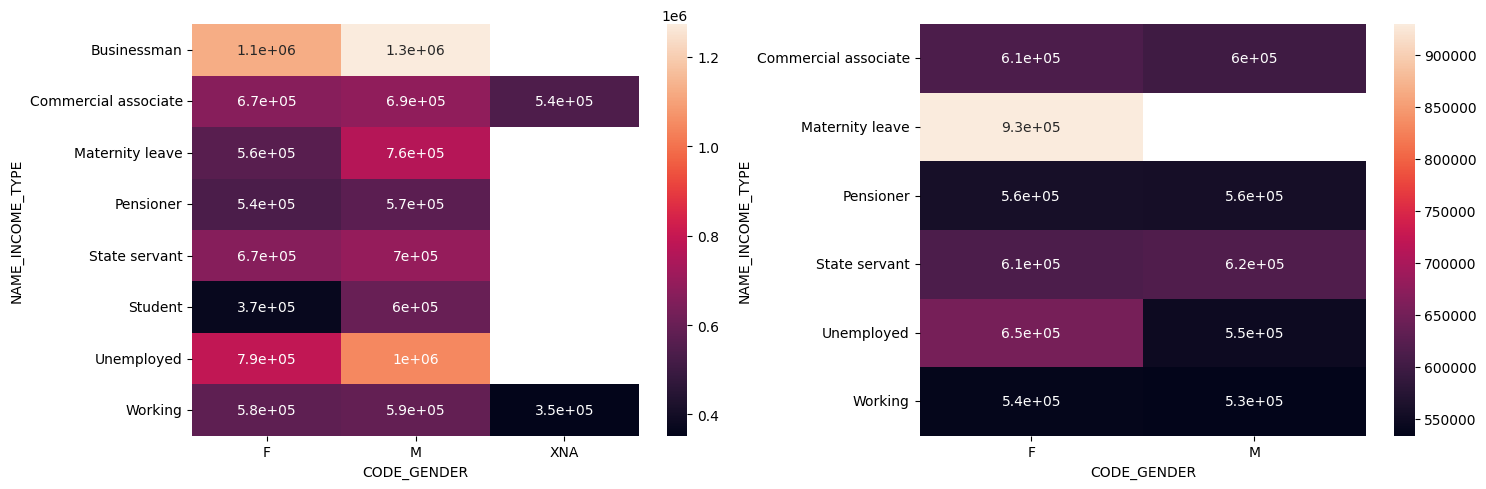

In [117]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.heatmap(result1,annot=True)
plt.subplot(1,2,2)
sns.heatmap(result2,annot=True)

plt.tight_layout()
plt.show()

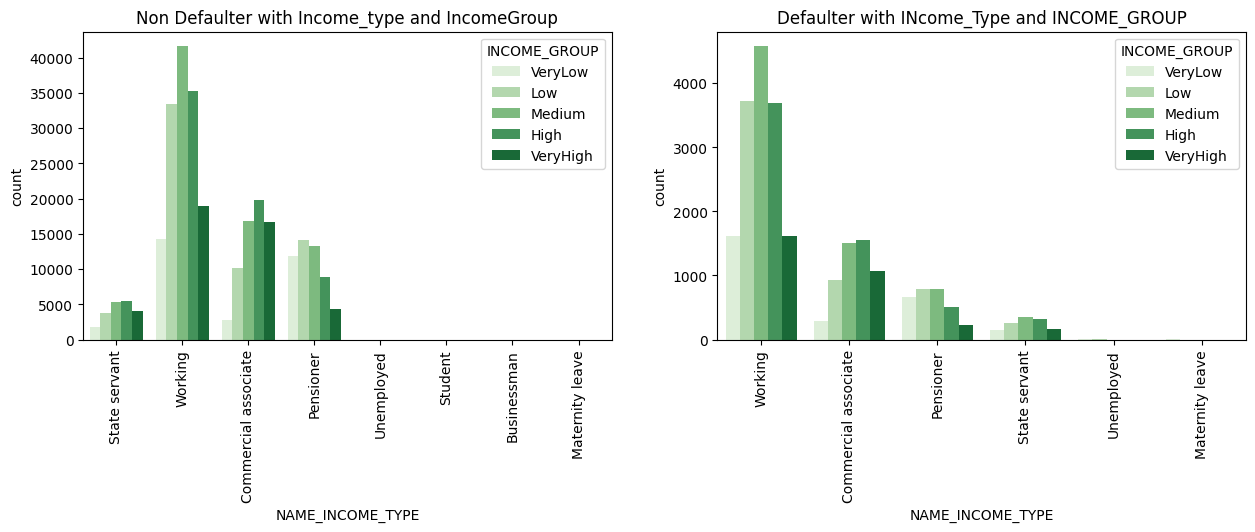

In [118]:
# IncomeType with Income Group as Non Defaulter and Defaulter

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('Non Defaulter with Income_type and IncomeGroup')
sns.countplot(data=no_dif,x='NAME_INCOME_TYPE',hue='INCOME_GROUP',palette='Greens')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title('Defaulter with INcome_Type and INCOME_GROUP')
sns.countplot(data=dif,x="NAME_INCOME_TYPE",hue='INCOME_GROUP',palette='Greens')
plt.xticks(rotation=90)
plt.show()

- Working class + Medium Income Group has higher number of Defaulters.

MEAN AMOUNT CREDIT TO MALE FEMALE OF DIFFERENT INCOME_TYPE- Non DEfaulters
CODE_GENDER                    F           M       XNA
NAME_INCOME_TYPE                                      
Businessman           1125000.00  1272857.14       NaN
Commercial associate   668843.57   685304.42  540000.0
Maternity leave        562500.00   765000.00       NaN
Pensioner              535162.15   571540.01       NaN
State servant          665131.93   695356.72       NaN
Student                372556.29   598752.82       NaN
Unemployed             787909.09  1045500.00       NaN
Working                577845.62   587183.08  352500.0



MEAN AMOUNT CREDIT TO MALE FEMALE OF DIFFERENT INCOME_TYPE- Defaulters
CODE_GENDER                   F          M
NAME_INCOME_TYPE                          
Commercial associate  613418.01  599681.60
Maternity leave       929250.00        NaN
Pensioner             558498.13  556644.76
State servant         614061.72  616406.75
Unemployed            653250.00  546750.00


<Axes: xlabel='CODE_GENDER', ylabel='NAME_INCOME_TYPE'>

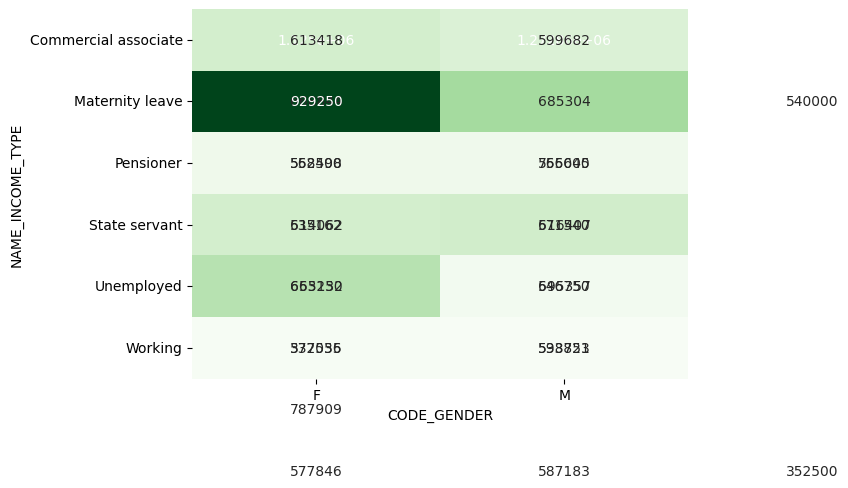

In [119]:
# Analysing absolute values using Pivote Table
print('MEAN AMOUNT CREDIT TO MALE FEMALE OF DIFFERENT INCOME_TYPE- Non DEfaulters')
result=pd.pivot_table(data=no_dif,index='NAME_INCOME_TYPE',columns='CODE_GENDER',values='AMT_CREDIT',aggfunc='mean')
print(round(result,2))
sns.heatmap(result,cmap='Greens',annot=True,fmt='g',cbar=False)
print('\n\n')
print('MEAN AMOUNT CREDIT TO MALE FEMALE OF DIFFERENT INCOME_TYPE- Defaulters')
result=pd.pivot_table(data=dif,index='NAME_INCOME_TYPE',columns='CODE_GENDER',values='AMT_CREDIT',aggfunc='mean')
print(round(result,2))
sns.heatmap(result,cmap='Greens',annot=True,fmt='g',cbar=False)

- This concluded that Females on Maternity Leave and Males working as State Servant are more likely to be Defaulters.

**Conclusion:**

It can be Inferred from above tables that Females on Maternity leave and Unemployed Male-Female both are more likely to be a Defaulter.

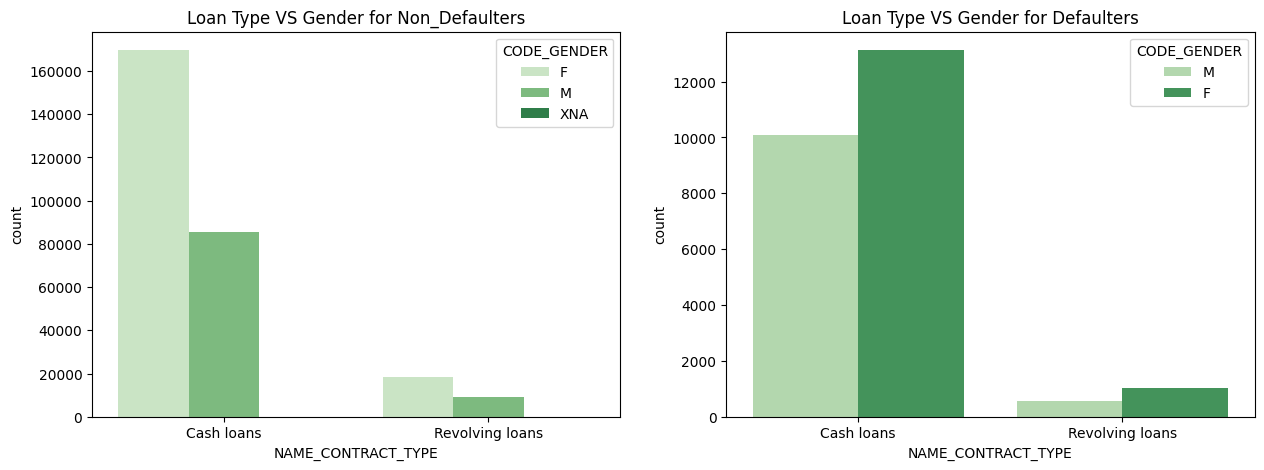

In [120]:
# Checking Defaulted Type of loan with reference to CODE_GENDER

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Loan Type VS Gender for Non_Defaulters')
sns.countplot(data=no_dif,x='NAME_CONTRACT_TYPE',hue='CODE_GENDER',palette='Greens')

plt.subplot(1,2,2)
plt.title('Loan Type VS Gender for Defaulters')
sns.countplot(data=dif,x='NAME_CONTRACT_TYPE',hue='CODE_GENDER',palette='Greens')
plt.show()

**Conclusion:**

- It can be observed from above that MAles are more likely to Default on lOan Repayment than Females.
- From previous analysis we observed that Female have higher share as loan applicants.

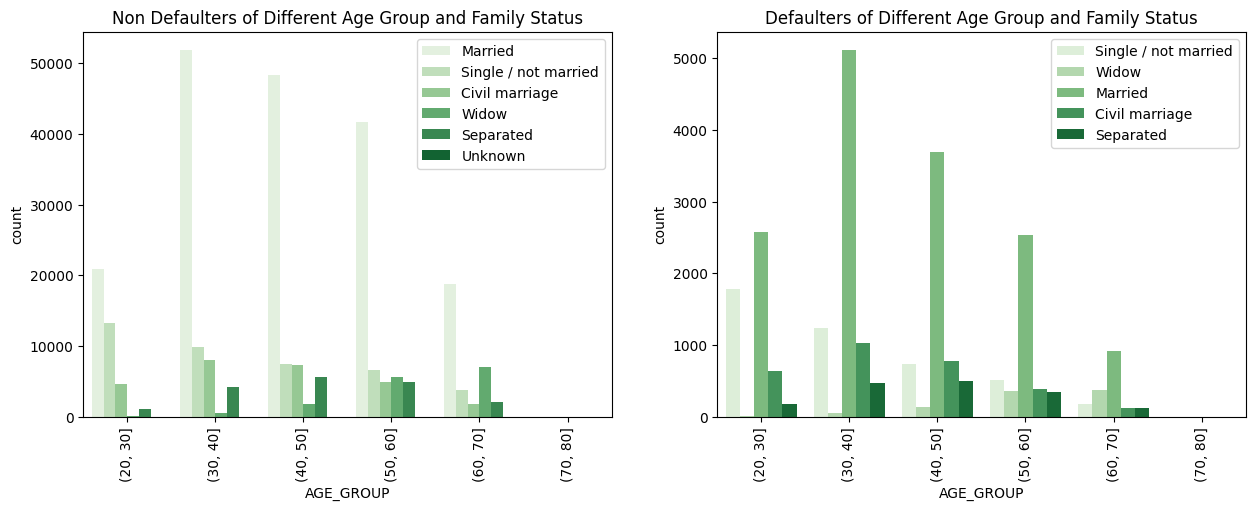

In [121]:
# AGE_GROUP with NAME_FAMILY_STATUS as Non Defaulter and Defaulter

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Non Defaulters of Different Age Group and Family Status')
sns.countplot(x='AGE_GROUP',hue='NAME_FAMILY_STATUS', data=no_dif,palette='Greens')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.subplot(1,2,2)
plt.title('Defaulters of Different Age Group and Family Status')
sns.countplot(x='AGE_GROUP',hue='NAME_FAMILY_STATUS',data=dif,palette='Greens')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.show()

- Applicants from the age group 30-40 and 40-50 covers largest share in Defaulters group.
    

### CORRELATION EXAMINATION BETWEEN TARGET VARIABLE AND OTHERS


<Axes: >

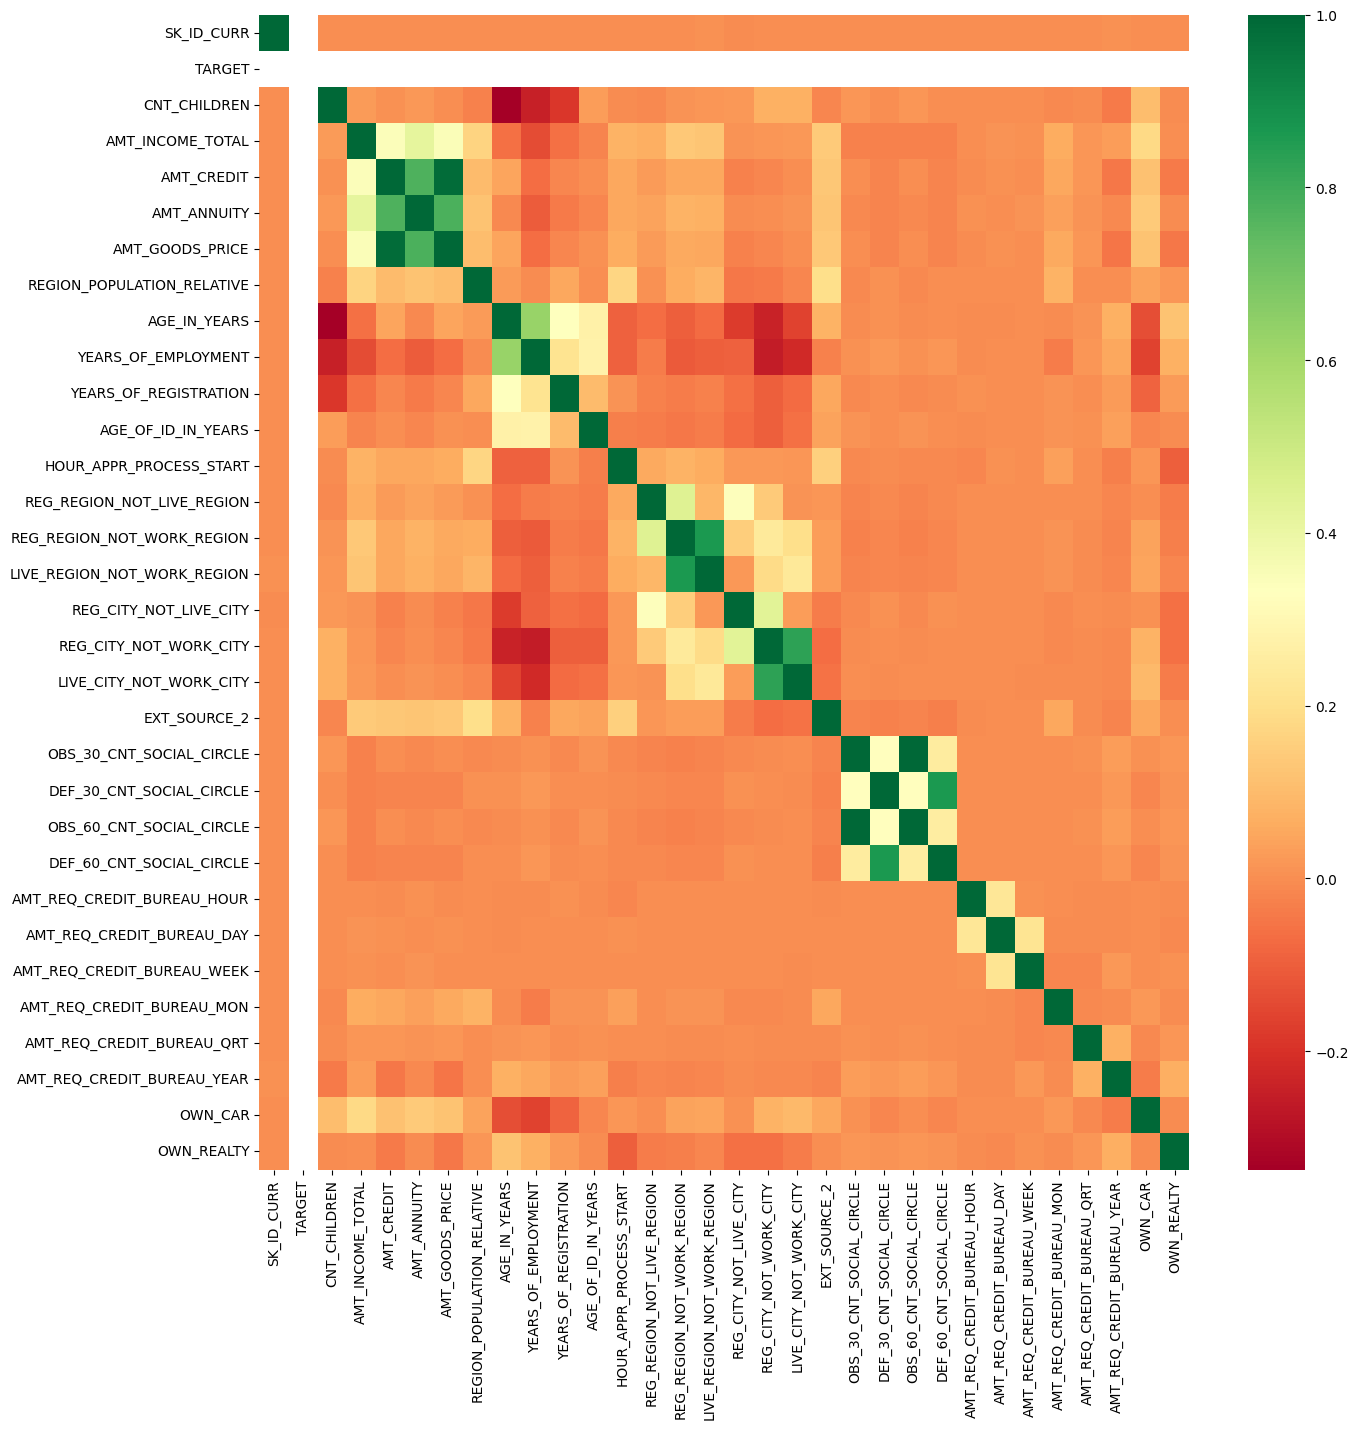

In [122]:
# Non Defaulters Correlation without Categorical Variable.

plt.figure(figsize=(15,15))
corr_tar_0=no_dif.corr()
# print(corr_tar_0)
sns.heatmap(corr_tar_0, cmap="RdYlGn", annot=False)



                                                        Correlation Coefficient
Variable 1                  Variable 2                                         
OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE                   0.998508
AMT_CREDIT                  AMT_GOODS_PRICE                            0.987250
LIVE_REGION_NOT_WORK_REGION REG_REGION_NOT_WORK_REGION                 0.861861
DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE                   0.859332
REG_CITY_NOT_WORK_CITY      LIVE_CITY_NOT_WORK_CITY                    0.830381
AMT_GOODS_PRICE             AMT_ANNUITY                                0.776686
AMT_CREDIT                  AMT_ANNUITY                                0.771309
AGE_IN_YEARS                YEARS_OF_EMPLOYMENT                        0.626062
REG_REGION_NOT_WORK_REGION  REG_REGION_NOT_LIVE_REGION                 0.446101
REG_CITY_NOT_WORK_CITY      REG_CITY_NOT_LIVE_CITY                     0.435514
AMT_INCOME_TOTAL            AMT_ANNUITY 

<Axes: xlabel='Variable 2', ylabel='Variable 1'>

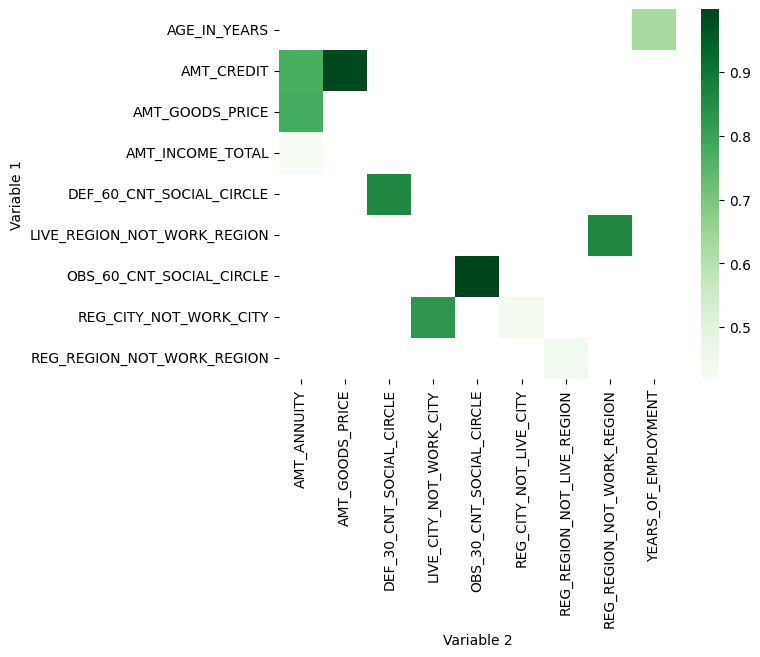

In [123]:
# finding top correlation fo Non_Defaulters

def get_top_correlations_blog(no_dif, threshold=0.4):
    """
    df: the dataframe to get correlations from
    threshold: the maximum and minimum value to include for correlations. For eg, if this is 0.4, only pairs haveing a correlation coefficient greater than 0.4 or less than -0.4 will be included in the results.
    """
    orig_corr = no_dif.corr()
    c = orig_corr.abs()

    so = c.unstack()

    # print("|    Variable 1    |    Variable 2    | Correlation Coefficient    |")
    # print("|------------------|------------------|----------------------------|")

    i=0
    pairs=set()
    result = pd.DataFrame()
    for index, value in so.sort_values(ascending=False).iteritems():
        # Exclude duplicates and self-correlations
        if value > threshold \
        and index[0] != index[1] \
        and (index[0], index[1]) not in pairs \
        and (index[1], index[0]) not in pairs:

            # print(f'|    {index[0]}    |    {index[1]}    |    {orig_corr.loc[(index[0], index[1])]}    |')
            result.loc[i, ['Variable 1', 'Variable 2', 'Correlation Coefficient']] = [index[0], index[1], orig_corr.loc[(index[0], index[1])]]
            pairs.add((index[0], index[1]))
            i+=1
    return result.reset_index(drop=True).set_index(['Variable 1', 'Variable 2'])

result=get_top_correlations_blog(no_dif)
# pd.pivot_table(result,index='Variable 1',columns='Variable 2', values='Correlation Coefficient')
print(result)
sns.heatmap(pd.pivot_table(result,index='Variable 1',columns='Variable 2', values='Correlation Coefficient'),cmap='Greens')

                                                        Correlation Coefficient
Variable 1                 Variable 2                                          
OBS_60_CNT_SOCIAL_CIRCLE   OBS_30_CNT_SOCIAL_CIRCLE                    0.998269
AMT_CREDIT                 AMT_GOODS_PRICE                             0.983103
DEF_60_CNT_SOCIAL_CIRCLE   DEF_30_CNT_SOCIAL_CIRCLE                    0.868994
REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION                 0.847885
LIVE_CITY_NOT_WORK_CITY    REG_CITY_NOT_WORK_CITY                      0.778540
AMT_GOODS_PRICE            AMT_ANNUITY                                 0.752699
AMT_CREDIT                 AMT_ANNUITY                                 0.752195
YEARS_OF_EMPLOYMENT        AGE_IN_YEARS                                0.582303
REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION                  0.497937
REG_CITY_NOT_LIVE_CITY     REG_CITY_NOT_WORK_CITY                      0.472052


<Axes: xlabel='Variable 2', ylabel='Variable 1'>

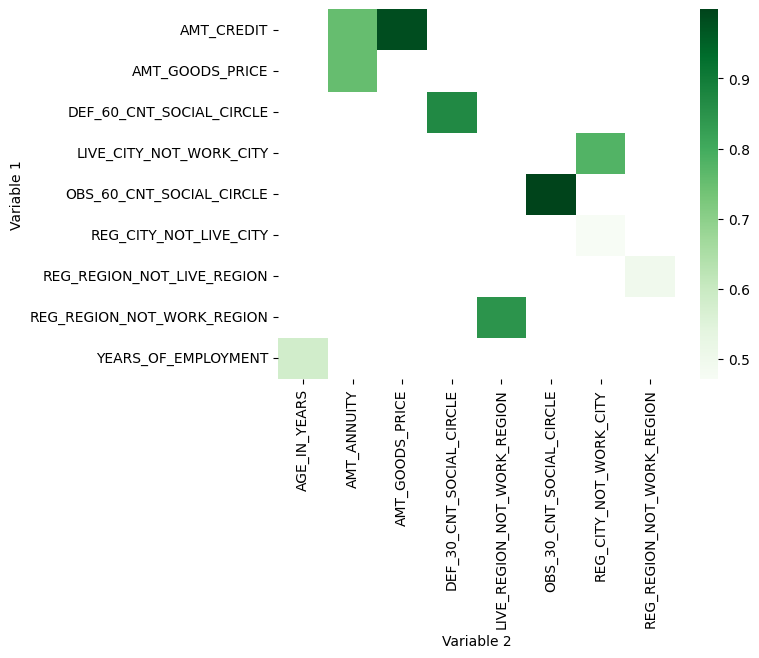

In [124]:
# finding top correlation fo Defaulters


# df: the dataframe to get correlations from threshold: the maximum and minimum value to include for correlations. For eg, if this is 0.4, only pairs haveing a correlation coefficient greater than 0.4 or less than -0.4 will be included in the results.

def get_top_correlations_blog(dif, threshold=0.4):

    orig_corr = dif.corr()
    c = orig_corr.abs()

    so = c.unstack()

    i=0
    pairs=set()
    result = pd.DataFrame()
    for index, value in so.sort_values(ascending=False).iteritems():
        # Exclude duplicates and self-correlations
        if value > threshold \
        and index[0] != index[1] \
        and (index[0], index[1]) not in pairs \
        and (index[1], index[0]) not in pairs:

            result.loc[i, ['Variable 1', 'Variable 2', 'Correlation Coefficient']] = [index[0], index[1], orig_corr.loc[(index[0], index[1])]]
            pairs.add((index[0], index[1]))
            i+=1
    return result.reset_index(drop=True).set_index(['Variable 1', 'Variable 2'])

result=get_top_correlations_blog(dif)
print(result)
sns.heatmap(pd.pivot_table(result,index='Variable 1',columns='Variable 2', values='Correlation Coefficient'),cmap='Greens')

- Above are the top Highly Correlated variable for Defaulters and Non_Defaulters.
- al these variables are selected above threshold correlation coefficient value 0.4.
- we can see OBS_60_CNT_SOCIAL_CIRCLE-OBS_30_CNT_SOCIAL_CIRCLE,
 AMT_CREDIT-AMT_GOODS_PRICE,
 DEF_60_CNT_SOCIAL_CIRCLE-DEF_30_CNT_SOCIAL_CIRCLE,
 REG REGION NOT WORK REGION-LIVE REGION NOT WORK REGION,
 LIVE_CITY_NOT_WORK_CITY-REG_CITY_NOT_WORK_CITY,
 AMT GOODS PRICE-AMT ANNUITY, AMT_CREDIT-AMT_ANNUITY,



AGE_GROUP      (20, 30]   (30, 40]   (40, 50]   (50, 60]   (60, 70]
INCOME_GROUP                                                       
VeryLow       288369.56  346401.25  378570.01  379966.44  317860.11
Low           361167.77  453430.24  497930.08  502895.97  430009.75
Medium        462650.54  555219.46  612064.55  623792.28  546783.14
High          581975.75  680489.68  733355.81  762942.89  686024.76
VeryHigh      749758.35  856749.91  922761.17  957208.51  906726.83
AGE_GROUP      (20, 30]   (30, 40]   (40, 50]   (50, 60]   (60, 70]
INCOME_GROUP                                                       
VeryLow       307204.73  363687.01  405240.27  413286.31  397779.43
Low           378598.75  435999.32  497820.44  502617.75  499669.92
Medium        448558.79  535209.01  586730.42  610588.88  595157.82
High          561743.79  624014.19  672785.71  708775.97  696981.66
VeryHigh      691287.48  776995.01  792321.02  858770.97  801793.98


<Axes: title={'center': 'AMT_CREDIT with AGE_GROUP -Defaulter'}, xlabel='AGE_GROUP', ylabel='INCOME_GROUP'>

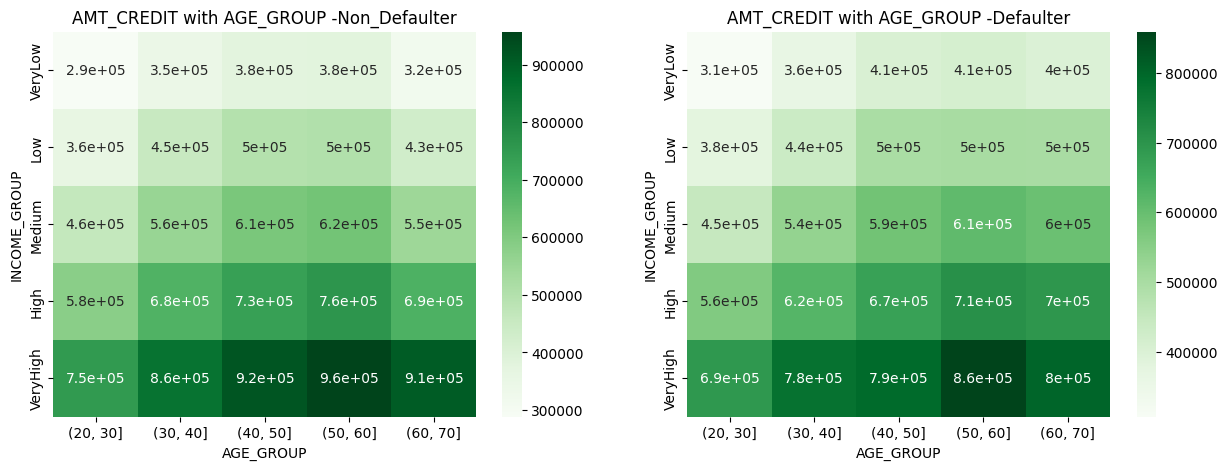

In [125]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('AMT_CREDIT with AGE_GROUP -Non_Defaulter')
result=pd.pivot_table(data=no_dif, index="INCOME_GROUP",columns="AGE_GROUP",values='AMT_CREDIT', aggfunc="mean")
print(round(result,2))
sns.heatmap(result,cmap='Greens',annot=True)

plt.subplot(1,2,2)
plt.title('AMT_CREDIT with AGE_GROUP -Defaulter')
result=pd.pivot_table(data=dif, index="INCOME_GROUP",columns="AGE_GROUP",values='AMT_CREDIT', aggfunc="mean")
print(round(result,2))
sns.heatmap(result,cmap='Greens',annot=True)


- Applicants from Very_High Income Range and under the age of 50-60 are more likely Defaulters.

## Previous Application DataFrame

In [126]:
prev_app=pd.read_csv('/content/drive/MyDrive/Upgrad_Assignment/Credit_EDA_Assignment/Copy of previous_application.csv')

In [127]:
prev_app.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [128]:
prev_app.head(10)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   
5     1383531      199383         Cash loans    23703.930         315000.0   
6     2315218      175704         Cash loans          NaN              0.0   
7     1656711      296299         Cash loans          NaN              0.0   
8     2367563      342292         Cash loans          NaN              0.0   
9     2579447      334349         Cash loans          NaN              0.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   
5    340573.5               NaN         315000.0                   SATURDAY   
6         0.0               NaN              NaN                    TUESDAY   
7         0.0               NaN              NaN                     MONDAY   
8         0.0               NaN              NaN                     MONDAY   
9         0.0               NaN              NaN                   SATURDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   
5                        8                           Y   
6                       11                           Y   
7                        7                           Y   
8                       15                           Y   
9                       15                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   
5                       1                NaN                    NaN   
6                       1                NaN                    NaN   
7                       1                NaN                    NaN   
8                       1                NaN                    NaN   
9                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   
5                       NaN      Everyday expenses             Approved   
6                       NaN                    XNA             Canceled   
7                       NaN                    XNA             Canceled   
8                       NaN                    XNA             Canceled   
9                       NaN                    XNA             Canceled   

   DAYS_DECISION      NAME_

In [129]:
prev_app.shape

(1670214, 37)

In [130]:
prev_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [131]:
prev_app.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115833    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

#### PREVIOUS DATA CLEANING

In [132]:
# Missing VAlues
prev_app.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [133]:
# %age Missing VAlues

(prev_app.isnull().sum()/prev_app.shape[0])*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

<Axes: >

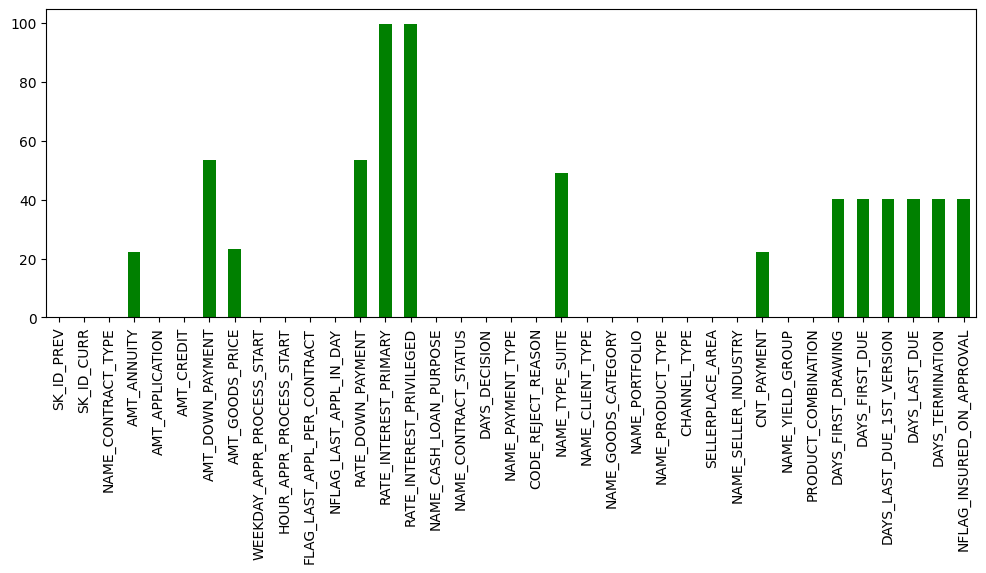

In [134]:
mv=(prev_app.isnull().sum()/prev_app.shape[0])*100
plt.figure(figsize=(12,4))
mv.plot.bar(color='Green')

In [135]:
# we will delete Nans of AMT_ANNUITY, AMT_GOODS_PRICE and NAME_SUIT_TYPE, as this dataset is much larger than Application_dataset.

prev_app = prev_app.dropna(axis=0, subset=['AMT_ANNUITY'])
prev_app = prev_app.dropna(axis=0, subset=['AMT_GOODS_PRICE'])
prev_app = prev_app.dropna(axis=0, subset=['NAME_TYPE_SUITE'])
prev_app.isnull().sum()/len(prev_app)*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                     0.000000
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000000
AMT_DOWN_PAYMENT               41.375317
AMT_GOODS_PRICE                 0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              41.375317
RATE_INTEREST_PRIMARY          99.987015
RATE_INTEREST_PRIVILEGED       99.987015
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                 0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [136]:
col_20_miss=prev_app.columns[(prev_app.isnull().sum()*100/prev_app.shape[0])>20]
col_20_miss

Index(['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [137]:
# checking if The left columns with Nans are of our use.
# AS only two columns are there which have 99% Nans, They are by Default of no use, but the rest are below our thresjold of Nan i.e. 45%

prev_app[(prev_app['NAME_CONTRACT_STATUS']!="Approved")]['NFLAG_INSURED_ON_APPROVAL'].value_counts(dropna=True)


Series([], Name: NFLAG_INSURED_ON_APPROVAL, dtype: int64)

In [138]:
for i in col_20_miss:
  a=prev_app[(prev_app['NAME_CONTRACT_STATUS']!="Approved")][i].value_counts(dropna=True)
  print(i,a.shape)

AMT_DOWN_PAYMENT (6795,)
RATE_DOWN_PAYMENT (17648,)
RATE_INTEREST_PRIMARY (0,)
RATE_INTEREST_PRIVILEGED (0,)
DAYS_FIRST_DRAWING (0,)
DAYS_FIRST_DUE (0,)
DAYS_LAST_DUE_1ST_VERSION (0,)
DAYS_LAST_DUE (0,)
DAYS_TERMINATION (0,)
NFLAG_INSURED_ON_APPROVAL (0,)


In [139]:
# Now we will remove all these columns , having no use in our study

prev_app.drop(axis=1,columns=col_20_miss,inplace=True)
prev_app.shape

(839428, 27)

In [140]:
prev_app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 839428 entries, 1 to 1670213
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_PREV                   839428 non-null  int64  
 1   SK_ID_CURR                   839428 non-null  int64  
 2   NAME_CONTRACT_TYPE           839428 non-null  object 
 3   AMT_ANNUITY                  839428 non-null  float64
 4   AMT_APPLICATION              839428 non-null  float64
 5   AMT_CREDIT                   839428 non-null  float64
 6   AMT_GOODS_PRICE              839428 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   839428 non-null  object 
 8   HOUR_APPR_PROCESS_START      839428 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  839428 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       839428 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       839428 non-null  object 
 12  NAME_CONTRACT_STATUS         839428 non-null  object 
 13

In [141]:
prev_app.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_TYPE_SUITE                0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
dtype: int64

In [142]:
# droping some more columns that will not be used in our analysis

nouse=['HOUR_APPR_PROCESS_START','NFLAG_LAST_APPL_IN_DAY','DAYS_DECISION','SELLERPLACE_AREA']
prev_app.drop(axis=1,columns=nouse,inplace=True)
prev_app.shape

(839428, 23)

In [143]:
prev_app.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
FLAG_LAST_APPL_PER_CONTRACT    0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_TYPE_SUITE                0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
dtype: int64

In [144]:
# Object variables

for i in prev_app.columns:
  if prev_app[i].dtypes=='object':
    print(prev_app[i].value_counts(normalize=True))
    print('\n\n')

Consumer loans     0.546538
Cash loans         0.386979
Revolving loans    0.066483
Name: NAME_CONTRACT_TYPE, dtype: float64



SATURDAY     0.153656
FRIDAY       0.149557
WEDNESDAY    0.147901
TUESDAY      0.147241
MONDAY       0.146559
THURSDAY     0.145114
SUNDAY       0.109973
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64



Y    0.997592
N    0.002408
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: float64



XAP                                 0.613021
XNA                                 0.336678
Repairs                             0.017471
Other                               0.011104
Urgent needs                        0.005006
Buying a used car                   0.002231
Everyday expenses                   0.002066
Building a house or an annex        0.001970
Medicine                            0.001656
Payments on other loans             0.001502
Education                           0.001337
Buying a new car                    0.000909
Journey                             0.000904


In [145]:
# Deleting columns that have XNA, XAP, NNA in high amount and columns
# that are not needed in our analysis.

collist=['WEEKDAY_APPR_PROCESS_START', 'NAME_PRODUCT_TYPE',
         'NAME_CASH_LOAN_PURPOSE', 'NAME_GOODS_CATEGORY','NAME_PAYMENT_TYPE'
         ,'CODE_REJECT_REASON']
prev_app.drop(axis=1, columns=collist, inplace=True)
prev_app.shape

(839428, 17)

In [146]:
# Checking again for XNA , XAP, NNA

for i in prev_app.columns:
  if prev_app[i].dtypes=='object':
    print(prev_app[i].value_counts(normalize=True))
    print('\n\n')

Consumer loans     0.546538
Cash loans         0.386979
Revolving loans    0.066483
Name: NAME_CONTRACT_TYPE, dtype: float64



Y    0.997592
N    0.002408
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: float64



Approved    0.791392
Refused     0.196773
Canceled    0.011834
Name: NAME_CONTRACT_STATUS, dtype: float64



Unaccompanied      0.600422
Family             0.250467
Spouse, partner    0.078680
Children           0.036775
Other_B            0.020491
Other_A            0.010568
Group of people    0.002597
Name: NAME_TYPE_SUITE, dtype: float64



Repeater     0.683630
New          0.234339
Refreshed    0.081129
XNA          0.000902
Name: NAME_CLIENT_TYPE, dtype: float64



POS      0.546538
Cash     0.386979
Cards    0.066483
Name: NAME_PORTFOLIO, dtype: float64



Credit and cash offices       0.337207
Country-wide                  0.327304
Stone                         0.169409
Regional / Local              0.091391
AP+ (Cash loan)               0.036793
Contact center            

### Univariate Analysis

Consumer loans     0.546538
Cash loans         0.386979
Revolving loans    0.066483
Name: NAME_CONTRACT_TYPE, dtype: float64


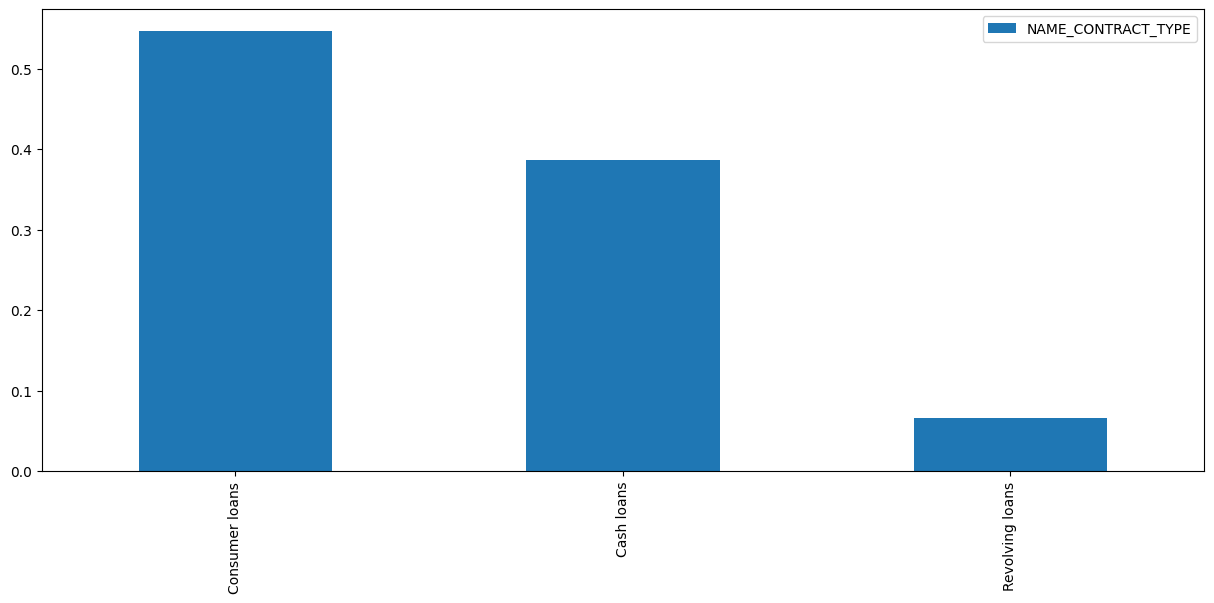



Y    0.997592
N    0.002408
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: float64


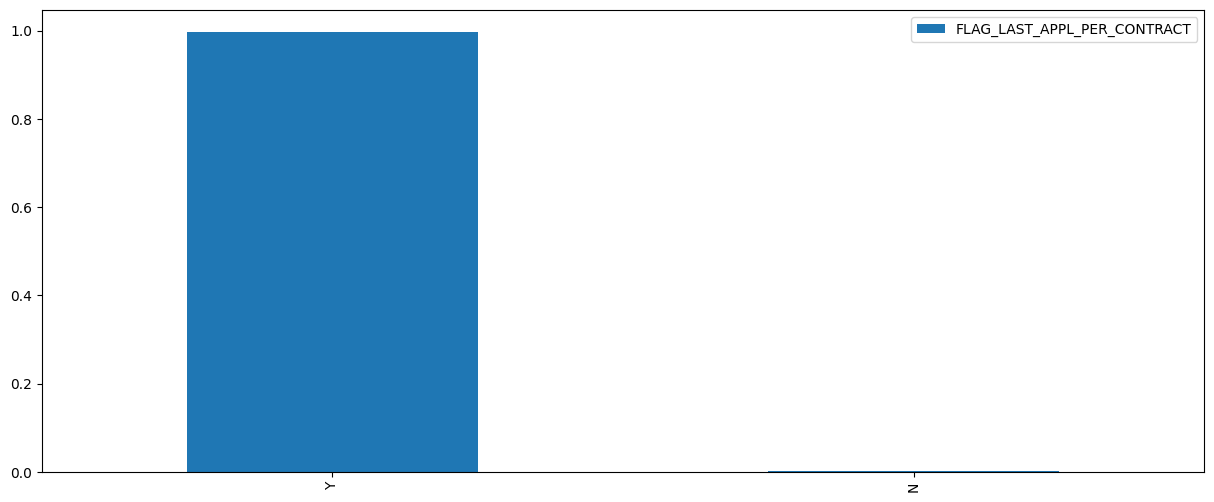



Approved    0.791392
Refused     0.196773
Canceled    0.011834
Name: NAME_CONTRACT_STATUS, dtype: float64


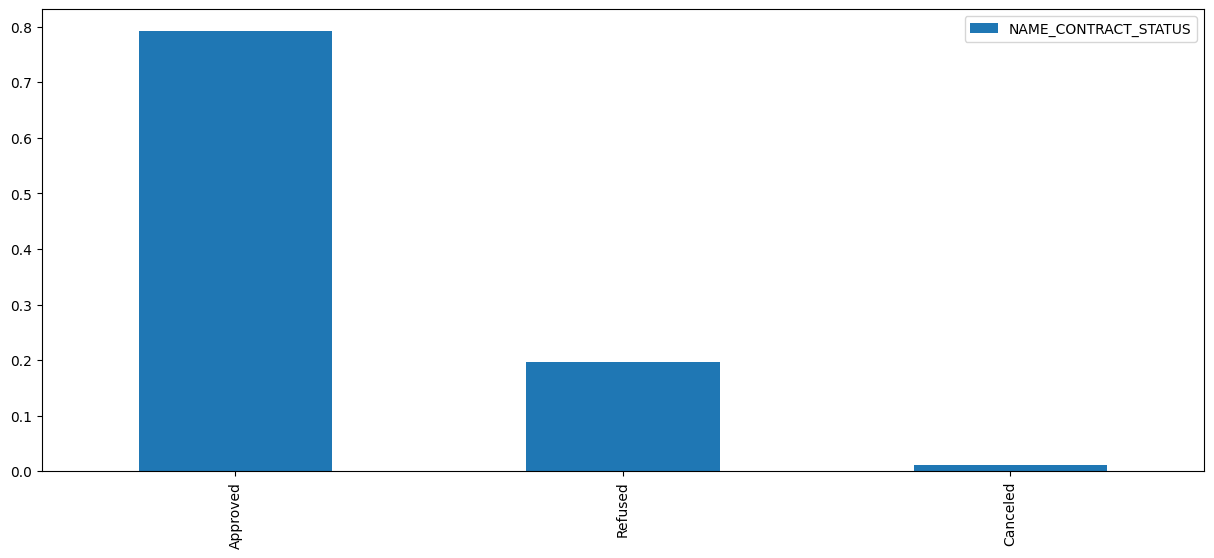



Unaccompanied      0.600422
Family             0.250467
Spouse, partner    0.078680
Children           0.036775
Other_B            0.020491
Other_A            0.010568
Group of people    0.002597
Name: NAME_TYPE_SUITE, dtype: float64


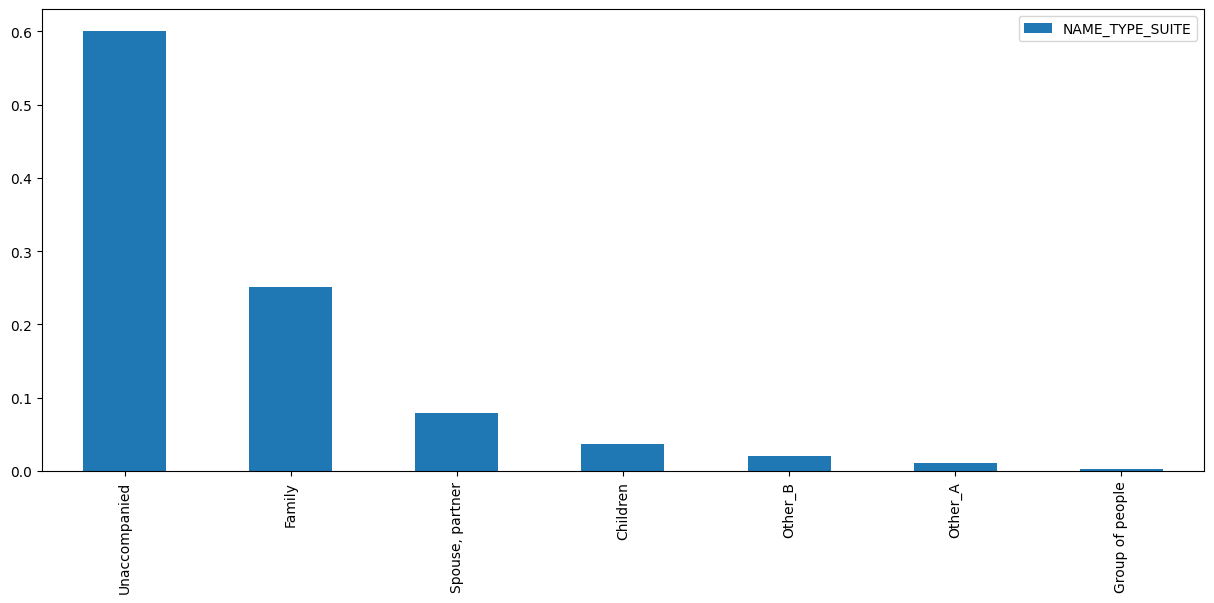



Repeater     0.683630
New          0.234339
Refreshed    0.081129
XNA          0.000902
Name: NAME_CLIENT_TYPE, dtype: float64


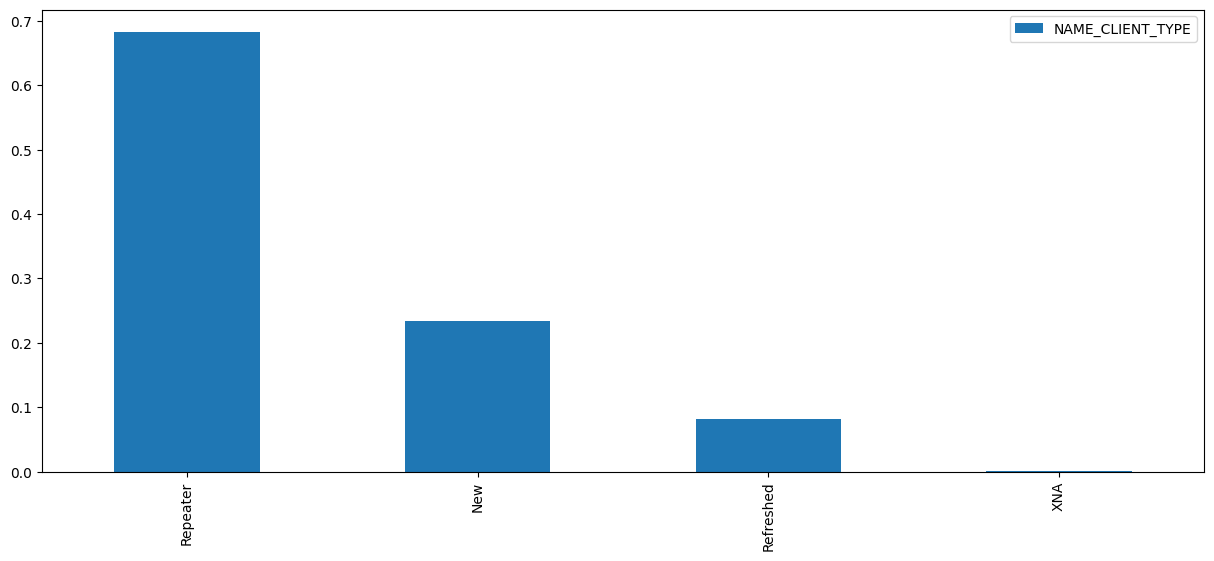



POS      0.546538
Cash     0.386979
Cards    0.066483
Name: NAME_PORTFOLIO, dtype: float64


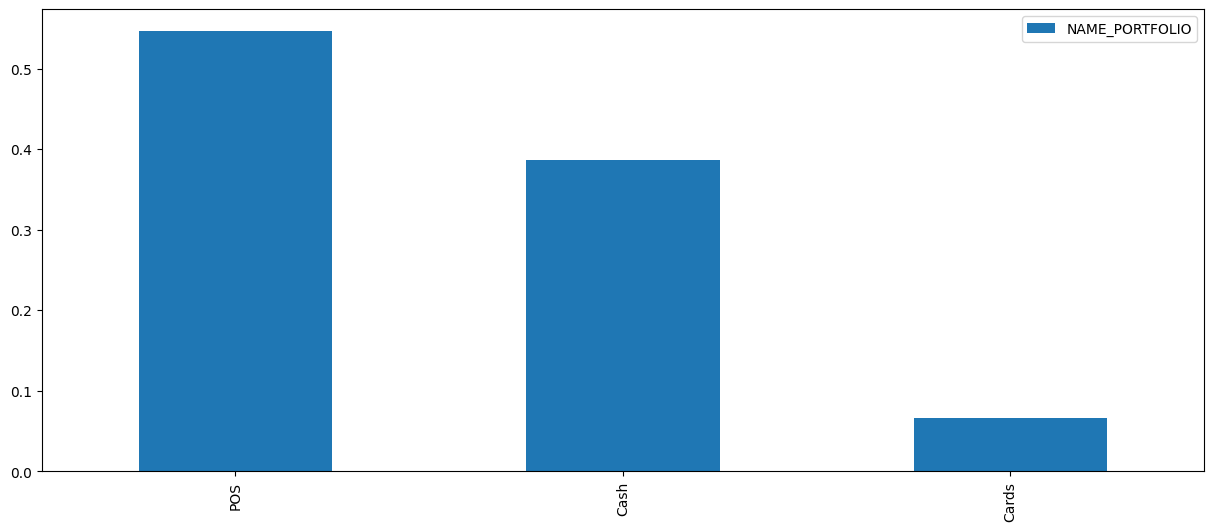



Credit and cash offices       0.337207
Country-wide                  0.327304
Stone                         0.169409
Regional / Local              0.091391
AP+ (Cash loan)               0.036793
Contact center                0.032470
Channel of corporate sales    0.005394
Car dealer                    0.000032
Name: CHANNEL_TYPE, dtype: float64


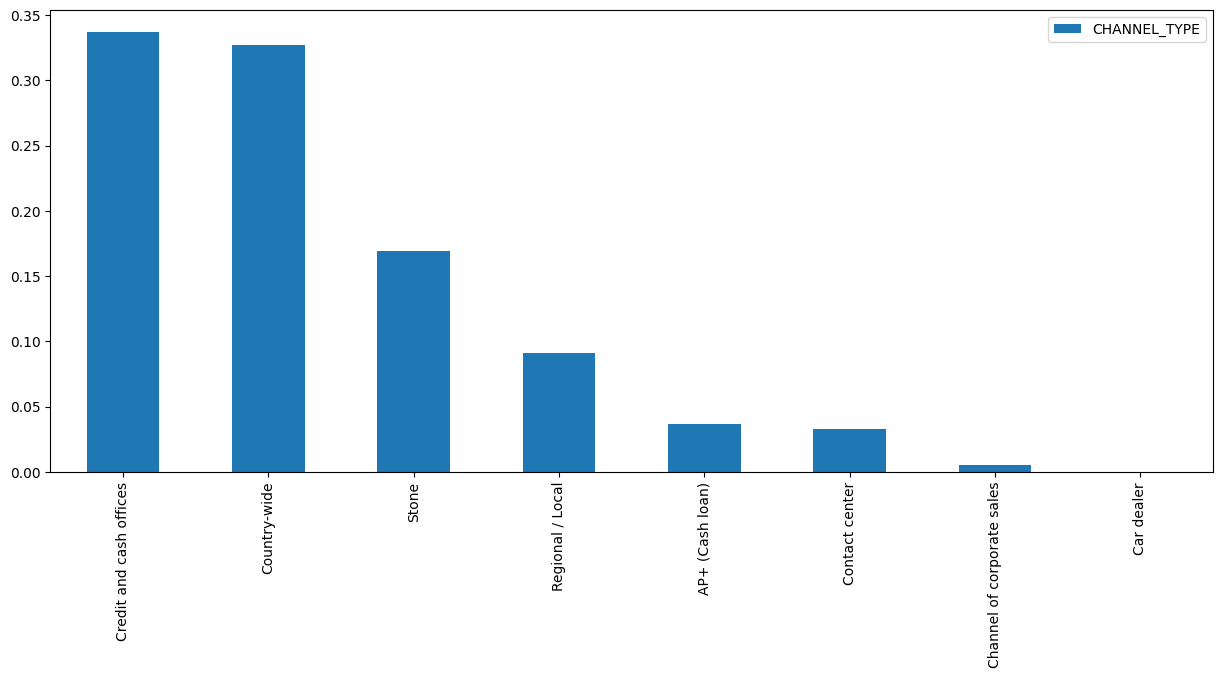



XNA                     0.412407
Consumer electronics    0.344217
Connectivity            0.142215
Furniture               0.044586
Construction            0.020298
Clothing                0.018694
Industry                0.011602
Auto technology         0.003037
Jewelry                 0.001743
MLM partners            0.000789
Tourism                 0.000413
Name: NAME_SELLER_INDUSTRY, dtype: float64


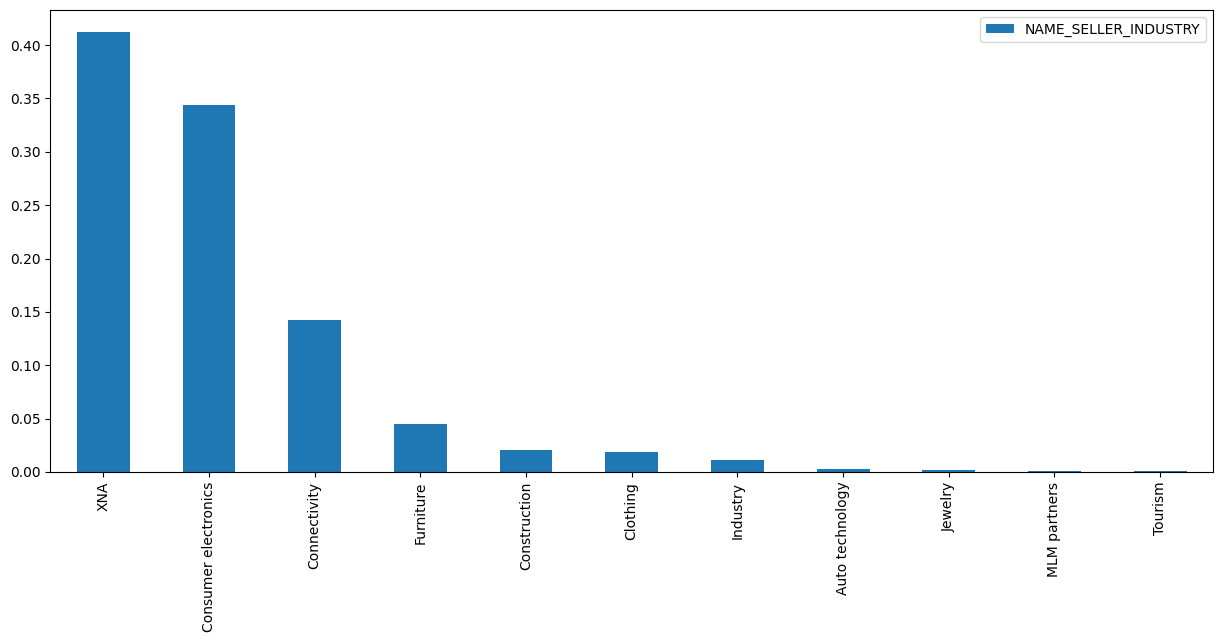



middle        0.301908
low_normal    0.277738
high          0.270512
low_action    0.083359
XNA           0.066483
Name: NAME_YIELD_GROUP, dtype: float64


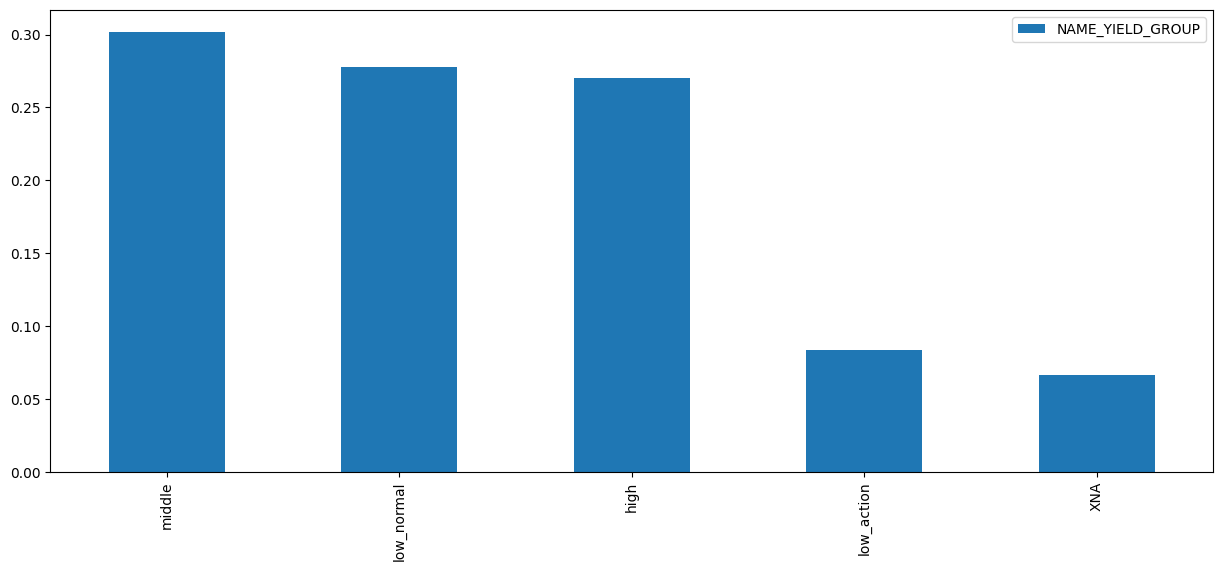



POS household with interest       0.243007
Cash X-Sell: low                  0.125700
POS mobile with interest          0.119671
Cash X-Sell: middle               0.115126
POS household without interest    0.079051
POS industry with interest        0.073928
Cash Street: high                 0.043200
Cash X-Sell: high                 0.042531
Card X-Sell                       0.036886
Cash Street: low                  0.035082
Card Street                       0.029598
Cash Street: middle               0.025340
POS other with interest           0.014538
POS industry without interest     0.009231
POS mobile without interest       0.006049
POS others without interest       0.001061
Name: PRODUCT_COMBINATION, dtype: float64


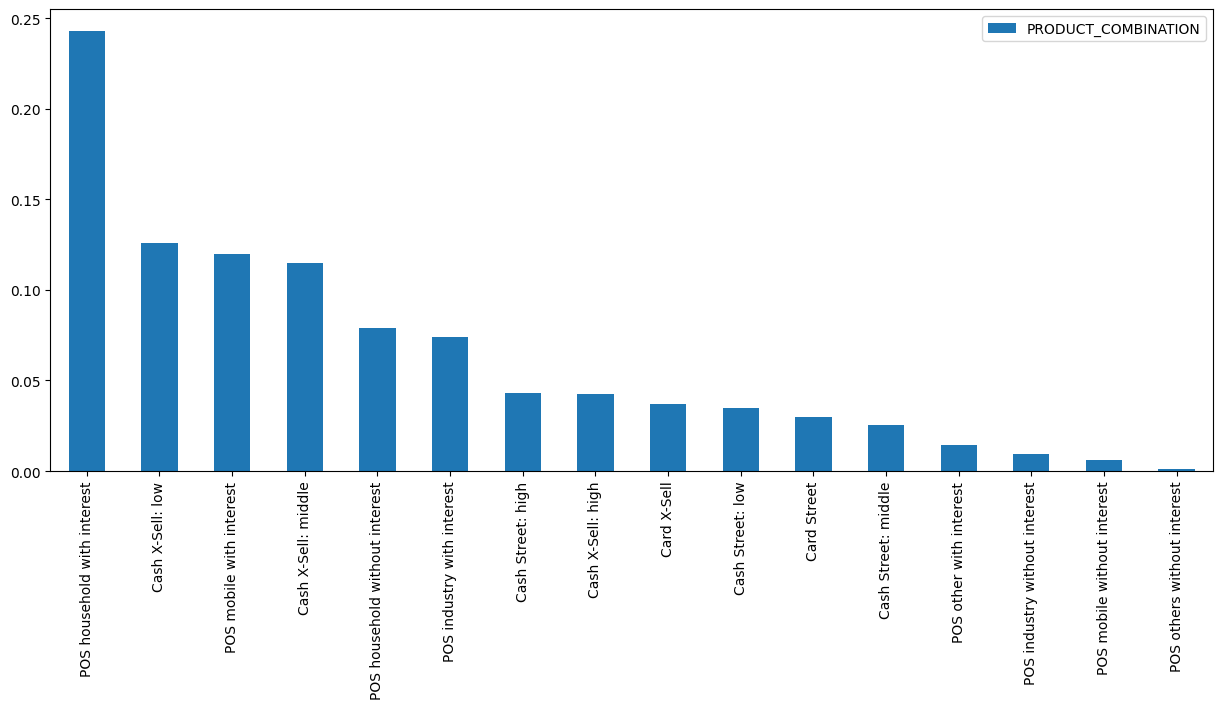

In [147]:
# Categorical Nominal- all object type variables.

for i in prev_app.columns:
    if prev_app[i].dtypes=="object":
        print(prev_app[i].value_counts(normalize=True, dropna= False))
        plt.figure(figsize=[15,6])
        prev_app[i].value_counts(normalize=True, dropna=False).plot.bar()
        plt.legend(loc='upper right')
        plt.show()
        print("\n")

**Conclusion:**

1. Where application data has only two types of value for loan types, this dataframe consists one additional loan type i.e. Consumer Loan which is 55%, Cash Loans are around 37% and revolving are 8%.

2. Approved are 79% , Refused are 19.6% and Cancelled are 1.4% approx.

3. in NAME_CLIENT_TYPE 67% apllicants are repeaters.

4. From NAME_PORTFOLIO , 54.65% of users took loan to purchase something.
   whereas Cash loans are 38.69% and rest though cards.


In [148]:
prev_app.shape

(839428, 17)

In [149]:
# we need to delete all rows of NAME_SELLER_INDUSTRY and NAME_YIELD_GROUP having XNA,it is aorund 41%,  bcos XNA is equivalent to NULL.

prev_app=prev_app[prev_app['NAME_SELLER_INDUSTRY']!='XNA']

In [150]:
prev_app=prev_app[prev_app['NAME_YIELD_GROUP']!='XNA']

In [151]:
prev_app.shape

(476535, 17)

Consumer loans    0.961325
Cash loans        0.038675
Name: NAME_CONTRACT_TYPE, dtype: float64


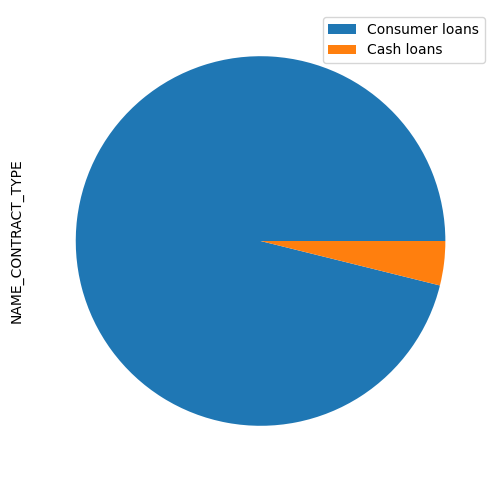



Y    1.0
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: float64


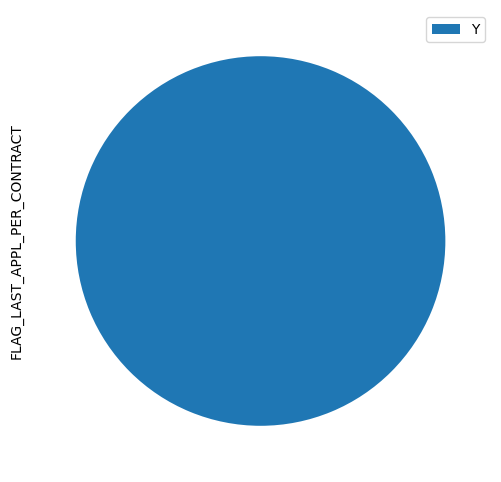



Approved    0.892642
Refused     0.106781
Canceled    0.000577
Name: NAME_CONTRACT_STATUS, dtype: float64


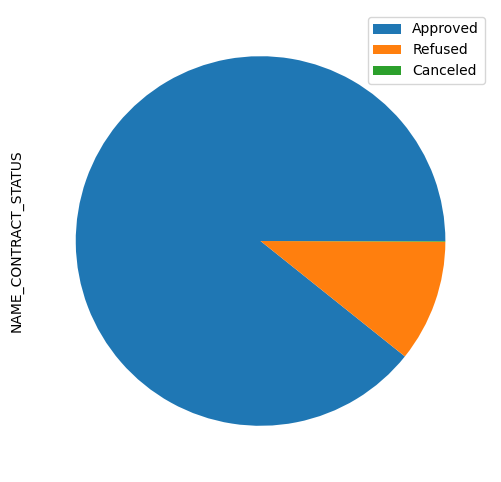



Unaccompanied      0.450191
Family             0.343356
Spouse, partner    0.105063
Children           0.052915
Other_B            0.029368
Other_A            0.015487
Group of people    0.003620
Name: NAME_TYPE_SUITE, dtype: float64


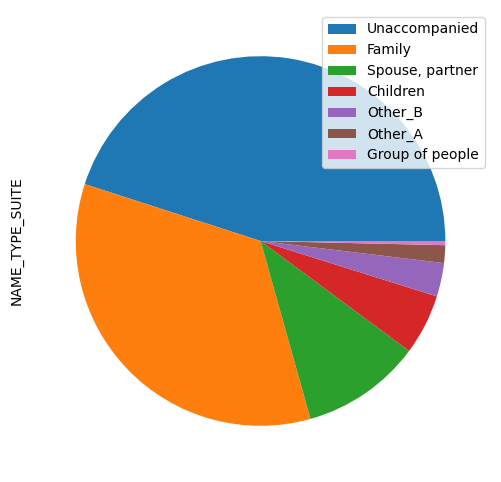



Repeater     0.542162
New          0.377124
Refreshed    0.080015
XNA          0.000699
Name: NAME_CLIENT_TYPE, dtype: float64


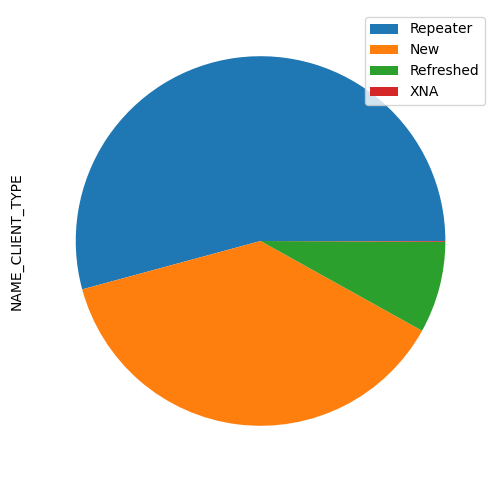



POS     0.961325
Cash    0.038675
Name: NAME_PORTFOLIO, dtype: float64


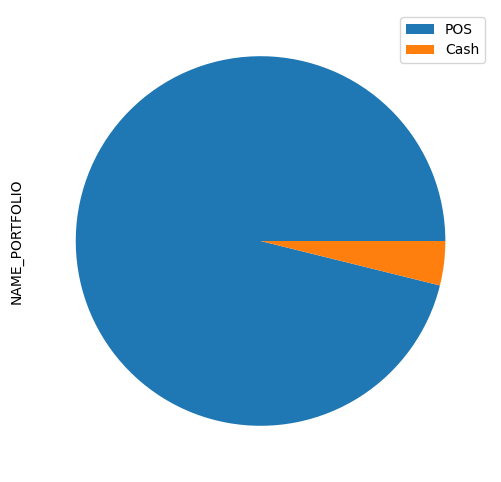



Country-wide                  0.552377
Stone                         0.293173
Regional / Local              0.153321
Contact center                0.000594
AP+ (Cash loan)               0.000229
Credit and cash offices       0.000193
Car dealer                    0.000057
Channel of corporate sales    0.000057
Name: CHANNEL_TYPE, dtype: float64


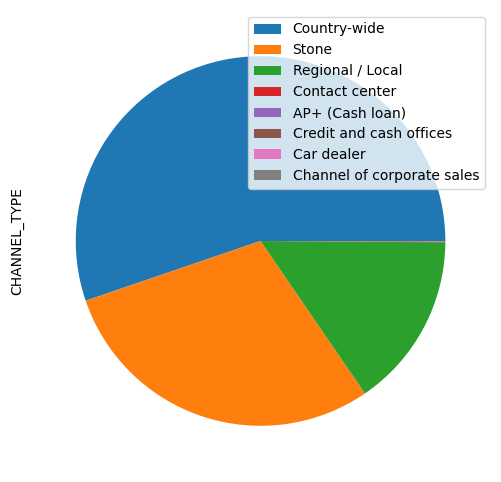



Consumer electronics    0.581109
Connectivity            0.244213
Furniture               0.076712
Construction            0.035286
Clothing                0.032212
Industry                0.020372
Auto technology         0.005104
Jewelry                 0.002984
MLM partners            0.001284
Tourism                 0.000724
Name: NAME_SELLER_INDUSTRY, dtype: float64


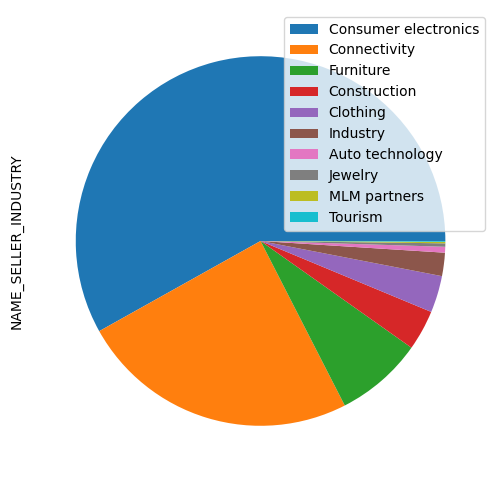



high          0.338198
middle        0.298264
low_normal    0.259041
low_action    0.104498
Name: NAME_YIELD_GROUP, dtype: float64


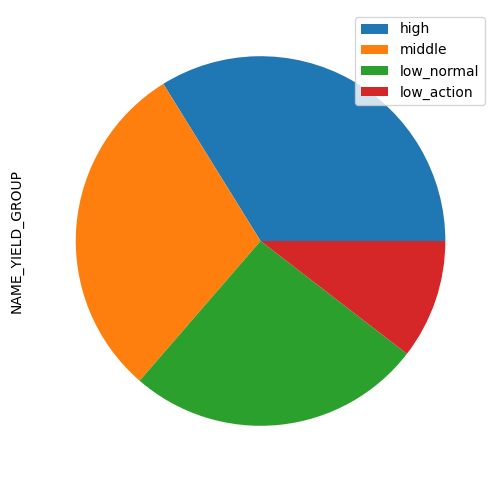



POS household with interest       0.427679
POS mobile with interest          0.210738
POS household without interest    0.139205
POS industry with interest        0.129487
POS other with interest           0.025524
POS industry without interest     0.016209
Cash X-Sell: middle               0.011323
POS mobile without interest       0.010629
Cash X-Sell: low                  0.010098
Cash Street: high                 0.008965
Cash X-Sell: high                 0.003857
Cash Street: middle               0.003209
POS others without interest       0.001855
Cash Street: low                  0.001223
Name: PRODUCT_COMBINATION, dtype: float64


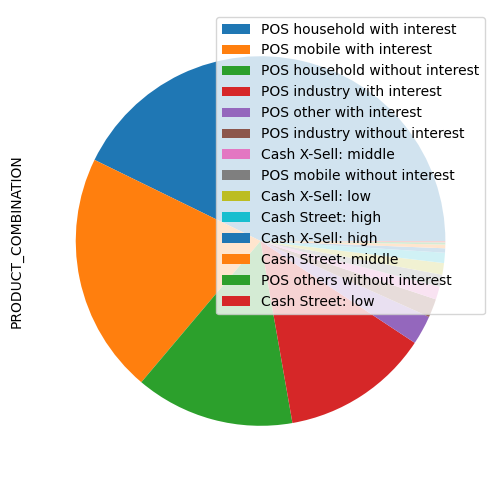

In [152]:
for i in prev_app.columns:
    if prev_app[i].dtypes=="object":
        print(prev_app[i].value_counts(normalize=True, dropna= False))
        plt.figure(figsize=[15,6])
        prev_app[i].value_counts(normalize=True, dropna=False).plot.pie(labeldistance=None)
        plt.legend(loc='upper right')
        plt.show()
        print("\n")

In [153]:
# Dropping column FLAG_LAST_APPL_PER_CONTRACT as this column shows if it was last application for the contract,
# as sometimes by mistake of client or companies clerk there could be more application for single contract. and after above operations ,
# we are left with all 1s in this column.

prev_app.drop(axis=1,columns='FLAG_LAST_APPL_PER_CONTRACT',inplace=True)
prev_app.shape

(476535, 16)

In [154]:
# Numeric Type variable analysis.

prev_app.describe()

SK_ID_PREV     SK_ID_CURR    AMT_ANNUITY  AMT_APPLICATION  \
count  4.765350e+05  476535.000000  476535.000000     4.765350e+05   
mean   1.904904e+06  278529.910529   10498.473451     1.015493e+05   
std    5.349934e+05  102794.643717    8551.466820     1.139395e+05   
min    1.000002e+06  100001.000000       0.000000     0.000000e+00   
25%    1.438070e+06  189710.500000    5157.112500     3.959100e+04   
50%    1.897007e+06  278577.000000    8274.825000     7.325100e+04   
75%    2.369064e+06  367746.500000   13073.557500     1.239300e+05   
max    2.845379e+06  456255.000000  393868.665000     3.510000e+06   

         AMT_CREDIT  AMT_GOODS_PRICE    CNT_PAYMENT  
count  4.765350e+05     4.765350e+05  476535.000000  
mean   1.001898e+05     1.015493e+05      11.737826  
std    1.145766e+05     1.139395e+05       6.671236  
min    0.000000e+00     0.000000e+00       3.000000  
25%    3.762450e+04     3.959100e+04       6.000000  
50%    7.109100e+04     7.325100e+04      10.000000  
75%    1.233225e+05     1.239300e+05      12.000000  
max    3.272490e+06     3.510000e+06      60.000000

In [155]:
prev_app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 476535 entries, 13 to 1670211
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   SK_ID_PREV            476535 non-null  int64  
 1   SK_ID_CURR            476535 non-null  int64  
 2   NAME_CONTRACT_TYPE    476535 non-null  object 
 3   AMT_ANNUITY           476535 non-null  float64
 4   AMT_APPLICATION       476535 non-null  float64
 5   AMT_CREDIT            476535 non-null  float64
 6   AMT_GOODS_PRICE       476535 non-null  float64
 7   NAME_CONTRACT_STATUS  476535 non-null  object 
 8   NAME_TYPE_SUITE       476535 non-null  object 
 9   NAME_CLIENT_TYPE      476535 non-null  object 
 10  NAME_PORTFOLIO        476535 non-null  object 
 11  CHANNEL_TYPE          476535 non-null  object 
 12  NAME_SELLER_INDUSTRY  476535 non-null  object 
 13  CNT_PAYMENT           476535 non-null  float64
 14  NAME_YIELD_GROUP      476535 non-null  object 
 15

In [156]:
prev_app

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
13          1397919      321676     Consumer loans     7654.860   
15          1232483      151612     Consumer loans    21307.455   
16          2163253      154602     Consumer loans     4187.340   
28          2075578      418383     Consumer loans     7656.705   
35          2027074      208000     Consumer loans    12065.535   
...             ...         ...                ...          ...   
1670199     1077969      242303     Consumer loans     8546.940   
1670201     1028905      442706     Consumer loans     6127.065   
1670202     2205099      157707     Consumer loans     4334.355   
1670210     2357031      334635     Consumer loans     6622.020   
1670211     2659632      249544     Consumer loans    11520.855   

         AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE NAME_CONTRACT_STATUS  \
13               53779.5     57564.0          53779.5             Approved   
15              126490.5    119853.0         126490.5             Approved   
16               26955.0     27297.0          26955.0             Approved   
28               74610.0     65610.0          74610.0             Approved   
35               56655.0     66411.0          56655.0             Approved   
...                  ...         ...              ...                  ...   
1670199          37926.0     40932.0          37926.0             Approved   
1670201          45450.0     54126.0          45450.0             Approved   
1670202          22207.5     23854.5          22207.5             Approved   
1670210          87750.0     64291.5          87750.0             Approved   
1670211         105237.0    102523.5         105237.0             Approved   

         NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_PORTFOLIO      CHANNEL_TYPE  \
13         Unaccompanied              New            POS      Country-wide   
15         Unaccompanied              New            POS  Regional / Local   
16         Unaccompanied         Repeater            POS             Stone   
28                Family              New            POS             Stone   
35         Unaccompanied         Repeater            POS      Country-wide   
...                  ...              ...            ...               ...   
1670199    Unaccompanied         Repeater            POS      Country-wide   
1670201    Unaccompanied         Repeater            POS             Stone   
1670202           Family         Repeater            POS             Stone   
1670210    Unaccompanied              New            POS             Stone   
1670211  Spouse, partner         Repeater            POS      Country-wide   

         NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP  \
13       Consumer electronics          8.0       low_action   
15                   Industry          6.0       low_normal   
16       Consumer electronics          8.0             high   
28               Connectivity         12.0       low_normal   
35       Consumer electronics          6.0           middle   
...                       ...          ...              ...   
1670199          Connectivity          6.0             high   
1670201             Furniture         12.0             high   
1670202              Clothing          6.0           middle   
1670210             Furniture         12.0           middle   
1670211  Consumer electronics         10.0       low_normal   

                    PRODUCT_COMBINATION  
13       POS household without interest  
15              POS other with interest  
16          POS household with interest  
28             POS mobile with interest  
35          POS household with interest  
...                                 ...  
1670199        POS mobile with interest  
1670201      POS industry with interest  
1670202      POS industry with interest  
1670210      POS industry with interest  
1670211     POS household with interest  

[476535 rows x 16 columns]

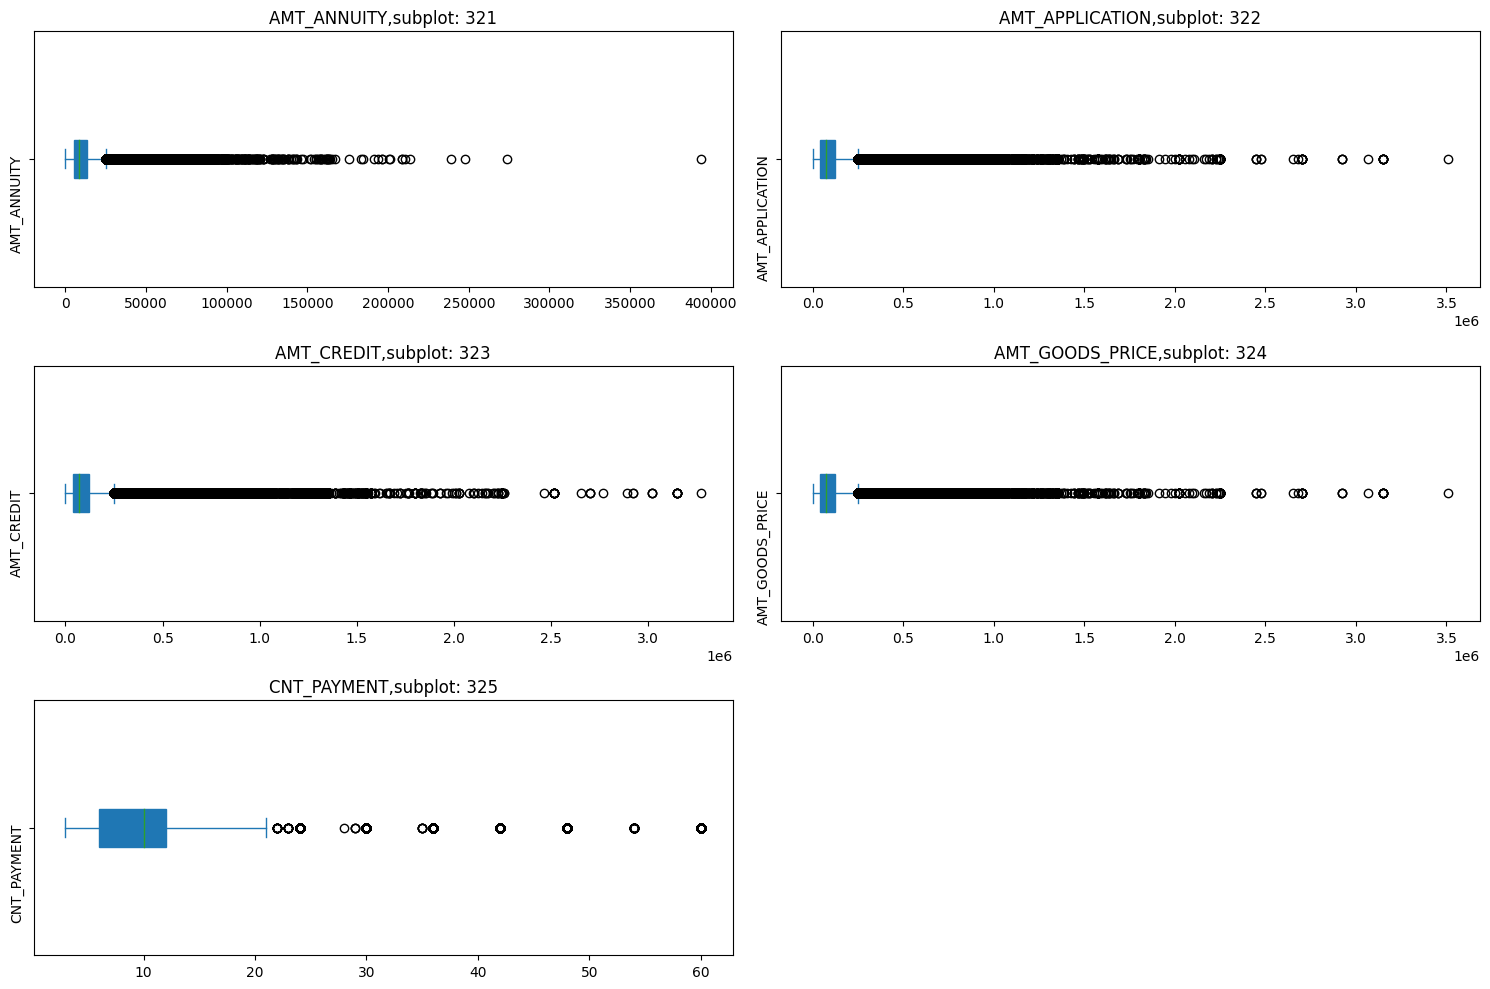

In [157]:
# checking via Boxplot

r=3
c=2
i=1

figure=plt.figure(figsize=(15,10))

for item in prev_app.columns:
  if prev_app[item].dtypes=='float64':
    plt.subplot(r,c,i)
    plt.title('{},subplot: {}{}{}'.format(item,r,c,i))
    prev_app[item].plot.box(vert=0,patch_artist=True)
    plt.yticks(rotation=90)
    i=i+1

figure.tight_layout()
plt.show()



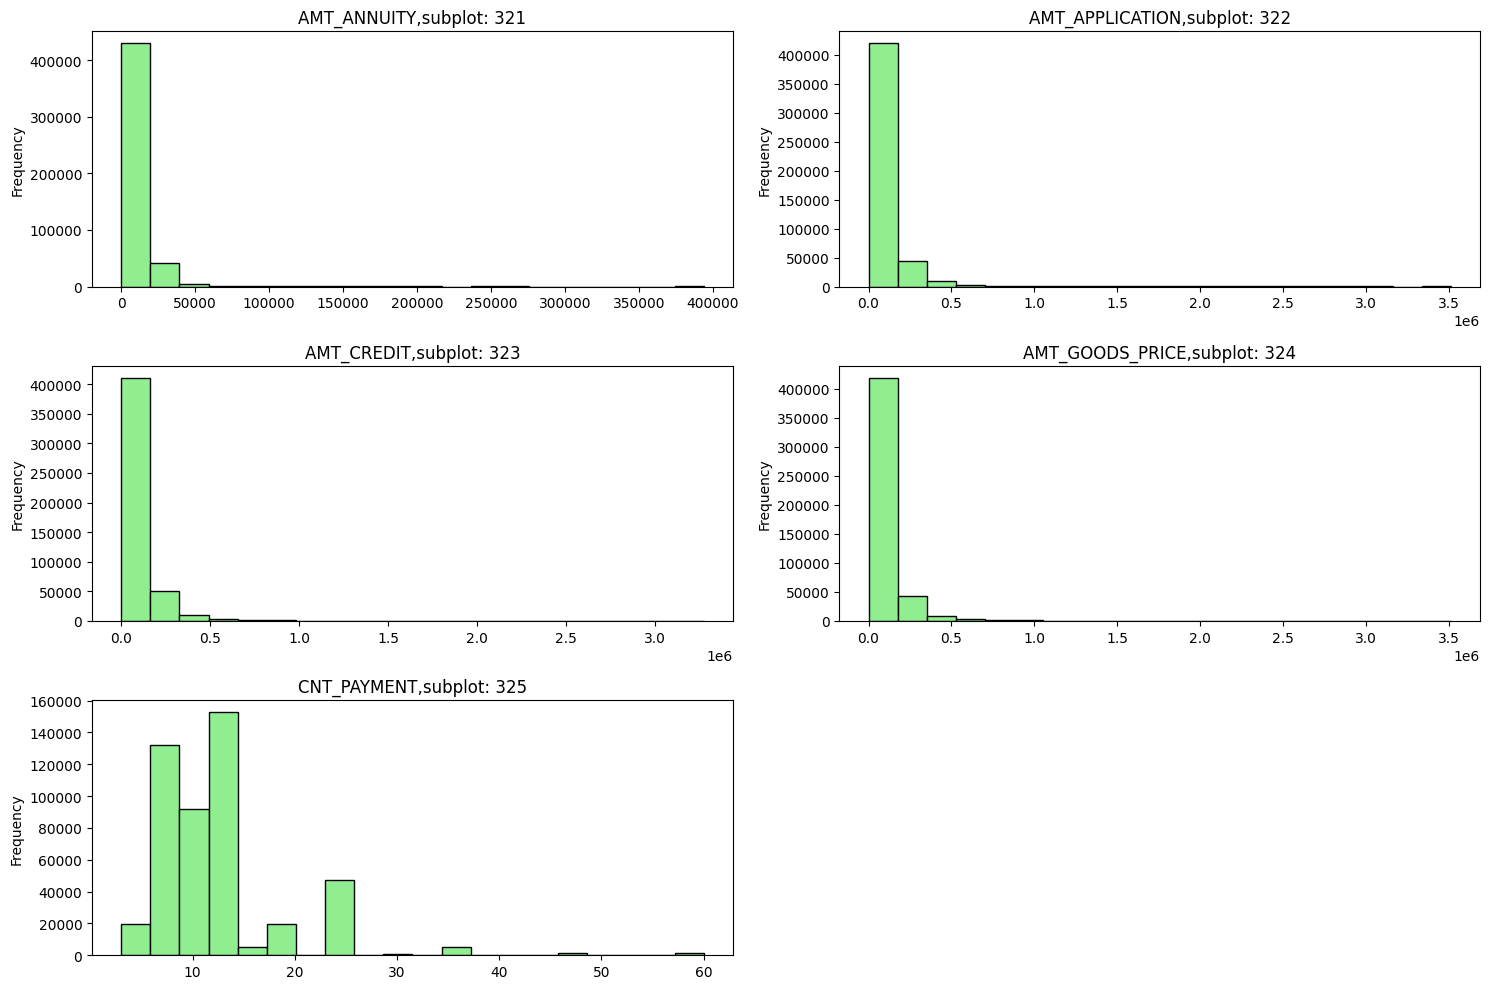

In [158]:
# Checking via distribution

r=3
c=2
i=1

figure=plt.figure(figsize=(15,10))

for item in prev_app.columns:
  if prev_app[item].dtypes=='float64':
    plt.subplot(r,c,i)
    plt.title('{},subplot: {}{}{}'.format(item,r,c,i))
    prev_app[item].plot.hist(color='lightgreen',ec='black',bins=20)
    # plt.yticks(rotation=90)
    i=i+1

figure.tight_layout()
plt.show()


- by seeing both boxplot distribution and histplot distribution, we conclude that all of these continuous variable have high amount of Outliers.

- Though these points seems as outlier, but actually their distance from 97 percentile will be the deciding factor.

In [159]:
# we use zscore here to determine outliers above 97%.

for i in prev_app.columns:
    if prev_app[i].dtypes=="float64" or prev_app[i].dtypes=="float32":
        print( i, ":", end= " ")
        print(prev_app.iloc[np.where(np.abs(stat.zscore(prev_app[i])>2))].shape, end=" ")
        print("Percentage of Outlier rows: ", round((prev_app.iloc[np.where
         (np.abs(stat.zscore(prev_app[i])>2))].shape[0]/prev_app.shape[0]*100), 2))

AMT_ANNUITY : (18677, 16) Percentage of Outlier rows:  3.92
AMT_APPLICATION : (15667, 16) Percentage of Outlier rows:  3.29
AMT_CREDIT : (15374, 16) Percentage of Outlier rows:  3.23
AMT_GOODS_PRICE : (15667, 16) Percentage of Outlier rows:  3.29
CNT_PAYMENT : (8744, 16) Percentage of Outlier rows:  1.83


- So either we can delete these outliers, or we can impute them using Median as , median is the least effected metrics due to outliers.

### Bivariate Analysis

In [160]:
# CAtegorical Vs Categorical Variable.

prev_app_cat=[i for i in prev_app.columns if prev_app[i].dtypes=='object']
prev_app_cat

['NAME_CONTRACT_TYPE',
 'NAME_CONTRACT_STATUS',
 'NAME_TYPE_SUITE',
 'NAME_CLIENT_TYPE',
 'NAME_PORTFOLIO',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

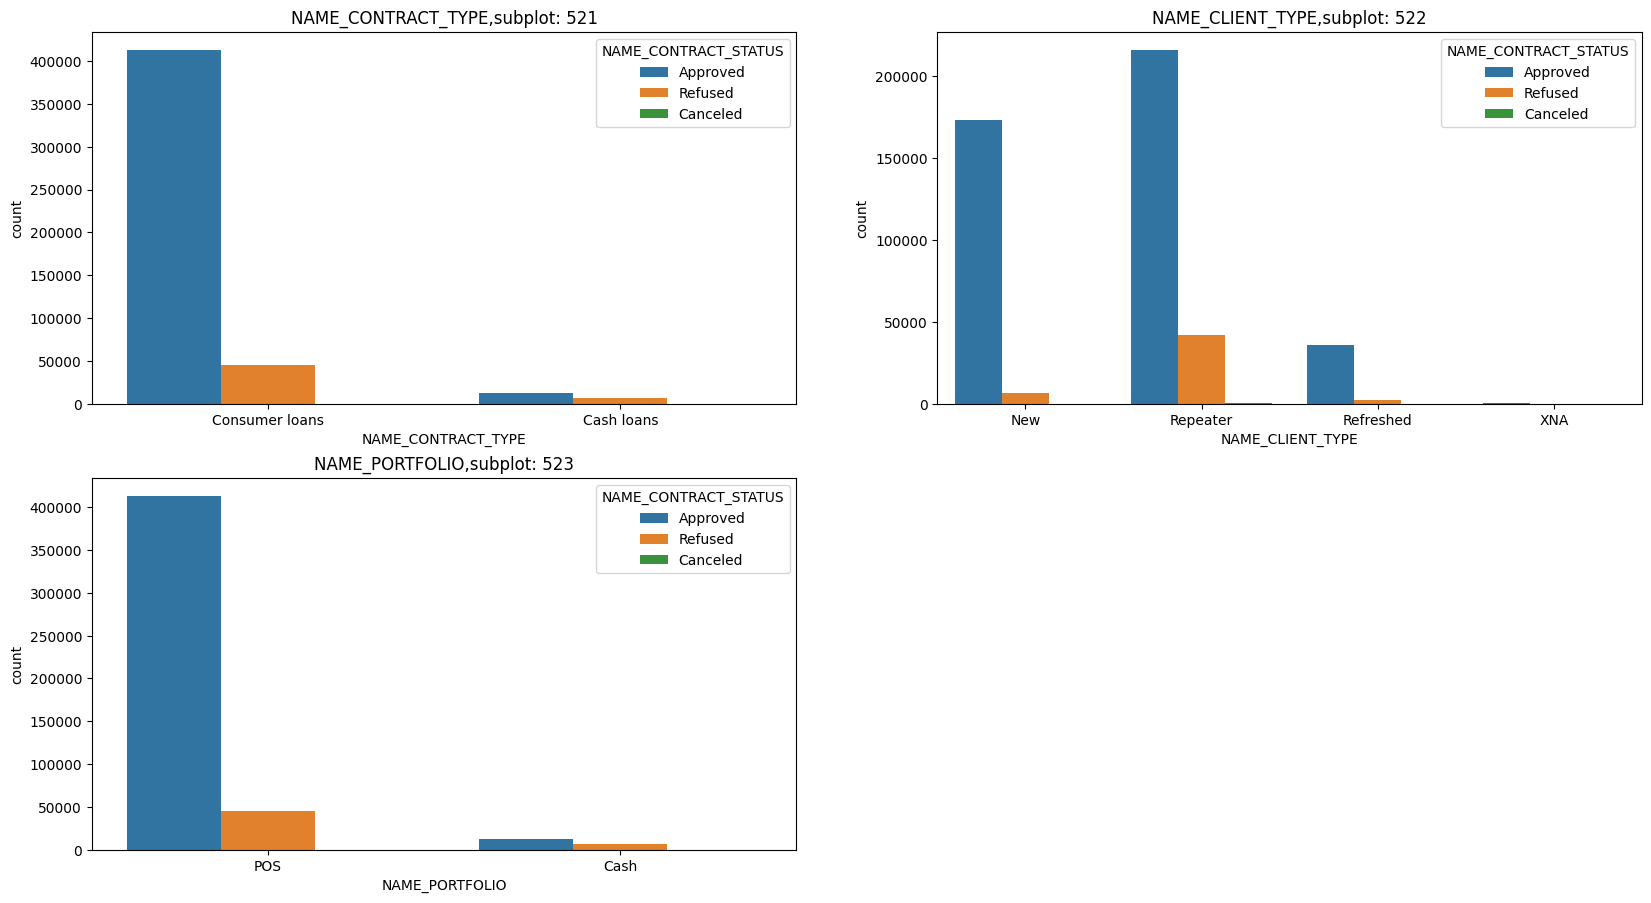

In [161]:
# performing bivariate analysis keeping 'NAME_CONTRACT_STATUS' in common , as this will let us know, which applications were approved, refused, cancelled. etc

# we will observe only over three columns 'NAME_CONTRACT_TYPE','NAME_CLIENT_TYPE','NAME_PORTFOLIO'
collist=['NAME_CONTRACT_TYPE','NAME_CLIENT_TYPE','NAME_PORTFOLIO']
r=5
c=2
i=1

figure=plt.figure(figsize=(20,28))
for item in collist:
   plt.subplot(r, c, i)
   plt.title('{},subplot: {}{}{}'.format(item,r,c,i))
   plt.xlabel(item)
   sns.countplot(x=item, data=prev_app, hue='NAME_CONTRACT_STATUS')
  #  plt.xticks(rotation=90)
   i = i + 1

# fig.tight_layout()
plt.show()


**Conclusion:**

1. Consumer loans are having highest rate of Approvals.

2. Refusal of loan is higher for CAsh loan than Consumer loans.

3. The company has higher number of repeating customers with aproved as well as refused loans.

4. Higher Approval rate in POS shows consumer loans only.


### Correlations

In [162]:
# Top 10 Correlations.


prev_app_corr=prev_app.drop(axis=1,columns=['SK_ID_CURR','SK_ID_PREV'] )

correlation=prev_app_corr.corr().abs()


corr_prev_app = correlation.where(np.triu(np.ones(correlation.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_prev_app.columns=['Column1','Column2','Correlation']
corr_prev_app.dropna(subset=['Correlation'],inplace=True)
corr_prev_app = corr_prev_app.sort_values(by=['Correlation'], ascending=False)

corr_prev_app


<ipython-input-162-91a85df201d9>:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  corr_prev_app = correlation.where(np.triu(np.ones(correlation.shape),k=1).astype(np.bool)).unstack().reset_index()


Column1          Column2  Correlation
16  AMT_GOODS_PRICE  AMT_APPLICATION     1.000000
11       AMT_CREDIT  AMT_APPLICATION     0.985391
17  AMT_GOODS_PRICE       AMT_CREDIT     0.985391
5   AMT_APPLICATION      AMT_ANNUITY     0.769622
15  AMT_GOODS_PRICE      AMT_ANNUITY     0.769622
10       AMT_CREDIT      AMT_ANNUITY     0.748133
22      CNT_PAYMENT       AMT_CREDIT     0.561189
21      CNT_PAYMENT  AMT_APPLICATION     0.514939
23      CNT_PAYMENT  AMT_GOODS_PRICE     0.514939
20      CNT_PAYMENT      AMT_ANNUITY     0.054910

<Figure size 1400x500 with 0 Axes>

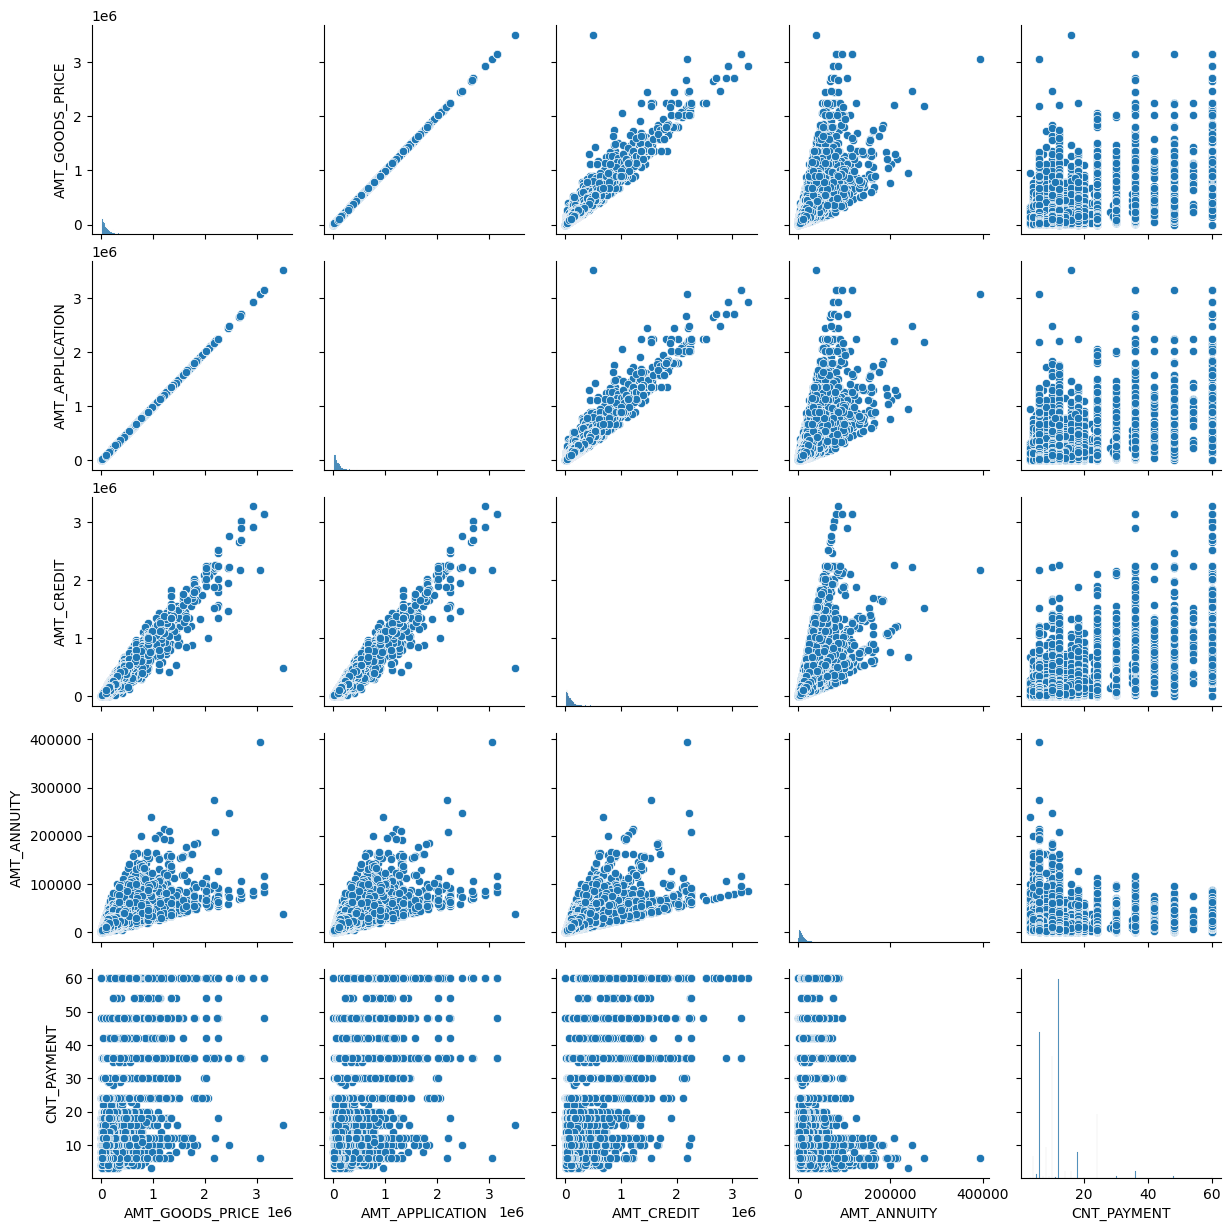

In [178]:
# pairplot analysis of columns appeared in corelation Dataframe That are .'AMT_GOODS_PRICE','AMT_APPLICATION','AMT_CREDIT','AMT_ANNUITY','CNT_PAYMENT'

plt.figure(figsize=[14,5])
sns.pairplot(prev_app[['AMT_GOODS_PRICE','AMT_APPLICATION','AMT_CREDIT','AMT_ANNUITY','CNT_PAYMENT']])
plt.show()



<Axes: >

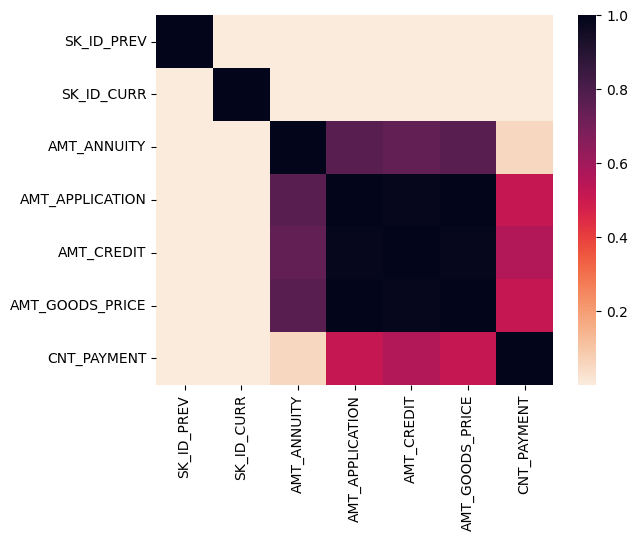

In [164]:
sns.heatmap(prev_app.corr(),cmap="rocket_r")

**Conclusion:**

1. It is observed that AMT_ANNUITY is equally correlated with AMT_GOODS_PRICE, AMT_APPLICATION,AMT_CREDIT.
2. CNT_PAYMENT does'nt show any significant correlation.
3. AMT_CREDIT is highly correlated with AMT_GOODS_PRICE, AMT_APPLICATION, and this is obvious,if goods price are higher than loan application and amount credit will automatically rise. we have already seen that most of the credit was taken to purchase something, ie. under consumer loan category.



### Multivariate Analysis

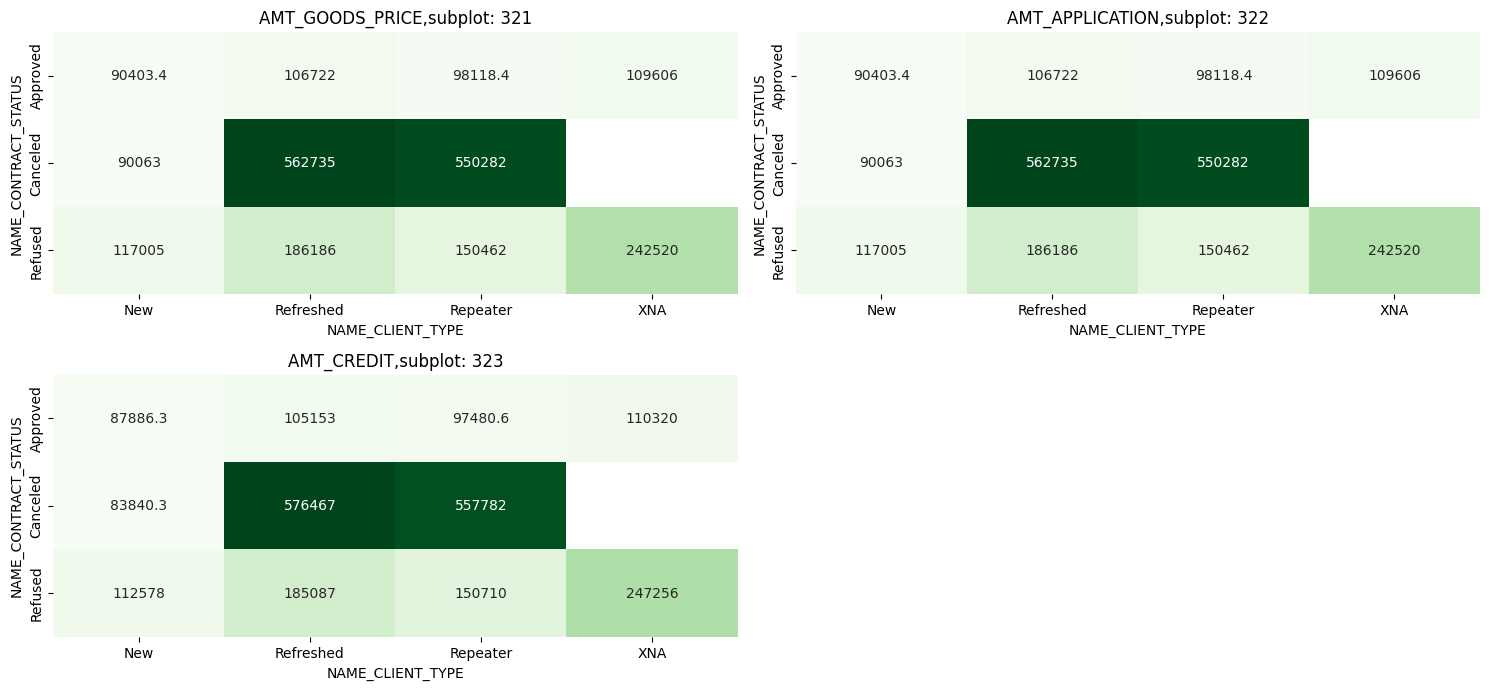

In [165]:
# NOW WE WILL Check status of Application ['Approved','Refused','Cancelled']  and client type 'NEW' or 'REPEATER'wrt all The highly Correlated columns
# That are ['AMT_GOODS_PRICE', 'AMT_APPLICATION','AMT_CREDIT']

high_corr_list=['AMT_GOODS_PRICE', 'AMT_APPLICATION','AMT_CREDIT']
figure=plt.figure(figsize=(15,10))
ind='NAME_CONTRACT_STATUS'
col='NAME_CLIENT_TYPE'
c=1
for i in high_corr_list:
  plt.subplot(3,2,c)
  plt.title('{},subplot: {}{}{}'.format(i,3,2,c))
  plt.xlabel(i)
  result1=pd.pivot_table(data=prev_app,index=ind,columns=col,values=i)
  sns.heatmap(result1,annot=True, cmap='Greens', fmt='g',cbar=False)
  c=c+1

plt.tight_layout()
plt.show()

**Conclusion:**

Ratio of Cancelled Applications is quit High.

## MERGING BOTH APPLICATION AND PREV_APPLICATION DATSET FOR ANALYSIS.

In [166]:
# Checking for Duplicate values of Current Application Ids 'SK_ID_CURR'

duplicate_val=prev_app[prev_app.duplicated(subset='SK_ID_CURR')]
duplicate_val.shape

(231030, 16)

- Yes There are many point in column 'SK_ID_PREV' reffering to same point in 'SK_ID_CURR' . MANY to ONE Realtion berween the two.

In [167]:
# merging 'new_app' and 'prev_app' Dataframe

df=pd.merge(new_app,prev_app, how='left', on="SK_ID_CURR")
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER  CNT_CHILDREN  \
0      100002       1           Cash loans           M             0   
1      100003       0           Cash loans           F             0   
2      100003       0           Cash loans           F             0   
3      100004       0      Revolving loans           M             0   
4      100006       0           Cash loans           F             0   

   AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  \
0          202500.0      406597.5        24700.5           351000.0   
1          270000.0     1293502.5        35698.5          1129500.0   
2          270000.0     1293502.5        35698.5          1129500.0   
3           67500.0      135000.0         6750.0           135000.0   
4          135000.0      312682.5        29686.5           297000.0   

  NAME_TYPE_SUITE_x NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0     Unaccompanied          Working  Secondary / secondary special   
1            Family    State servant               Higher education   
2            Family    State servant               Higher education   
3     Unaccompanied          Working  Secondary / secondary special   
4     Unaccompanied          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2               Married  House / apartment                    0.003541   
3  Single / not married  House / apartment                    0.010032   
4        Civil marriage  House / apartment                    0.008019   

   AGE_IN_YEARS  YEARS_OF_EMPLOYMENT  YEARS_OF_REGISTRATION  \
0          26.0                  2.0                   10.0   
1          46.0                  4.0                    4.0   
2          46.0                  4.0                    4.0   
3          53.0                  1.0                   12.0   
4          53.0                  9.0                   27.0   

   AGE_OF_ID_IN_YEARS OCCUPATION_TYPE WEEKDAY_APPR_PROCESS_START  \
0                 6.0        Laborers                  WEDNESDAY   
1                 1.0      Core staff                     MONDAY   
2                 1.0      Core staff                     MONDAY   
3                 7.0        Laborers                     MONDAY   
4                 7.0        Laborers                  WEDNESDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                       11                           0   
3                        9                           0   
4                       17                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       0                        0   

        ORGANIZATION_TYPE  EXT_SOURCE_2  OBS_30_CNT_SOCIAL_CIRCLE  \
0  Business Entity Type 3      0.262949                       2.0   
1                  School      0.622246                       1.0   
2                  School      0.622246                       1.0   
3              G

In [168]:
df.shape

(505565, 59)

In [169]:
# Checking for Application status i.e 'Approved','Refused','Cancelled' , for DEFAULTERS AND NON_DEFAULTERS

contract=df.NAME_CONTRACT_STATUS.dropna().unique()
contract

array(['Approved', 'Refused', 'Canceled'], dtype=object)

Target 0 and 1 for :  Approved
0    0.928515
1    0.071485
Name: TARGET, dtype: float64


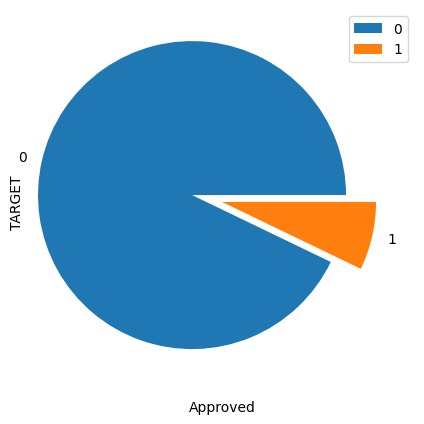

Target 0 and 1 for :  Refused
0    0.898435
1    0.101565
Name: TARGET, dtype: float64


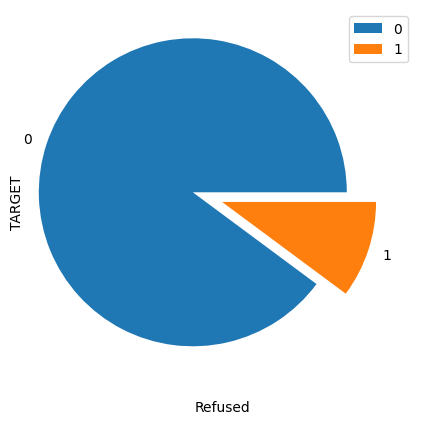

Target 0 and 1 for :  Canceled
0    0.909483
1    0.090517
Name: TARGET, dtype: float64


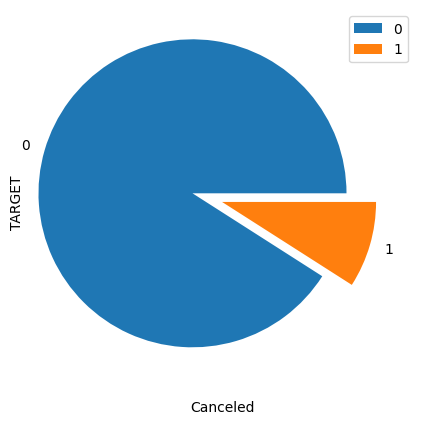

In [170]:
for i in contract:
    print("Target 0 and 1 for : ",i)
    plt.figure(figsize=[8,5])
    print(df[(df['NAME_CONTRACT_STATUS']==i)].TARGET.value_counts(normalize=True))
    plt.xlabel(i)
    df[(df['NAME_CONTRACT_STATUS']==i)].TARGET.value_counts().plot.pie(normalize=True,explode=[0.2,0])
    plt.legend()
    plt.show()

In [171]:
for i in contract:
    print("Target 0 and 1 for : ",i)
    print(df[(df['NAME_CONTRACT_STATUS']==i)].TARGET.value_counts())

Target 0 and 1 for :  Approved
0    338854
1     26088
Name: TARGET, dtype: int64
Target 0 and 1 for :  Refused
0    39090
1     4419
Name: TARGET, dtype: int64
Target 0 and 1 for :  Canceled
0    211
1     21
Name: TARGET, dtype: int64


**Conclusion:**

- Approximately 7 % (26088 applicaions) of Approved Applications are of Defaulters.
- Approximately 9% Cancelled ,10% Refused, also have Defaulter applications.

This implies that Company have privously refused those applications, or loan was cancelled by applicant, which are now Contributing in Default Cases.




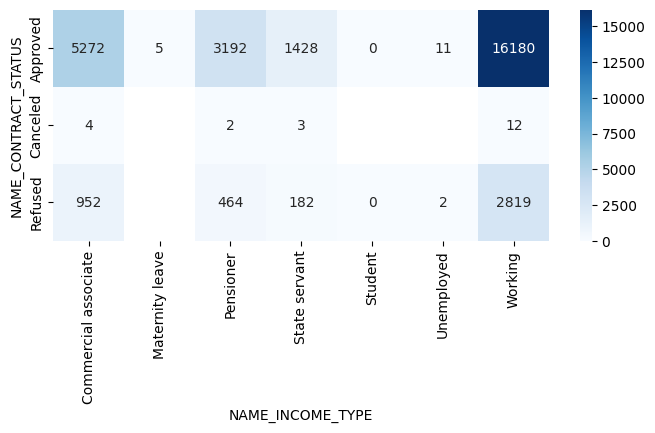

In [172]:
# "NAME_CONTRACT_STATUS" Vs "NAME_INCOME_TYPE",aggregating on Target

res=pd.pivot_table(data=df,index="NAME_CONTRACT_STATUS",columns="NAME_INCOME_TYPE",values='TARGET', aggfunc="sum")
plt.figure(figsize=(8,3))
sns.heatmap(res, annot=True,cmap='Blues', fmt="g")
plt.show()

- Working Class have High rate of Application Approval and Defaulter.
- 2819 applications were refused of working class previously and now Defaulters are 16180

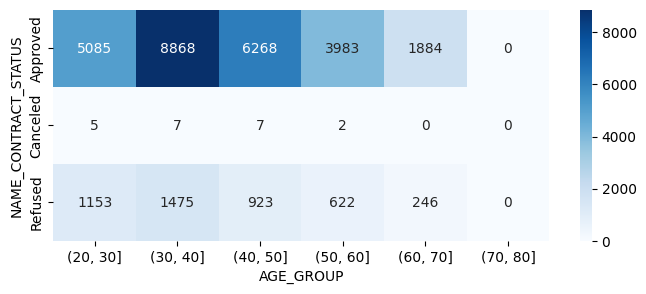

In [173]:
# "NAME_CONTRACT_STATUS" Vs AGE_GROUP",aggregating on Target


res=pd.pivot_table(data=df,index="NAME_CONTRACT_STATUS",columns="AGE_GROUP",values='TARGET', aggfunc="sum")
plt.figure(figsize=(8,3))
sns.heatmap(res, annot=True,cmap='Blues', fmt="g")
plt.show()

- Age 30-40 has higher rate of Approval and Defaulter, but other age groups also have significant amount of defaulters.

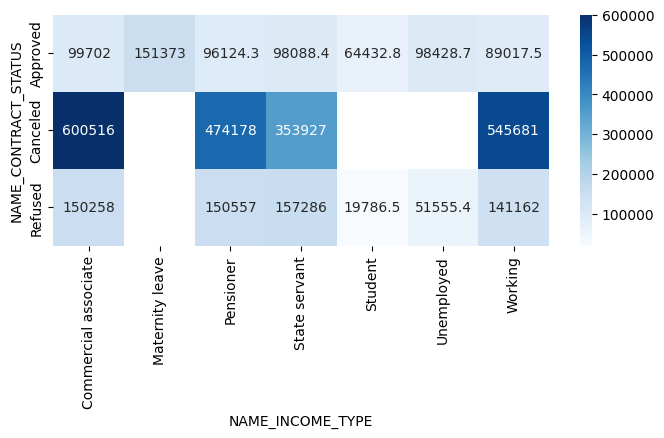

In [174]:
#C "NAME_CONTRACT_STATUS" Vs "NAME_INCOME_TYPE",aggregating on AMT_CREDIT

res=pd.pivot_table(data=df,index="NAME_CONTRACT_STATUS",columns="NAME_INCOME_TYPE",values='AMT_CREDIT_y')
plt.figure(figsize=(8,3))
sns.heatmap(res, annot=True,cmap='Blues', fmt="g")
plt.show()

- Highest Loan cancellation are for 'Commercial Associates' and 'working' peoples.
- pensioners and state servants are having significant amount of defaulters.
- Highest approval are for 'Maternity Leave' and 'Unemployed' applicants.

In [175]:
# Checking How many Approved Applications turned into Default Applications.

cols=['INCOME_GROUP','AGE_GROUP','CODE_GENDER','NAME_INCOME_TYPE','OCCUPATION_TYPE',"ORGANIZATION_TYPE",'OWN_CAR','OWN_REALTY' ]

for i in cols:
    print(df[(df['NAME_CONTRACT_STATUS']=="Approved") & (df['TARGET']==1)][i].value_counts(normalize=True))
    print('\n')



Medium      0.288792
High        0.256018
Low         0.220408
VeryHigh    0.132091
VeryLow     0.102691
Name: INCOME_GROUP, dtype: float64


(30, 40]    0.339926
(40, 50]    0.240264
(20, 30]    0.194917
(50, 60]    0.152676
(60, 70]    0.072217
(70, 80]    0.000000
Name: AGE_GROUP, dtype: float64


F    0.575859
M    0.424141
Name: CODE_GENDER, dtype: float64


Working                 0.620209
Commercial associate    0.202085
Pensioner               0.122355
State servant           0.054738
Unemployed              0.000422
Maternity leave         0.000192
Name: NAME_INCOME_TYPE, dtype: float64


Laborers                 0.322506
Sales staff              0.166375
Drivers                  0.113714
Core staff               0.088850
Managers                 0.069958
High skill tech staff    0.037012
Security staff           0.036549
Cooking staff            0.035005
Medicine staff           0.032637
Accountants              0.025893
Cleaning staff           0.022444
Low-skill Laborers   

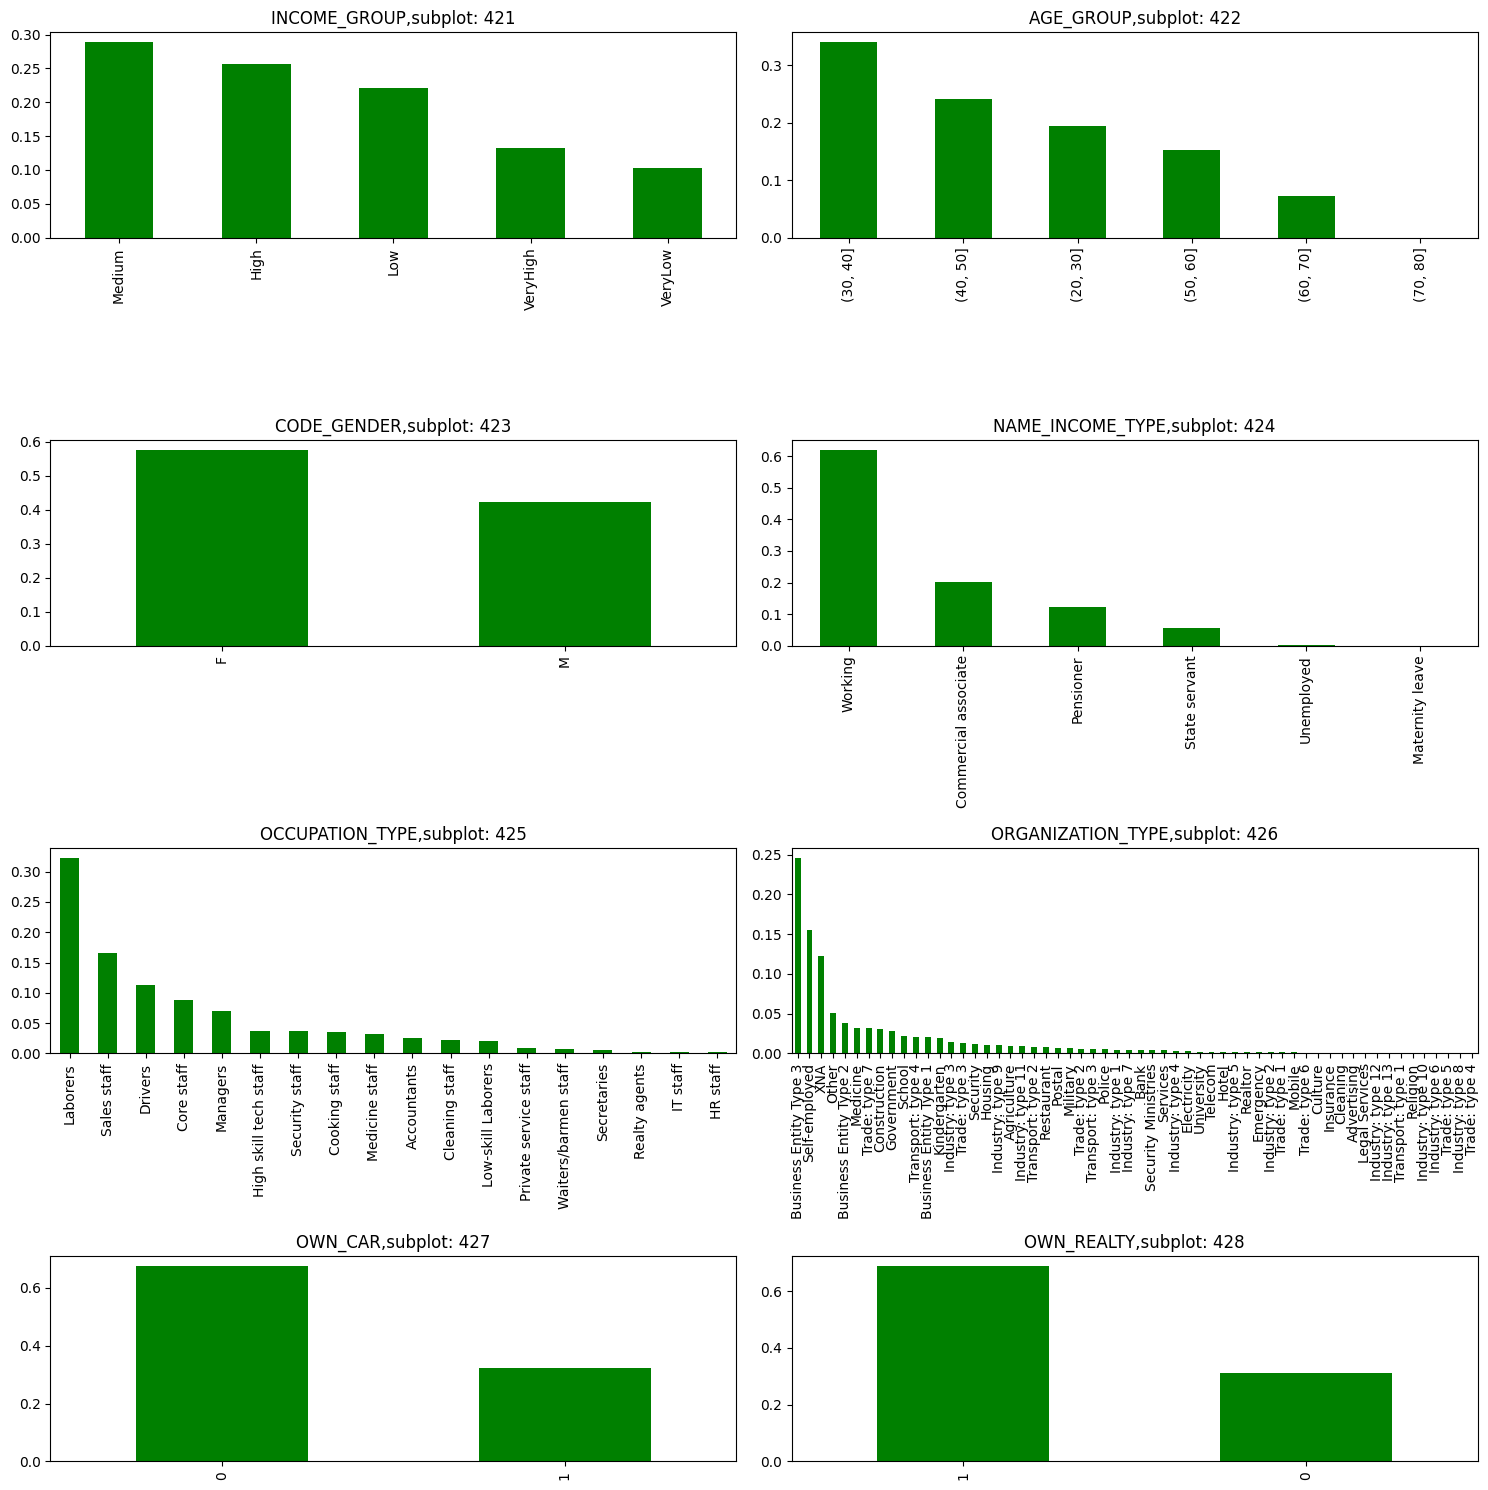

In [176]:
figure=plt.figure(figsize=(15,15))

c=1
for i in cols:
  plt.subplot(4,2,c)
  plt.title('{},subplot: {}{}{}'.format(i,4,2,c))
  a=df[(df['NAME_CONTRACT_STATUS']=="Approved") & (df['TARGET']==1)][i].value_counts(normalize=True)
  a.plot.bar(color='Green')
  c+=1

plt.tight_layout()
plt.show()

## Summary

####Cases of Defaulting Loan Applications.

The Variables listed below show Default cases on Approved Applications.

  **Default High**<br>
        'INCOME_GROUP' - Medium income<br>
        'AGE_GROUP - 30-40, followed by 40-50<br>
        'NAME_INCOME_TYPE' - Working <br>
        'OCCUPATION_TYPE' - Labourers 32%<br>
        'ORGANIZATION_TYPE' - Business type 3<br>
        'OWN_CAR' - >30% dont have car<br>
        'OWN_REALTY' - 70%(approx) dont have own home